In [1]:
from pathlib import Path
checkpoint = Path('/').joinpath('workspace/outputs/2020-07-20/11-11-36')
checkpoint

PosixPath('/workspace/outputs/2020-07-20/11-11-36')

In [12]:
import numpy as np
import torch
import pytorch_lightning as pl
import torchvision
from torchvision.transforms.functional import to_pil_image
from torchvision.utils import make_grid
import hydra
import yaml
import matplotlib.pyplot as plt

In [3]:
from src.model import Encoder, Decoder
from src.integrated_model import IntegratedModel
from src.patch import make_patch2d

In [4]:
with open(checkpoint.joinpath('.hydra', 'config.yaml')) as file:
    config = hydra.utils.DictConfig(yaml.safe_load(file))
print(config)

{'callback': {'callbacks': None, 'checkpoint': {'class': 'pytorch_lightning.callbacks.ModelCheckpoint', 'params': {'filepath': None, 'mode': 'auto', 'monitor': 'val_loss', 'save_top_k': 1, 'verbose': False}}, 'early_stopping': {'class': 'pytorch_lightning.callbacks.EarlyStopping', 'params': {'min_delta': 0, 'mode': 'auto', 'monitor': 'val_loss', 'patience': '${hparams.early_stopping}', 'verbose': False}}}, 'dataset': {'class': 'src.dataset.adobe_font_char_images', 'params': {'root': '/dataset/'}}, 'dataset_output_n': 52, 'experiment_name': 'Adobe_hparam_search', 'hparams': {'batch_size': 1024, 'dataset_n': 0, 'dataset_n_splits': 5, 'early_stopping': 50, 'latent_dim': 64, 'lr': 0.001, 'max_epochs': 100000, 'min_epochs': 1, 'n_pow': 1, 'num_workers': 6, 'patch_size': 15, 'seed': 0, 'test_patch_n': [1, 2, 4, 8, 16, 32, 64, 128, 256, 512], 'train_patch_n': [1, 2, 4, 8, 16, 32, 64, 128, 256]}, 'loggers': [{'class': 'pytorch_lightning.loggers.TensorBoardLogger', 'params': {'name': '', 'save_

In [5]:
encoder = Encoder(**config.model_params.encoder)
decoder = Decoder(**config.model_params.decoder)

In [6]:
import glob

model_checkpoint = glob.glob(str(checkpoint / '**' / '*.ckpt'), recursive=True)
assert len(model_checkpoint) == 1
model_checkpoint = model_checkpoint[0]

In [7]:
transform = torchvision.transforms.Compose([hydra.utils.instantiate(i) for i in config.transform]) if config.transform else None
# target_transform = torchvision.transforms.Compose([hydra.utils.instantiate(i) for i in config.target_transform]) if config.target_transform else None
target_transform = None

____, dataset = hydra.utils.instantiate(config.dataset)
dataset.set_transform(transform, target_transform)

100%|██████████| 9828/9828 [00:00<00:00, 10995.62it/s]


In [8]:
model = IntegratedModel.load_from_checkpoint(model_checkpoint, encoder=encoder, decoder=decoder, optim=None, dataset=dataset)
model

IntegratedModel(
  (encoder): Encoder(
    (linear_0): Linear(in_features=225, out_features=256, bias=True)
    (linear_1): Linear(in_features=256, out_features=256, bias=True)
    (linear_2): Linear(in_features=256, out_features=64, bias=True)
  )
  (decoder): Decoder(
    (linear_0): Linear(in_features=64, out_features=256, bias=True)
    (linear_1): Linear(in_features=256, out_features=256, bias=True)
    (linear_2): Linear(in_features=256, out_features=52, bias=True)
  )
)

In [9]:
patch_size = config.hparams.patch_size
n_pow = 0 - config.hparams.n_pow
print(n_pow)

patch = torch.zeros([1, 100, 1, patch_size, patch_size])
a = patch[:, :1]
a = encoder(a) / a.shape[1]**n_pow
print(a.mean().item(), a.var().item(), a.max().item(), a.min().item())
a = patch[:, :10]
a = encoder(a) / a.shape[1]**n_pow
print(a.mean().item(), a.var().item(), a.max().item(), a.min().item())
a = patch[:]
a = encoder(a) / a.shape[1]**n_pow
print(a.mean().item(), a.var().item(), a.max().item(), a.min().item())

print()

patch = torch.ones([1, 100, 1, patch_size, patch_size])
a = patch[:, :1]
a = encoder(a) / a.shape[1]**n_pow
print(a.mean().item(), a.var().item(), a.max().item(), a.min().item())
a = patch[:, :10]
a = encoder(a) / a.shape[1]**n_pow
print(a.mean().item(), a.var().item(), a.max().item(), a.min().item())
a = patch[:]
a = encoder(a) / a.shape[1]**n_pow
print(a.mean().item(), a.var().item(), a.max().item(), a.min().item())

print()

patch = torch.rand([1, 100, 1, patch_size, patch_size])
a = patch[:, :1]
a = encoder(a) / a.shape[1]**n_pow
print(a.mean().item(), a.var().item(), a.max().item(), a.min().item())
a = patch[:, :10]
a = encoder(a) / a.shape[1]**n_pow
print(a.mean().item(), a.var().item(), a.max().item(), a.min().item())
a = patch[:]
a = encoder(a) / a.shape[1]**n_pow
print(a.mean().item(), a.var().item(), a.max().item(), a.min().item())

print()

patch = torch.rand([1, 100, 1, patch_size, patch_size])
a = patch[:, :1]
a = encoder(a) / a.shape[1]**n_pow
print(a.mean().item(), a.var().item(), a.max().item(), a.min().item())
a = patch[:, :10]
a = encoder(a) / a.shape[1]**n_pow
print(a.mean().item(), a.var().item(), a.max().item(), a.min().item())
a = patch[:]
a = encoder(a) / a.shape[1]**n_pow
print(a.mean().item(), a.var().item(), a.max().item(), a.min().item())

print()

patch = torch.rand([1, 100, 1, patch_size, patch_size])
a = patch[:, :1]
a = encoder(a) / a.shape[1]**n_pow
print(a.mean().item(), a.var().item(), a.max().item(), a.min().item())
a = patch[:, :10]
a = encoder(a) / a.shape[1]**n_pow
print(a.mean().item(), a.var().item(), a.max().item(), a.min().item())
a = patch[:]
a = encoder(a) / a.shape[1]**n_pow
print(a.mean().item(), a.var().item(), a.max().item(), a.min().item())


-1
0.08108178526163101 0.1260385662317276 1.0921128988265991 -0.6208311915397644
0.8108178973197937 12.60385513305664 10.921126365661621 -6.208311080932617
8.108173370361328 1260.3848876953125 109.211181640625 -62.08308029174805

0.0857422947883606 0.24641795456409454 3.7720465660095215 -0.5087149143218994
0.8574228882789612 24.641796112060547 37.72046661376953 -5.087148666381836
8.574224472045898 2464.176025390625 377.204345703125 -50.87154006958008

-0.09361421316862106 0.26672258973121643 1.180785894393921 -3.0733766555786133
0.4232657551765442 15.091787338256836 18.018709182739258 -7.012045860290527
-0.22948312759399414 898.2507934570312 109.8246841430664 -45.04439926147461

-0.029139714315533638 0.17760518193244934 1.2444007396697998 -0.813138484954834
-0.11754557490348816 10.269176483154297 9.753792762756348 -6.824641227722168
-0.32328975200653076 815.040771484375 93.06333923339844 -49.959346771240234

-0.025435857474803925 0.07370523363351822 0.8894022107124329 -0.73814791440963

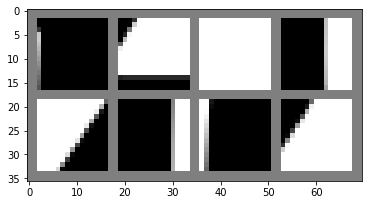

[[  0.056285   0.467607   2.340485  -1.407615   3.7481  ]
 [  0.34155   18.577892  24.115828  -7.731492  31.84732 ]
 [  0.085742   0.246418   3.772047  -0.508715   4.280761]
 [ -0.04208    3.396484   8.505017 -10.12342   18.628437]
 [ -0.446852   4.738886   9.745344 -10.13242   19.877764]
 [ -0.118274   4.541536   9.251912 -12.386756  21.638668]
 [  0.046425   2.547359   8.722808  -5.43751   14.160318]
 [ -0.111728   2.782661   9.260715  -5.45825   14.718966]]


In [18]:
index = (patch.mean([1, 2, 3, 4]) - 0.5).abs().argmin()
plt.imshow(to_pil_image(make_grid(patch[index], nrow=nrow, pad_value=0.5)))
plt.show()

tmp = np.get_printoptions()
np.set_printoptions(precision=6, suppress=True)

b = []
for p in patch[index]:
    a = encoder(p[None])
    b.append([a.mean().item(), a.var().item(), a.max().item(), a.min().item(), a.max().item() - a.min().item()])
print(np.array(b))

np.set_printoptions(**tmp)

189.0
0 AGaramondPro-BoldItalic capA


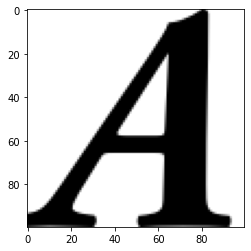


(true_class == predicted_class).item()=True
capA 0.9920523166656494
capA 0.9920523166656494


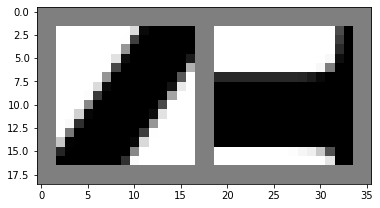


(true_class == predicted_class).item()=True
capA 0.9879738092422485
capA 0.9879738092422485


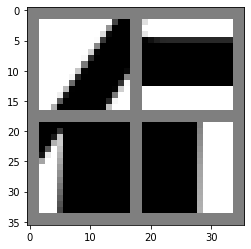


(true_class == predicted_class).item()=True
capA 0.9999289512634277
capA 0.9999289512634277


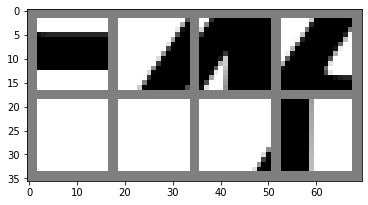


1 AGaramondPro-BoldItalic capB


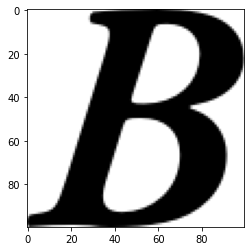


(true_class == predicted_class).item()=True
capB 0.889380156993866
capB 0.889380156993866


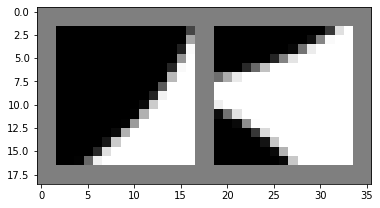


(true_class == predicted_class).item()=True
capB 0.9618937373161316
capB 0.9618937373161316


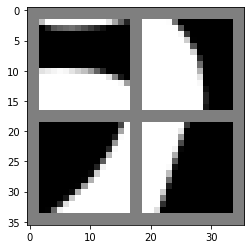


(true_class == predicted_class).item()=True
capB 0.9986873269081116
capB 0.9986873269081116


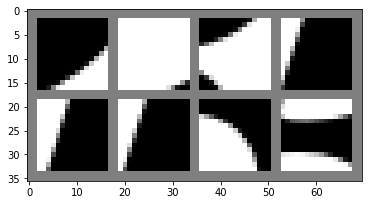


2 AGaramondPro-BoldItalic capC


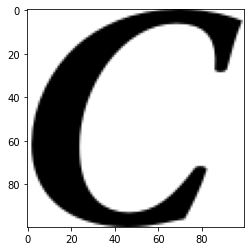


(true_class == predicted_class).item()=True
capC 0.7369164824485779
capC 0.7369164824485779


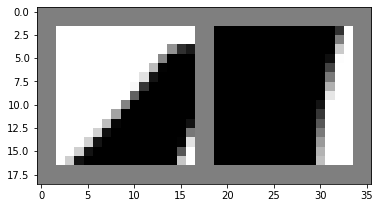


(true_class == predicted_class).item()=True
capC 0.7325583100318909
capC 0.7325583100318909


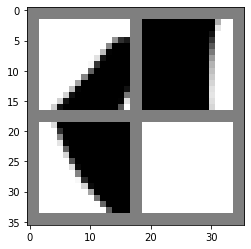


(true_class == predicted_class).item()=True
capC 0.9783875942230225
capC 0.9783875942230225


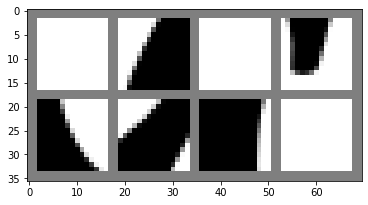


3 AGaramondPro-BoldItalic capD


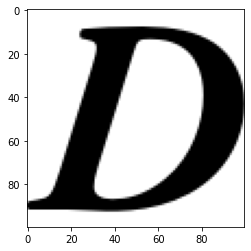


(true_class == predicted_class).item()=True
capD 0.8936566114425659
capD 0.8936566114425659


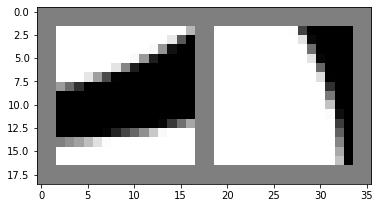


(true_class == predicted_class).item()=True
capD 0.9940094947814941
capD 0.9940094947814941


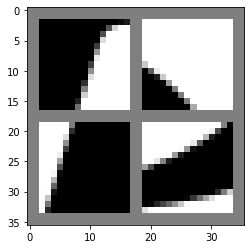


(true_class == predicted_class).item()=True
capD 0.9996009469032288
capD 0.9996009469032288


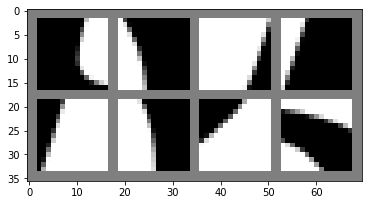


4 AGaramondPro-BoldItalic capE


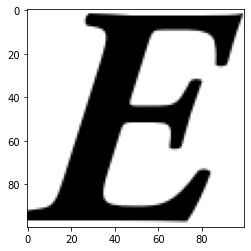


(true_class == predicted_class).item()=True
capE 0.587461531162262
capE 0.587461531162262


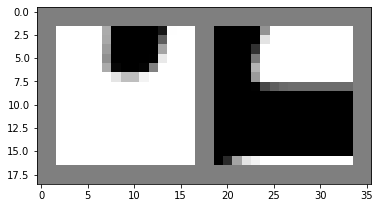


(true_class == predicted_class).item()=True
capE 0.943565309047699
capE 0.943565309047699


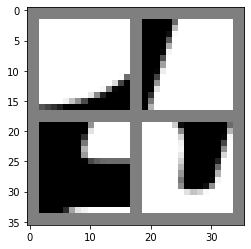


(true_class == predicted_class).item()=True
capE 0.9983441829681396
capE 0.9983441829681396


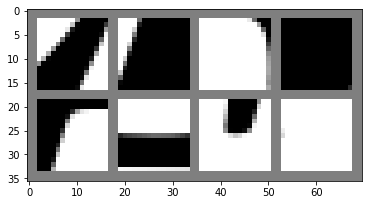


5 AGaramondPro-BoldItalic capF


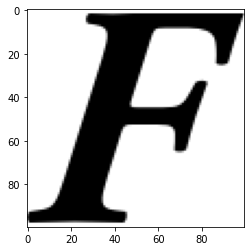


(true_class == predicted_class).item()=False
capF 0.4346606731414795
capE 0.5650864243507385


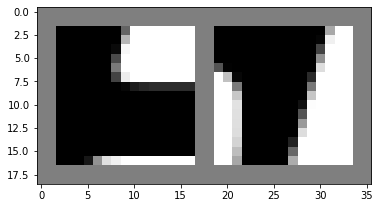


(true_class == predicted_class).item()=False
capF 0.4720287621021271
capE 0.5274450778961182


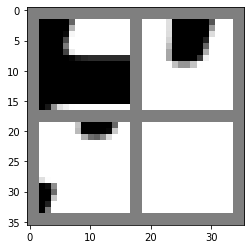


(true_class == predicted_class).item()=True
capF 0.9502976536750793
capF 0.9502976536750793


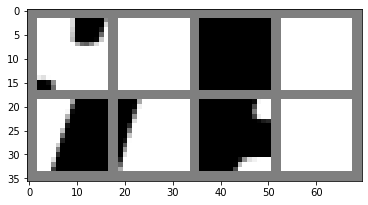


6 AGaramondPro-BoldItalic capG


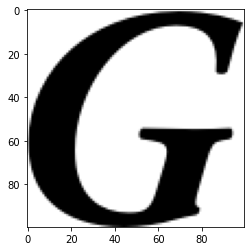


(true_class == predicted_class).item()=True
capG 0.989262044429779
capG 0.989262044429779


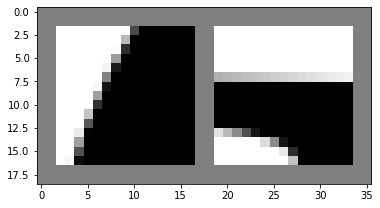


(true_class == predicted_class).item()=True
capG 0.9999450445175171
capG 0.9999450445175171


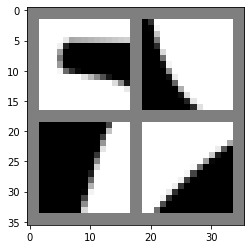


(true_class == predicted_class).item()=True
capG 0.9998120665550232
capG 0.9998120665550232


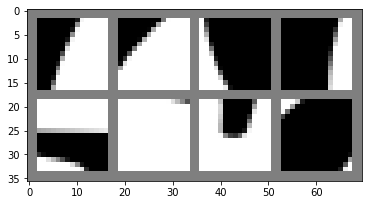


7 AGaramondPro-BoldItalic capH


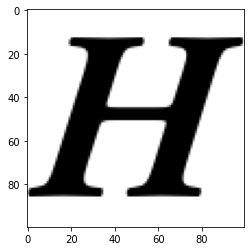


(true_class == predicted_class).item()=True
capH 0.5652977228164673
capH 0.5652977228164673


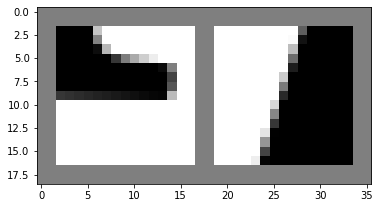


(true_class == predicted_class).item()=True
capH 0.9989370703697205
capH 0.9989370703697205


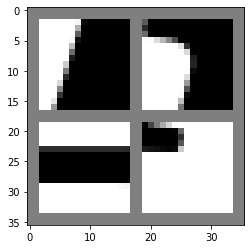


(true_class == predicted_class).item()=True
capH 0.9997746348381042
capH 0.9997746348381042


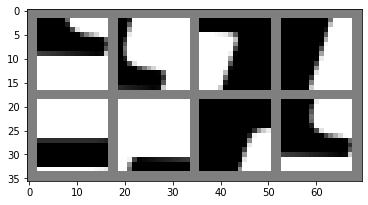


8 AGaramondPro-BoldItalic capI


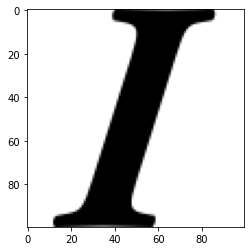


(true_class == predicted_class).item()=False
capI 0.25544044375419617
capU 0.302669882774353


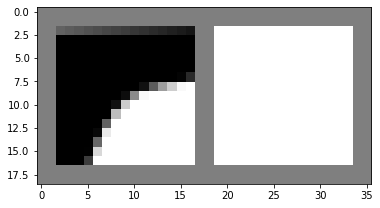


(true_class == predicted_class).item()=True
capI 0.6885565519332886
capI 0.6885565519332886


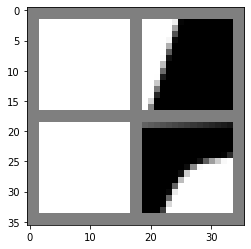


(true_class == predicted_class).item()=True
capI 0.8406946063041687
capI 0.8406946063041687


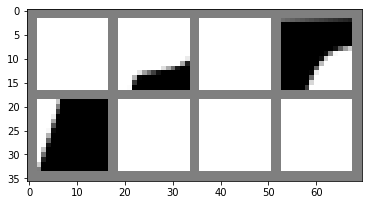


9 AGaramondPro-BoldItalic capJ


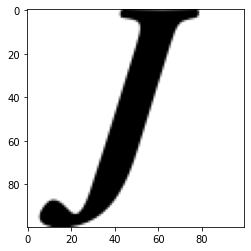


(true_class == predicted_class).item()=False
capJ 0.1798555850982666
smallJ 0.5311751961708069


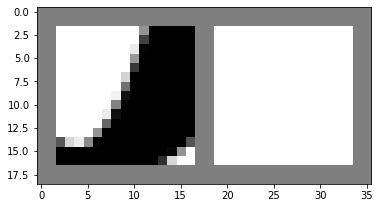


(true_class == predicted_class).item()=True
capJ 0.4119172692298889
capJ 0.4119172692298889


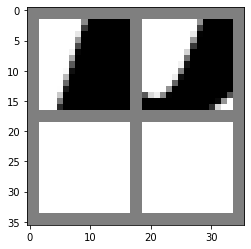


(true_class == predicted_class).item()=True
capJ 0.9182417988777161
capJ 0.9182417988777161


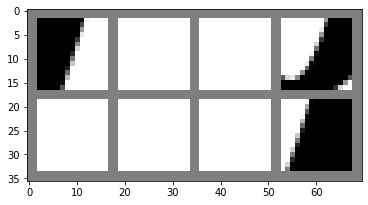


10 AGaramondPro-BoldItalic capK


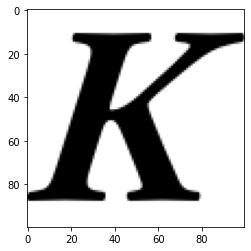


(true_class == predicted_class).item()=True
capK 0.9647389650344849
capK 0.9647389650344849


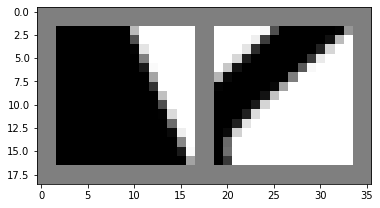


(true_class == predicted_class).item()=True
capK 0.9980960488319397
capK 0.9980960488319397


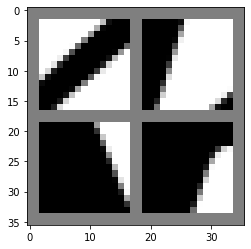


(true_class == predicted_class).item()=True
capK 0.9995583891868591
capK 0.9995583891868591


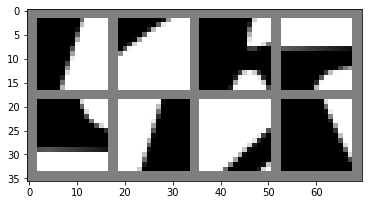


11 AGaramondPro-BoldItalic capL


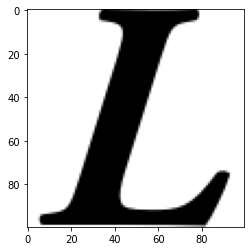


(true_class == predicted_class).item()=True
capL 0.6957351565361023
capL 0.6957351565361023


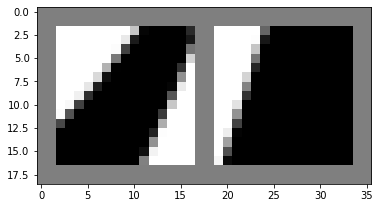


(true_class == predicted_class).item()=True
capL 0.9846833348274231
capL 0.9846833348274231


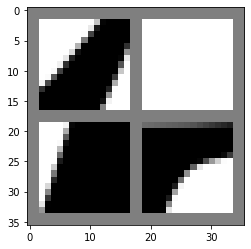


(true_class == predicted_class).item()=True
capL 0.9348166584968567
capL 0.9348166584968567


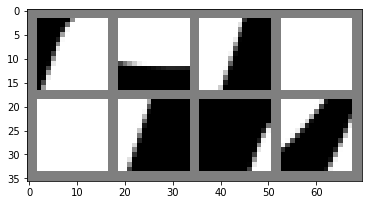


12 AGaramondPro-BoldItalic capM


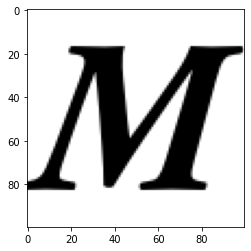


(true_class == predicted_class).item()=True
capM 0.9995326995849609
capM 0.9995326995849609


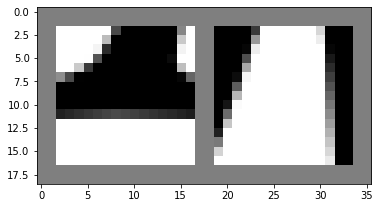


(true_class == predicted_class).item()=True
capM 0.9999520778656006
capM 0.9999520778656006


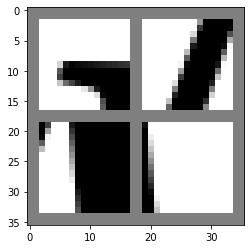


(true_class == predicted_class).item()=True
capM 0.9999866485595703
capM 0.9999866485595703


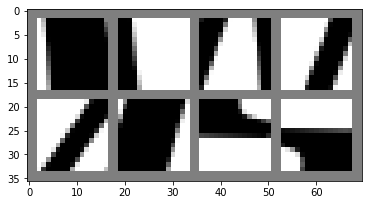


13 AGaramondPro-BoldItalic capN


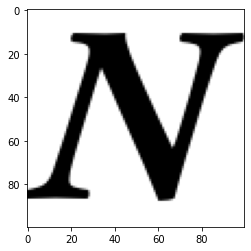


(true_class == predicted_class).item()=True
capN 0.8088147640228271
capN 0.8088147640228271


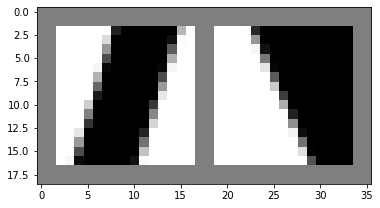


(true_class == predicted_class).item()=True
capN 0.9978267550468445
capN 0.9978267550468445


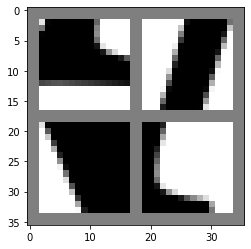


(true_class == predicted_class).item()=True
capN 0.9998152852058411
capN 0.9998152852058411


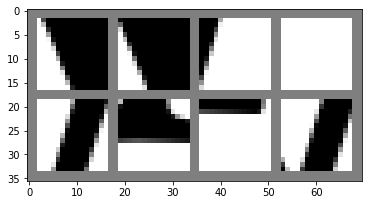


14 AGaramondPro-BoldItalic capO


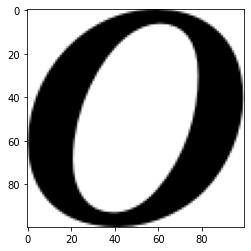


(true_class == predicted_class).item()=True
capO 0.46813905239105225
capO 0.46813905239105225


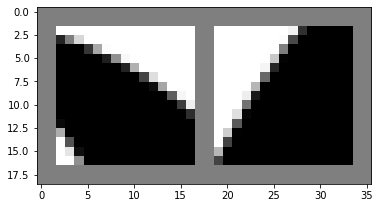


(true_class == predicted_class).item()=True
capO 0.642777681350708
capO 0.642777681350708


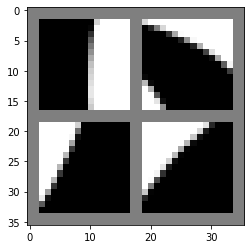


(true_class == predicted_class).item()=True
capO 0.6831493973731995
capO 0.6831493973731995


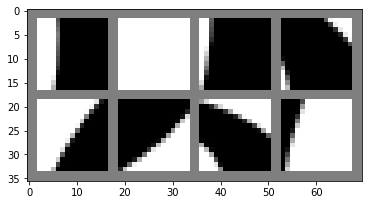


15 AGaramondPro-BoldItalic capP


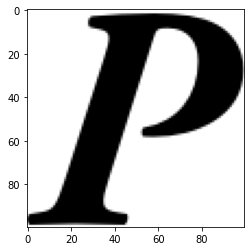


(true_class == predicted_class).item()=True
capP 0.9215720891952515
capP 0.9215720891952515


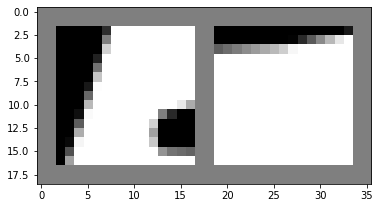


(true_class == predicted_class).item()=True
capP 0.904603123664856
capP 0.904603123664856


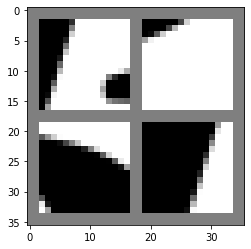


(true_class == predicted_class).item()=True
capP 0.985174834728241
capP 0.985174834728241


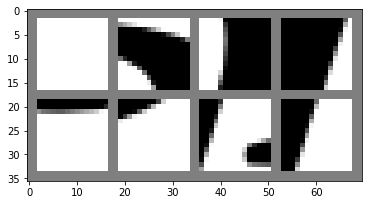


16 AGaramondPro-BoldItalic capQ


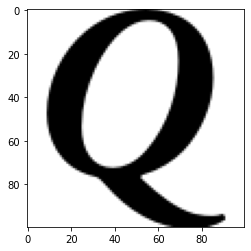


(true_class == predicted_class).item()=True
capQ 0.9828842878341675
capQ 0.9828842878341675


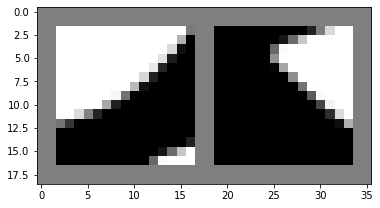


(true_class == predicted_class).item()=True
capQ 0.9961546063423157
capQ 0.9961546063423157


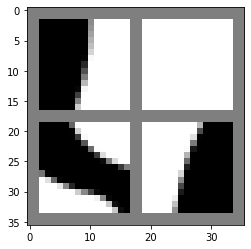


(true_class == predicted_class).item()=True
capQ 0.9978127479553223
capQ 0.9978127479553223


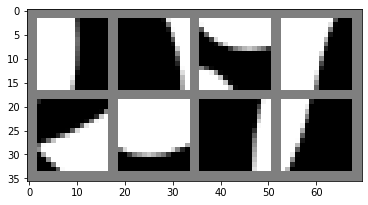


17 AGaramondPro-BoldItalic capR


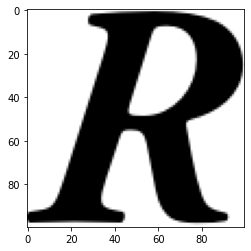


(true_class == predicted_class).item()=True
capR 0.9942493438720703
capR 0.9942493438720703


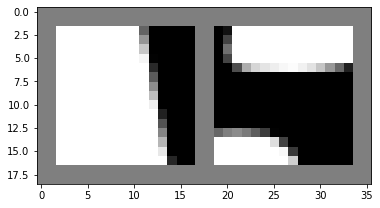


(true_class == predicted_class).item()=True
capR 0.9964916110038757
capR 0.9964916110038757


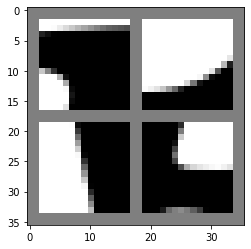


(true_class == predicted_class).item()=True
capR 0.997078537940979
capR 0.997078537940979


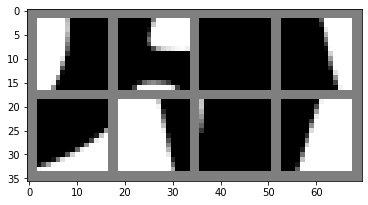


18 AGaramondPro-BoldItalic capS


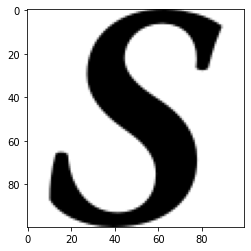


(true_class == predicted_class).item()=True
capS 0.7347308993339539
capS 0.7347308993339539


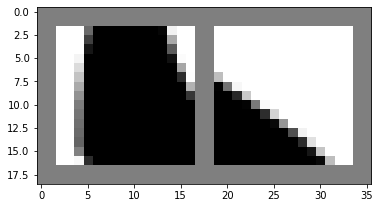


(true_class == predicted_class).item()=True
capS 0.5212594866752625
capS 0.5212594866752625


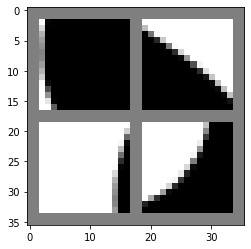


(true_class == predicted_class).item()=True
capS 0.718438982963562
capS 0.718438982963562


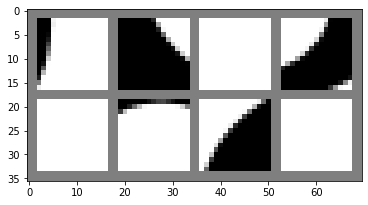


19 AGaramondPro-BoldItalic capT


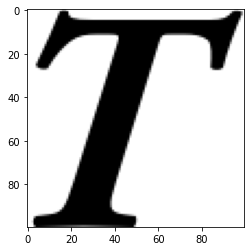


(true_class == predicted_class).item()=True
capT 0.7215297818183899
capT 0.7215297818183899


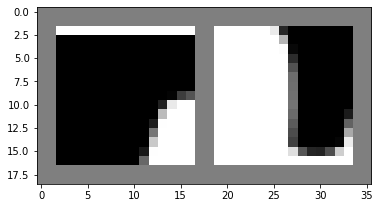


(true_class == predicted_class).item()=True
capT 0.9154030680656433
capT 0.9154030680656433


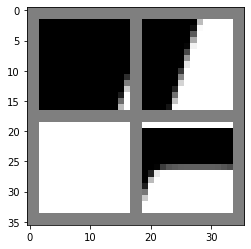


(true_class == predicted_class).item()=True
capT 0.999966025352478
capT 0.999966025352478


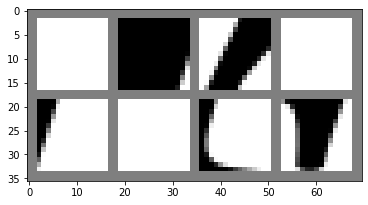


20 AGaramondPro-BoldItalic capU


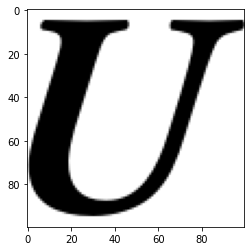


(true_class == predicted_class).item()=True
capU 0.9595699906349182
capU 0.9595699906349182


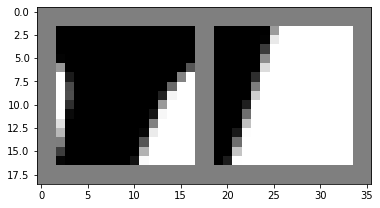


(true_class == predicted_class).item()=True
capU 0.9986209869384766
capU 0.9986209869384766


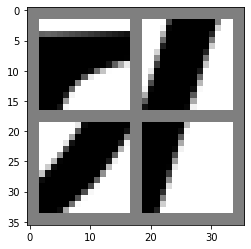


(true_class == predicted_class).item()=True
capU 0.9999709129333496
capU 0.9999709129333496


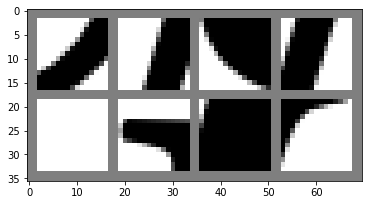


21 AGaramondPro-BoldItalic capV


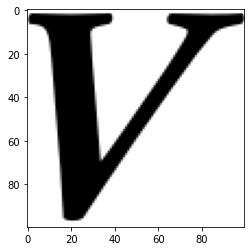


(true_class == predicted_class).item()=True
capV 0.821293830871582
capV 0.821293830871582


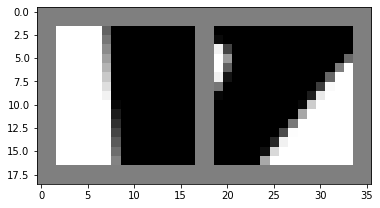


(true_class == predicted_class).item()=True
capV 0.9956747889518738
capV 0.9956747889518738


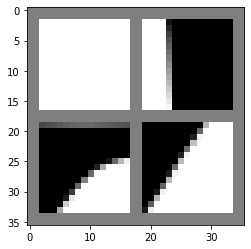


(true_class == predicted_class).item()=True
capV 0.9845727682113647
capV 0.9845727682113647


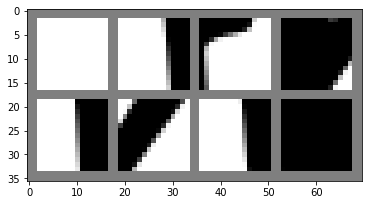


22 AGaramondPro-BoldItalic capW


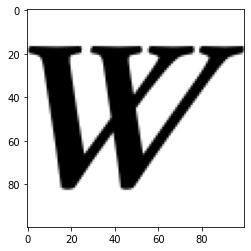


(true_class == predicted_class).item()=True
capW 0.8809419870376587
capW 0.8809419870376587


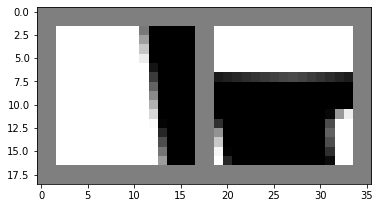


(true_class == predicted_class).item()=True
capW 0.9849663972854614
capW 0.9849663972854614


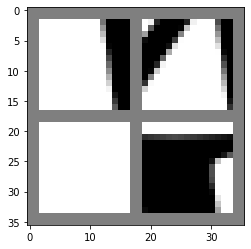


(true_class == predicted_class).item()=True
capW 0.9835661053657532
capW 0.9835661053657532


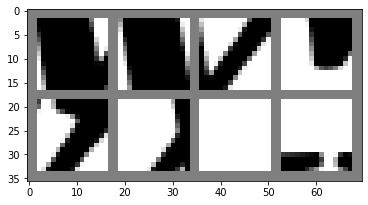


23 AGaramondPro-BoldItalic capX


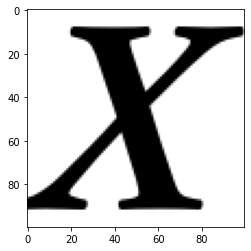


(true_class == predicted_class).item()=True
capX 0.8466526865959167
capX 0.8466526865959167


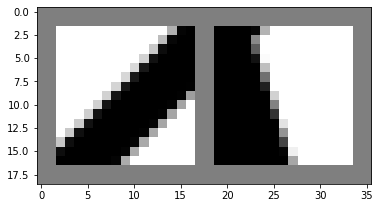


(true_class == predicted_class).item()=True
capX 0.9884858131408691
capX 0.9884858131408691


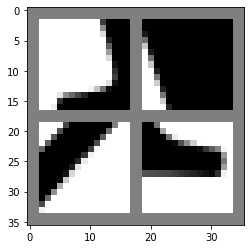


(true_class == predicted_class).item()=True
capX 0.9840297698974609
capX 0.9840297698974609


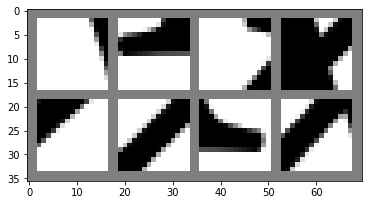


24 AGaramondPro-BoldItalic capY


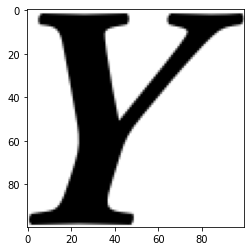


(true_class == predicted_class).item()=True
capY 0.7487976551055908
capY 0.7487976551055908


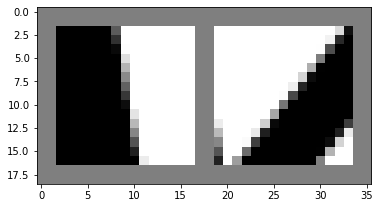


(true_class == predicted_class).item()=True
capY 0.9694768786430359
capY 0.9694768786430359


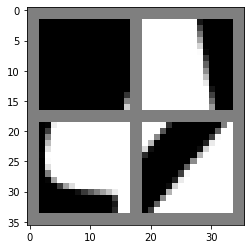


(true_class == predicted_class).item()=True
capY 0.998258650302887
capY 0.998258650302887


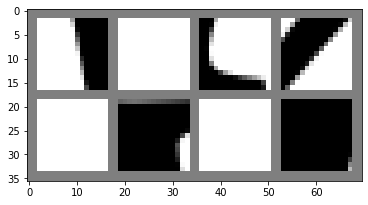


25 AGaramondPro-BoldItalic capZ


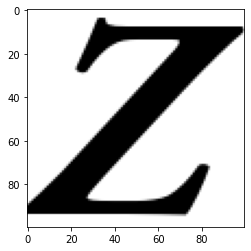


(true_class == predicted_class).item()=True
capZ 0.5792844891548157
capZ 0.5792844891548157


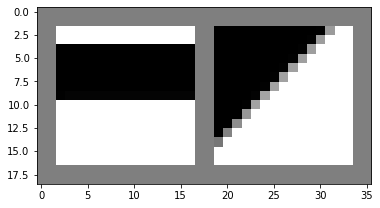


(true_class == predicted_class).item()=True
capZ 0.7935872077941895
capZ 0.7935872077941895


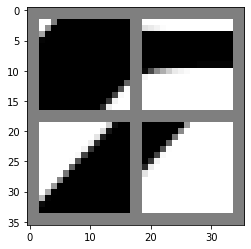


(true_class == predicted_class).item()=True
capZ 0.7754682898521423
capZ 0.7754682898521423


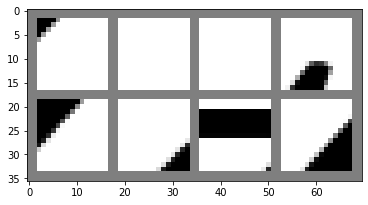


26 AGaramondPro-BoldItalic smallA


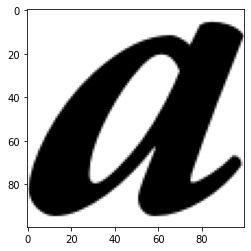


(true_class == predicted_class).item()=True
smallA 0.9690584540367126
smallA 0.9690584540367126


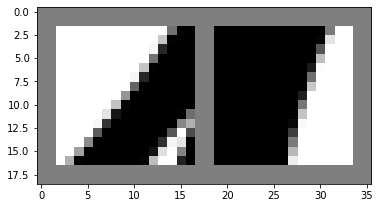


(true_class == predicted_class).item()=True
smallA 0.9744495153427124
smallA 0.9744495153427124


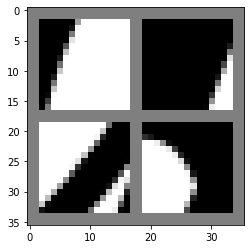


(true_class == predicted_class).item()=True
smallA 0.9993454813957214
smallA 0.9993454813957214


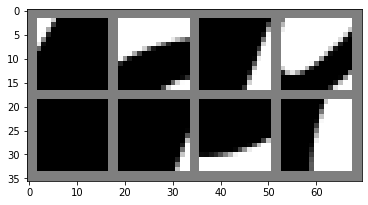


27 AGaramondPro-BoldItalic smallB


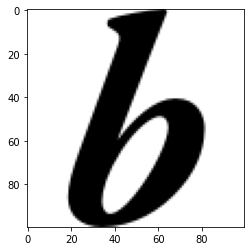


(true_class == predicted_class).item()=True
smallB 0.7561299800872803
smallB 0.7561299800872803


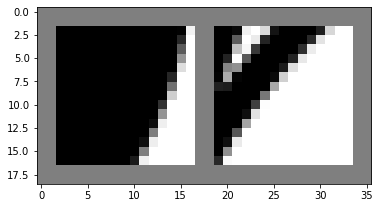


(true_class == predicted_class).item()=True
smallB 0.6340408325195312
smallB 0.6340408325195312


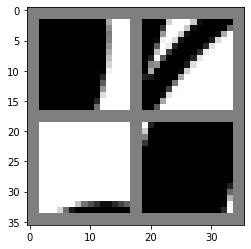


(true_class == predicted_class).item()=True
smallB 0.9361743330955505
smallB 0.9361743330955505


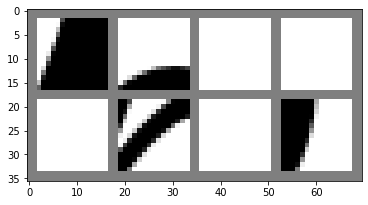


28 AGaramondPro-BoldItalic smallC


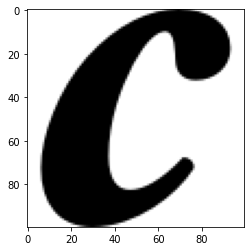


(true_class == predicted_class).item()=True
smallC 0.756403923034668
smallC 0.756403923034668


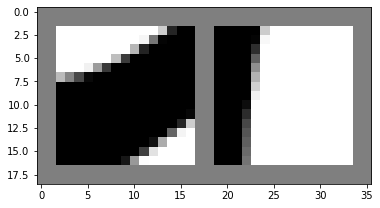


(true_class == predicted_class).item()=True
smallC 0.9136553406715393
smallC 0.9136553406715393


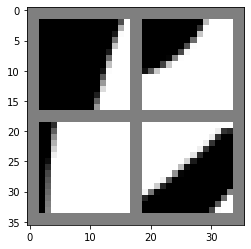


(true_class == predicted_class).item()=True
smallC 0.9939664602279663
smallC 0.9939664602279663


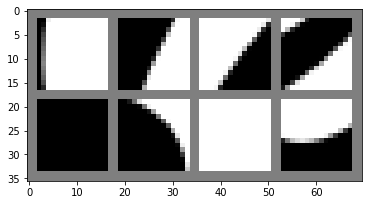


29 AGaramondPro-BoldItalic smallD


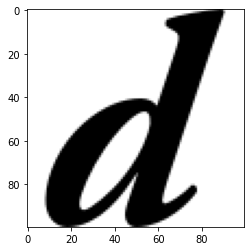


(true_class == predicted_class).item()=True
smallD 0.9995112419128418
smallD 0.9995112419128418


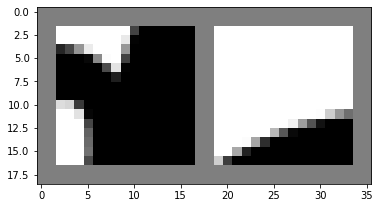


(true_class == predicted_class).item()=True
smallD 0.9965762495994568
smallD 0.9965762495994568


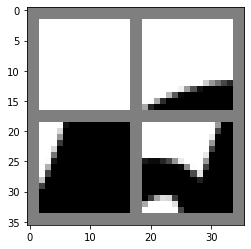


(true_class == predicted_class).item()=True
smallD 0.9992499947547913
smallD 0.9992499947547913


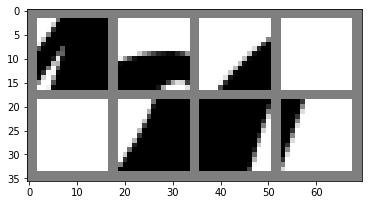


30 AGaramondPro-BoldItalic smallE


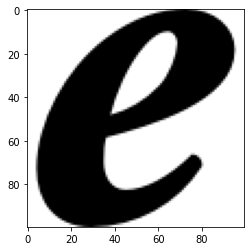


(true_class == predicted_class).item()=True
smallE 0.47925204038619995
smallE 0.47925204038619995


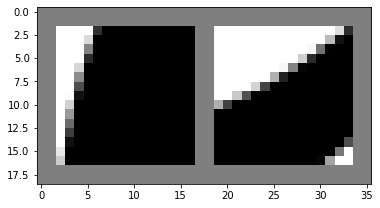


(true_class == predicted_class).item()=True
smallE 0.9990549683570862
smallE 0.9990549683570862


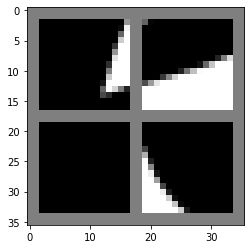


(true_class == predicted_class).item()=True
smallE 0.9999306201934814
smallE 0.9999306201934814


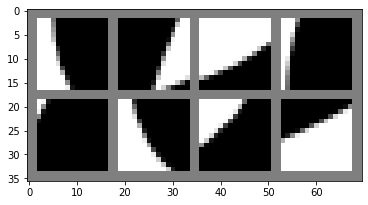


31 AGaramondPro-BoldItalic smallF


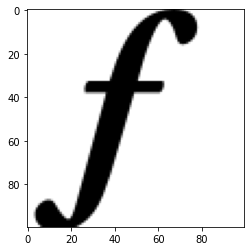


(true_class == predicted_class).item()=True
smallF 0.8391647338867188
smallF 0.8391647338867188


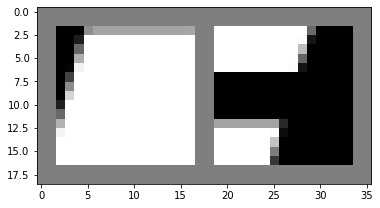


(true_class == predicted_class).item()=True
smallF 0.9947574138641357
smallF 0.9947574138641357


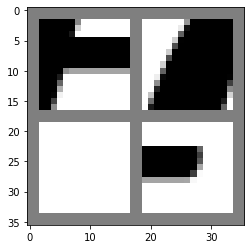


(true_class == predicted_class).item()=True
smallF 0.9998763799667358
smallF 0.9998763799667358


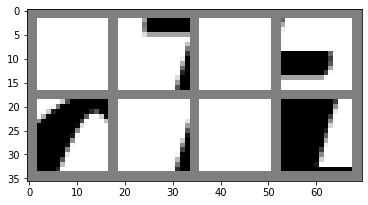


32 AGaramondPro-BoldItalic smallG


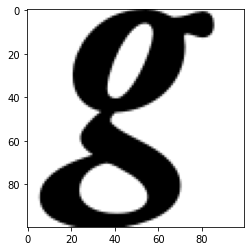


(true_class == predicted_class).item()=True
smallG 0.9941957592964172
smallG 0.9941957592964172


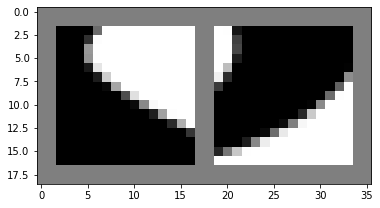


(true_class == predicted_class).item()=True
smallG 0.9996143579483032
smallG 0.9996143579483032


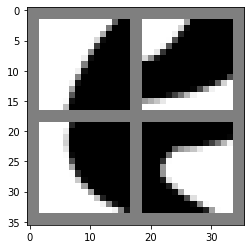


(true_class == predicted_class).item()=True
smallG 0.9997966885566711
smallG 0.9997966885566711


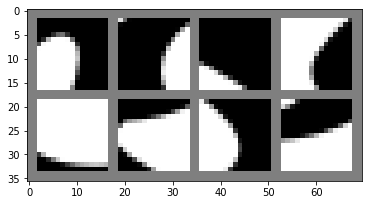


33 AGaramondPro-BoldItalic smallH


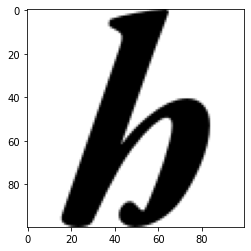


(true_class == predicted_class).item()=True
smallH 0.4390454590320587
smallH 0.4390454590320587


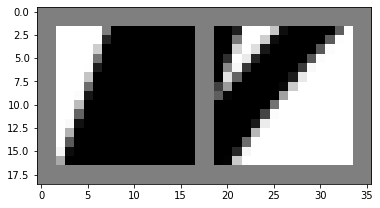


(true_class == predicted_class).item()=True
smallH 0.7308934330940247
smallH 0.7308934330940247


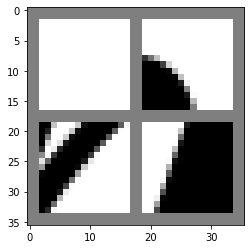


(true_class == predicted_class).item()=True
smallH 0.9914188385009766
smallH 0.9914188385009766


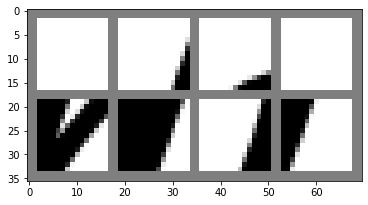


34 AGaramondPro-BoldItalic smallI


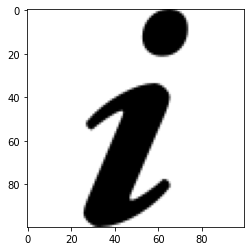


(true_class == predicted_class).item()=True
smallI 0.9147317409515381
smallI 0.9147317409515381


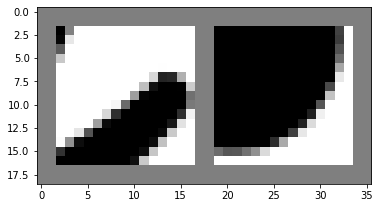


(true_class == predicted_class).item()=True
smallI 0.8410208225250244
smallI 0.8410208225250244


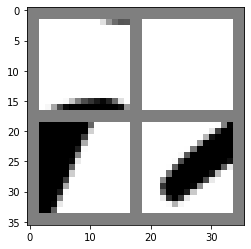


(true_class == predicted_class).item()=True
smallI 0.9990033507347107
smallI 0.9990033507347107


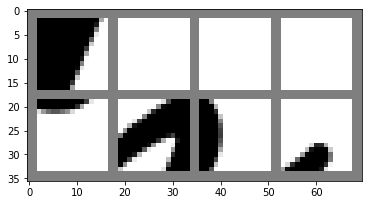


35 AGaramondPro-BoldItalic smallJ


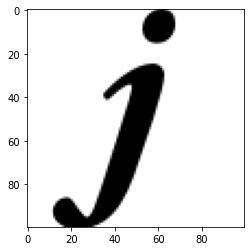


(true_class == predicted_class).item()=True
smallJ 0.9439219832420349
smallJ 0.9439219832420349


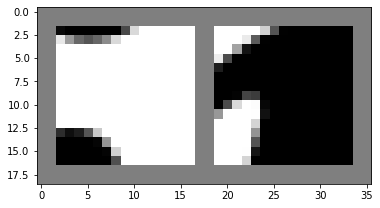


(true_class == predicted_class).item()=True
smallJ 0.9996534585952759
smallJ 0.9996534585952759


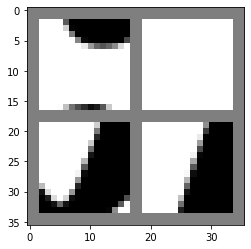


(true_class == predicted_class).item()=True
smallJ 0.7444419860839844
smallJ 0.7444419860839844


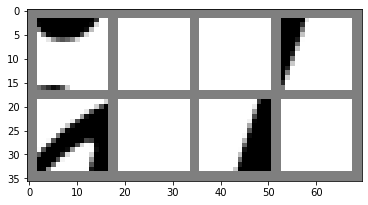


36 AGaramondPro-BoldItalic smallK


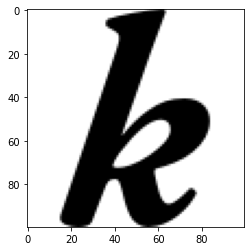


(true_class == predicted_class).item()=True
smallK 0.769387423992157
smallK 0.769387423992157


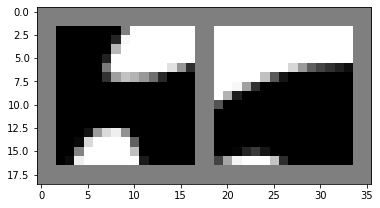


(true_class == predicted_class).item()=True
smallK 0.8384357690811157
smallK 0.8384357690811157


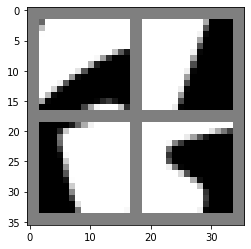


(true_class == predicted_class).item()=True
smallK 0.9986763596534729
smallK 0.9986763596534729


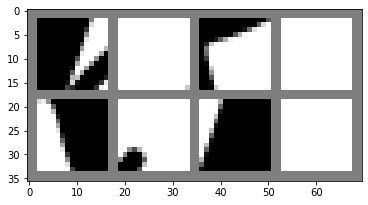


37 AGaramondPro-BoldItalic smallL


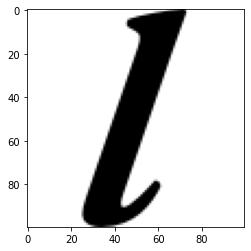


(true_class == predicted_class).item()=True
smallL 0.5705959796905518
smallL 0.5705959796905518


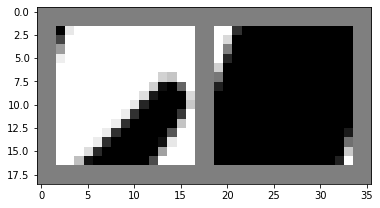


(true_class == predicted_class).item()=True
smallL 0.8459327816963196
smallL 0.8459327816963196


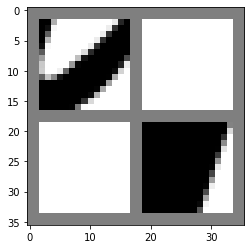


(true_class == predicted_class).item()=True
smallL 0.9255945682525635
smallL 0.9255945682525635


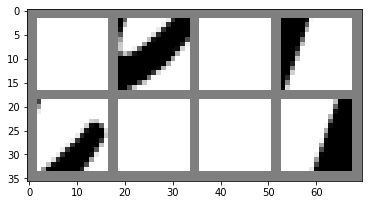


38 AGaramondPro-BoldItalic smallM


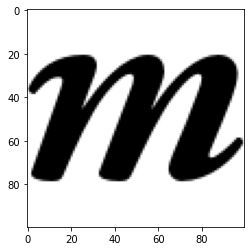


(true_class == predicted_class).item()=True
smallM 0.9500274062156677
smallM 0.9500274062156677


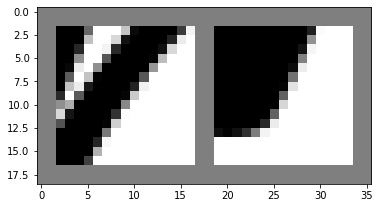


(true_class == predicted_class).item()=True
smallM 0.9996680021286011
smallM 0.9996680021286011


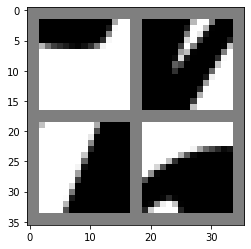


(true_class == predicted_class).item()=True
smallM 0.999885082244873
smallM 0.999885082244873


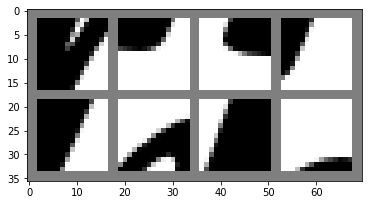


39 AGaramondPro-BoldItalic smallN


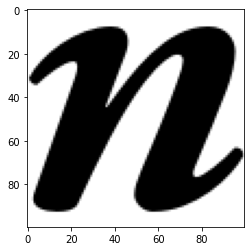


(true_class == predicted_class).item()=True
smallN 0.7731093764305115
smallN 0.7731093764305115


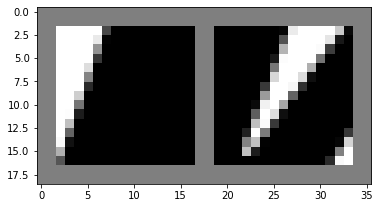


(true_class == predicted_class).item()=False
smallN 0.491690993309021
smallM 0.5071828365325928


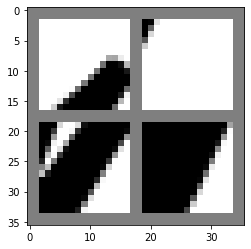


(true_class == predicted_class).item()=True
smallN 0.9995330572128296
smallN 0.9995330572128296


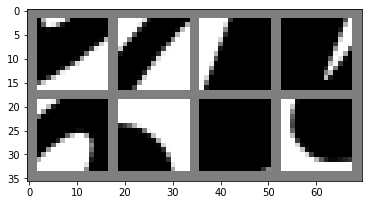


40 AGaramondPro-BoldItalic smallO


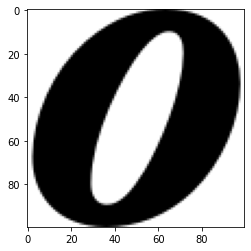


(true_class == predicted_class).item()=True
smallO 0.4138442575931549
smallO 0.4138442575931549


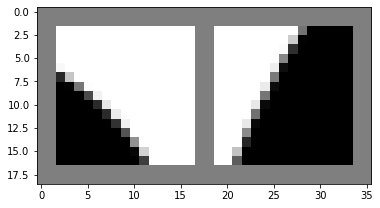


(true_class == predicted_class).item()=True
smallO 0.5075692534446716
smallO 0.5075692534446716


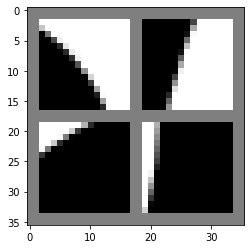


(true_class == predicted_class).item()=True
smallO 0.475551575422287
smallO 0.475551575422287


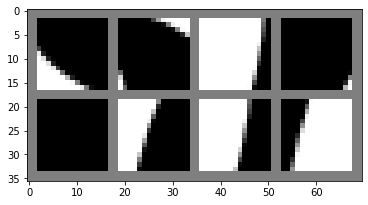


41 AGaramondPro-BoldItalic smallP


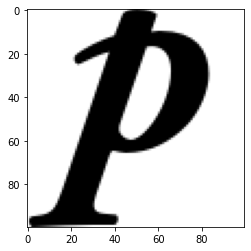


(true_class == predicted_class).item()=True
smallP 0.9406349658966064
smallP 0.9406349658966064


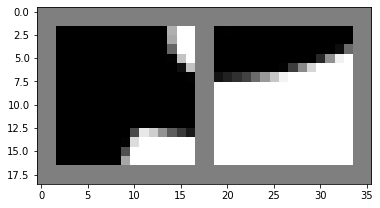


(true_class == predicted_class).item()=True
smallP 0.9839094281196594
smallP 0.9839094281196594


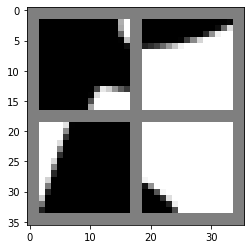


(true_class == predicted_class).item()=True
smallP 0.9809567928314209
smallP 0.9809567928314209


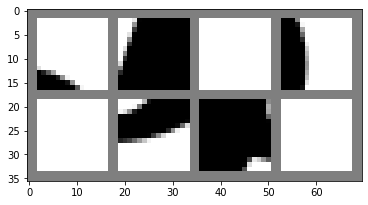


42 AGaramondPro-BoldItalic smallQ


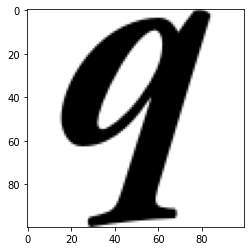


(true_class == predicted_class).item()=True
smallQ 0.5592447519302368
smallQ 0.5592447519302368


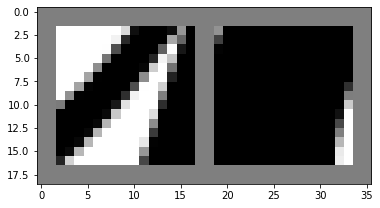


(true_class == predicted_class).item()=True
smallQ 0.8549584746360779
smallQ 0.8549584746360779


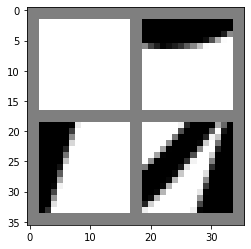


(true_class == predicted_class).item()=True
smallQ 0.9900931715965271
smallQ 0.9900931715965271


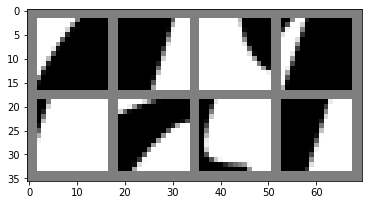


43 AGaramondPro-BoldItalic smallR


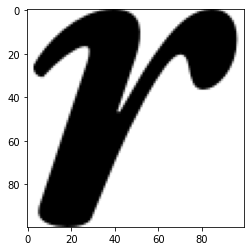


(true_class == predicted_class).item()=True
smallR 0.6502431035041809
smallR 0.6502431035041809


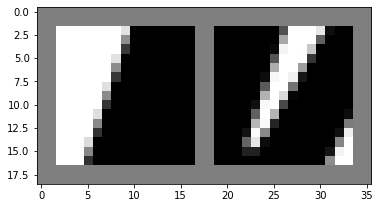


(true_class == predicted_class).item()=True
smallR 0.9984890222549438
smallR 0.9984890222549438


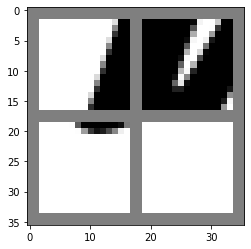


(true_class == predicted_class).item()=True
smallR 0.999950647354126
smallR 0.999950647354126


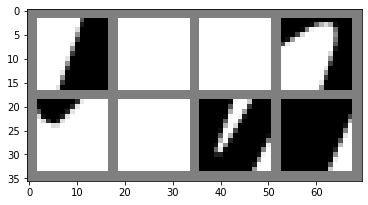


44 AGaramondPro-BoldItalic smallS


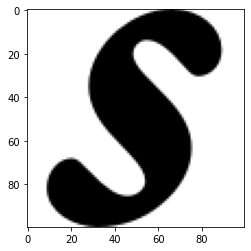


(true_class == predicted_class).item()=True
smallS 0.5436984300613403
smallS 0.5436984300613403


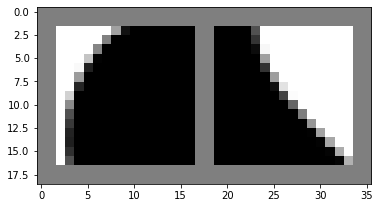


(true_class == predicted_class).item()=True
smallS 0.6243077516555786
smallS 0.6243077516555786


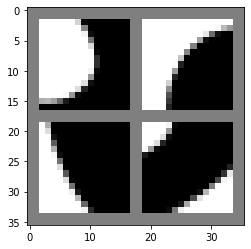


(true_class == predicted_class).item()=True
smallS 0.9879732131958008
smallS 0.9879732131958008


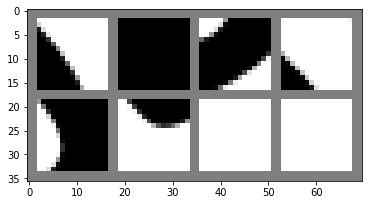


45 AGaramondPro-BoldItalic smallT


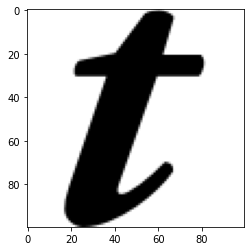


(true_class == predicted_class).item()=False
smallT 0.40381723642349243
smallE 0.5314069390296936


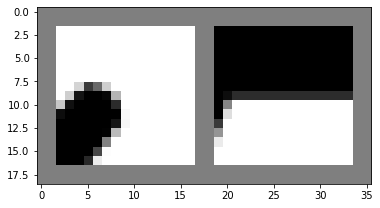


(true_class == predicted_class).item()=True
smallT 0.7285245656967163
smallT 0.7285245656967163


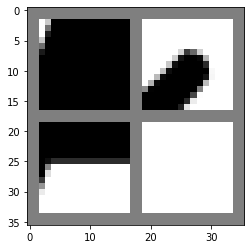


(true_class == predicted_class).item()=True
smallT 0.9998795986175537
smallT 0.9998795986175537


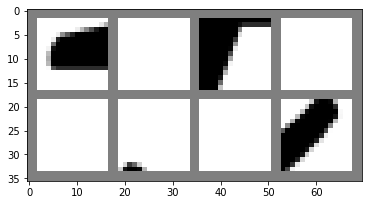


46 AGaramondPro-BoldItalic smallU


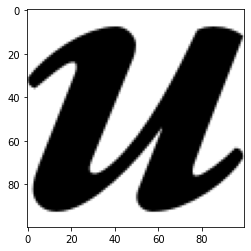


(true_class == predicted_class).item()=True
smallU 0.7133767008781433
smallU 0.7133767008781433


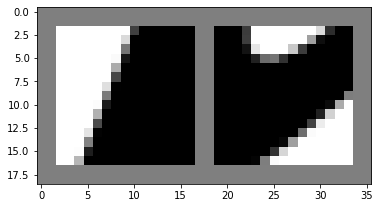


(true_class == predicted_class).item()=True
smallU 0.975421667098999
smallU 0.975421667098999


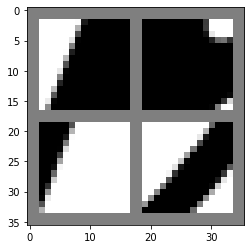


(true_class == predicted_class).item()=True
smallU 0.9875380992889404
smallU 0.9875380992889404


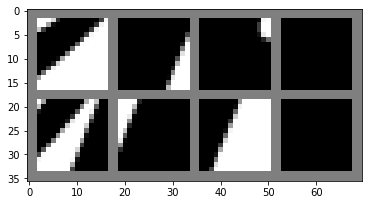


47 AGaramondPro-BoldItalic smallV


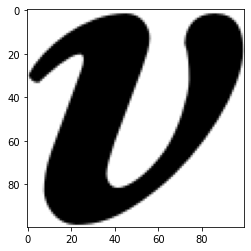


(true_class == predicted_class).item()=True
smallV 0.5621476173400879
smallV 0.5621476173400879


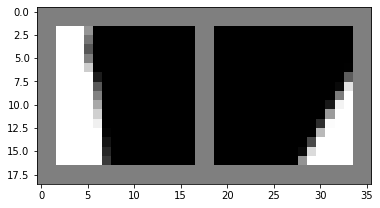


(true_class == predicted_class).item()=True
smallV 0.9226832389831543
smallV 0.9226832389831543


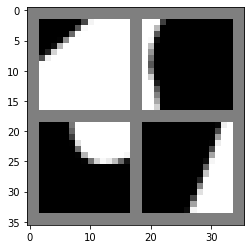


(true_class == predicted_class).item()=True
smallV 0.9962040781974792
smallV 0.9962040781974792


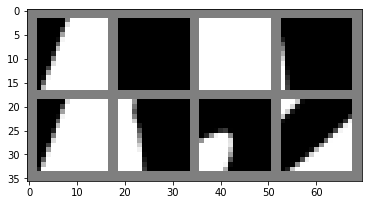


48 AGaramondPro-BoldItalic smallW


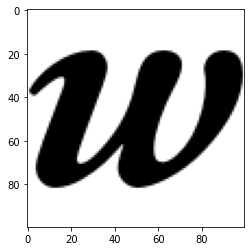


(true_class == predicted_class).item()=False
smallW 0.43730366230010986
capW 0.4730950891971588


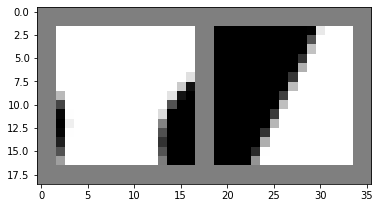


(true_class == predicted_class).item()=True
smallW 0.9370197057723999
smallW 0.9370197057723999


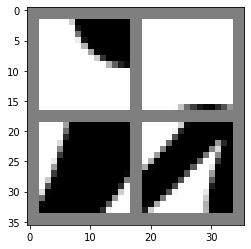


(true_class == predicted_class).item()=True
smallW 0.9119427800178528
smallW 0.9119427800178528


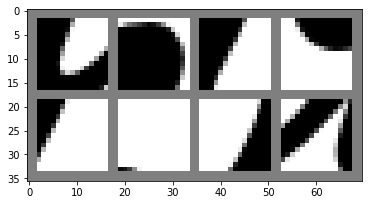


49 AGaramondPro-BoldItalic smallX


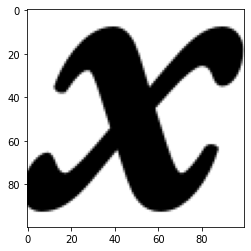


(true_class == predicted_class).item()=False
smallX 0.3978908061981201
capX 0.600558876991272


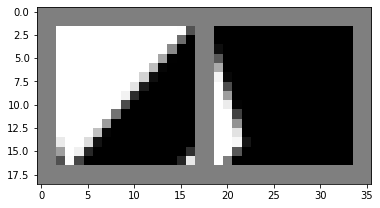


(true_class == predicted_class).item()=True
smallX 0.9928305745124817
smallX 0.9928305745124817


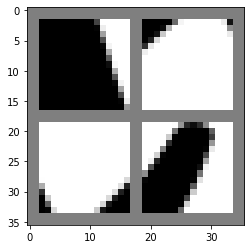


(true_class == predicted_class).item()=True
smallX 0.9968162178993225
smallX 0.9968162178993225


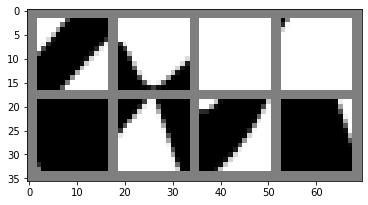


50 AGaramondPro-BoldItalic smallY


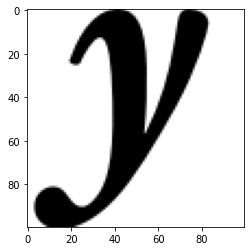


(true_class == predicted_class).item()=True
smallY 0.666718065738678
smallY 0.666718065738678


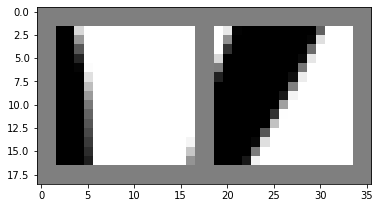


(true_class == predicted_class).item()=True
smallY 0.970000147819519
smallY 0.970000147819519


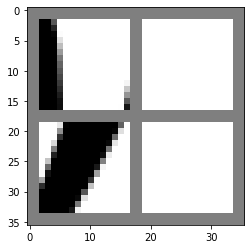


(true_class == predicted_class).item()=True
smallY 0.929773211479187
smallY 0.929773211479187


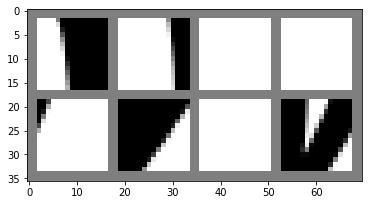


51 AGaramondPro-BoldItalic smallZ


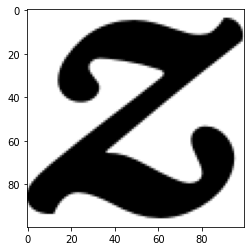


(true_class == predicted_class).item()=True
smallZ 0.9915648698806763
smallZ 0.9915648698806763


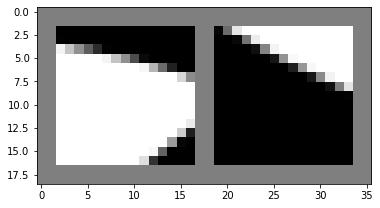


(true_class == predicted_class).item()=True
smallZ 0.9973070621490479
smallZ 0.9973070621490479


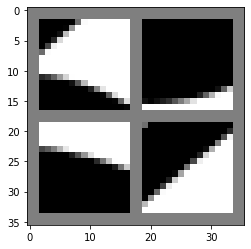


(true_class == predicted_class).item()=True
smallZ 0.996213972568512
smallZ 0.996213972568512


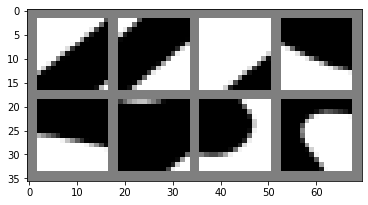


52 AJensonPro-Capt capA


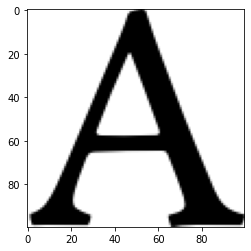


(true_class == predicted_class).item()=True
capA 0.999376118183136
capA 0.999376118183136


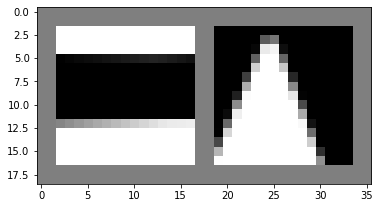


(true_class == predicted_class).item()=True
capA 0.9984130859375
capA 0.9984130859375


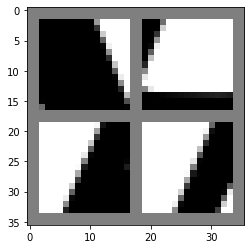


(true_class == predicted_class).item()=True
capA 0.9983291029930115
capA 0.9983291029930115


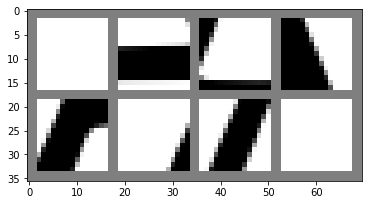


53 AJensonPro-Capt capB


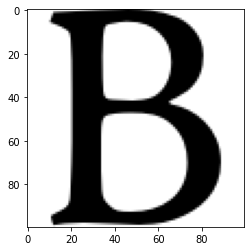


(true_class == predicted_class).item()=True
capB 0.929731011390686
capB 0.929731011390686


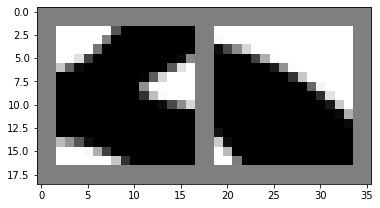


(true_class == predicted_class).item()=True
capB 0.9973257780075073
capB 0.9973257780075073


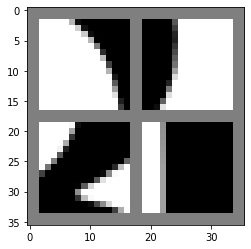


(true_class == predicted_class).item()=True
capB 0.9946959614753723
capB 0.9946959614753723


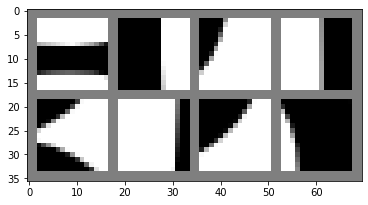


54 AJensonPro-Capt capC


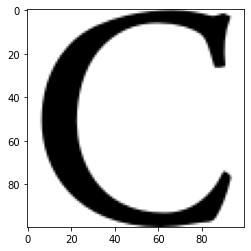


(true_class == predicted_class).item()=True
capC 0.39794981479644775
capC 0.39794981479644775


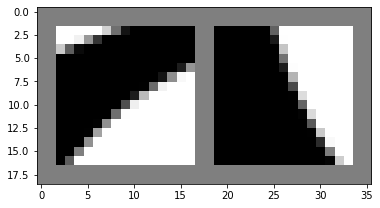


(true_class == predicted_class).item()=True
capC 0.48160138726234436
capC 0.48160138726234436


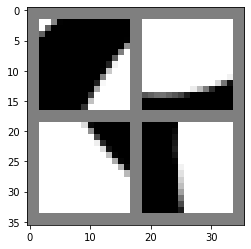


(true_class == predicted_class).item()=True
capC 0.9892665147781372
capC 0.9892665147781372


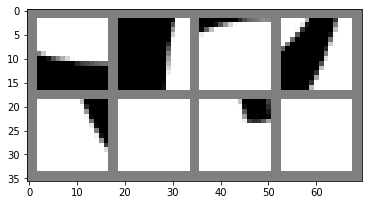


55 AJensonPro-Capt capD


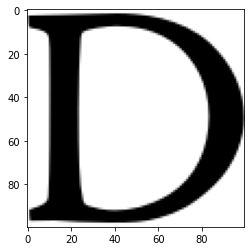


(true_class == predicted_class).item()=True
capD 0.980118989944458
capD 0.980118989944458


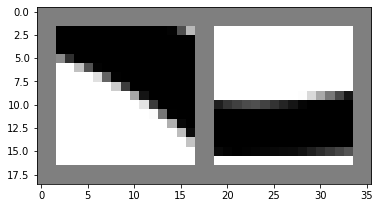


(true_class == predicted_class).item()=True
capD 0.9820642471313477
capD 0.9820642471313477


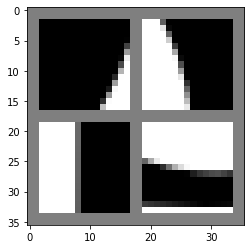


(true_class == predicted_class).item()=True
capD 0.9879859089851379
capD 0.9879859089851379


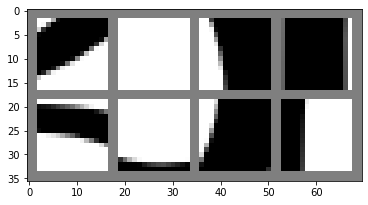


56 AJensonPro-Capt capE


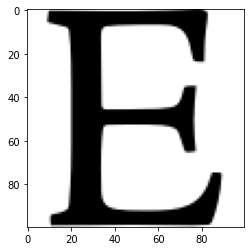


(true_class == predicted_class).item()=True
capE 0.6885079741477966
capE 0.6885079741477966


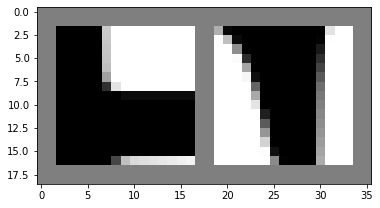


(true_class == predicted_class).item()=True
capE 0.9157888889312744
capE 0.9157888889312744


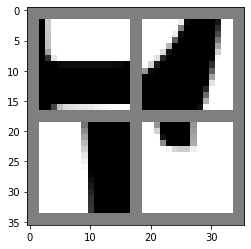


(true_class == predicted_class).item()=True
capE 0.9056537747383118
capE 0.9056537747383118


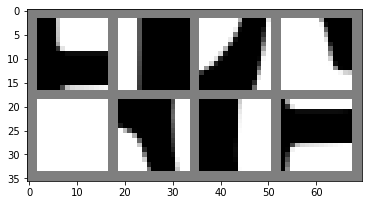


57 AJensonPro-Capt capF


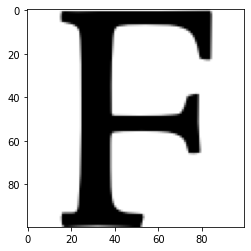


(true_class == predicted_class).item()=False
capF 0.35768505930900574
capE 0.641217827796936


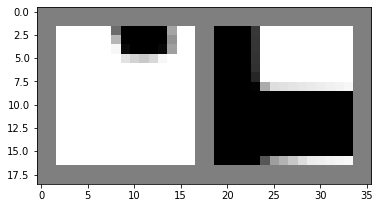


(true_class == predicted_class).item()=False
capF 0.07128914445638657
capE 0.9287006258964539


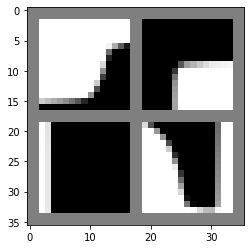


(true_class == predicted_class).item()=True
capF 0.6157323122024536
capF 0.6157323122024536


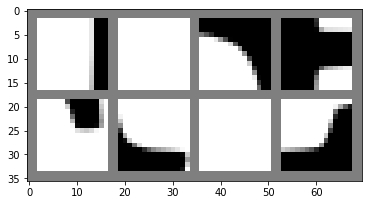


58 AJensonPro-Capt capG


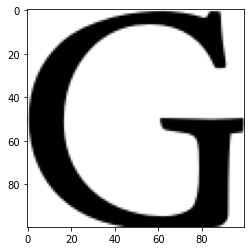


(true_class == predicted_class).item()=True
capG 0.40015578269958496
capG 0.40015578269958496


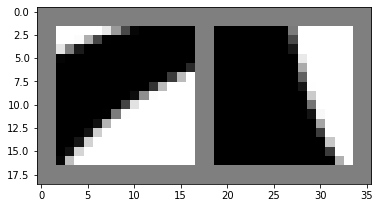


(true_class == predicted_class).item()=True
capG 0.9989238381385803
capG 0.9989238381385803


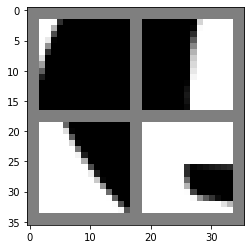


(true_class == predicted_class).item()=True
capG 0.9998524188995361
capG 0.9998524188995361


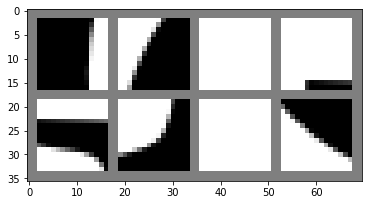


59 AJensonPro-Capt capH


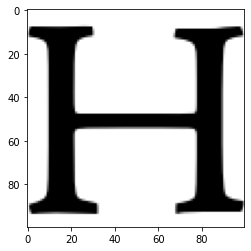


(true_class == predicted_class).item()=True
capH 0.8576598167419434
capH 0.8576598167419434


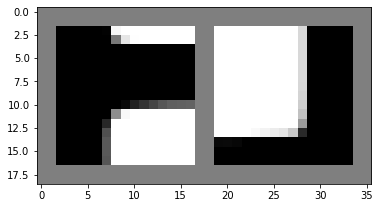


(true_class == predicted_class).item()=True
capH 0.9964196681976318
capH 0.9964196681976318


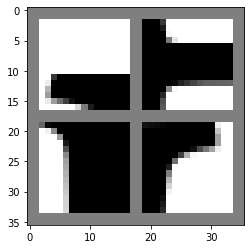


(true_class == predicted_class).item()=True
capH 0.9952409267425537
capH 0.9952409267425537


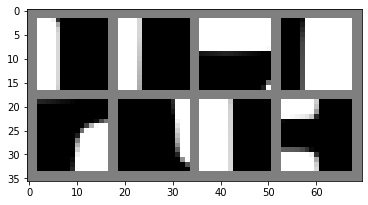


60 AJensonPro-Capt capI


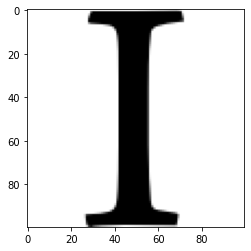


(true_class == predicted_class).item()=True
capI 0.27303189039230347
capI 0.27303189039230347


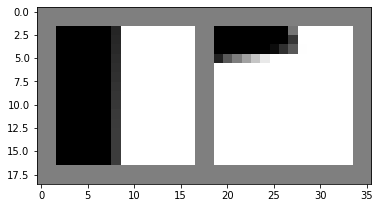


(true_class == predicted_class).item()=False
capI 0.32776886224746704
capL 0.36307913064956665


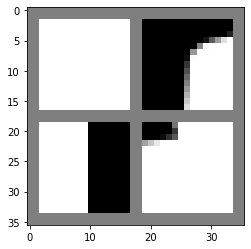


(true_class == predicted_class).item()=True
capI 0.8010616898536682
capI 0.8010616898536682


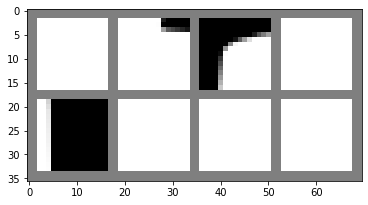


61 AJensonPro-Capt capJ


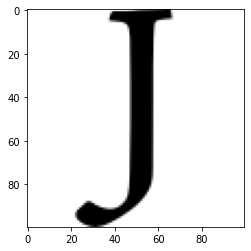


(true_class == predicted_class).item()=False
capJ 0.2771589159965515
smallJ 0.39647963643074036


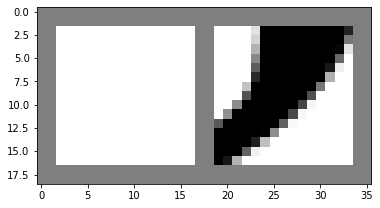


(true_class == predicted_class).item()=True
capJ 0.8887050747871399
capJ 0.8887050747871399


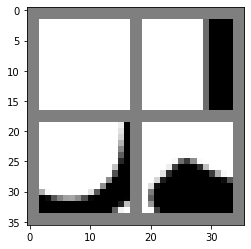


(true_class == predicted_class).item()=True
capJ 0.9534538388252258
capJ 0.9534538388252258


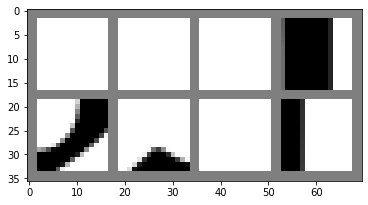


62 AJensonPro-Capt capK


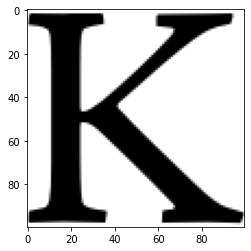


(true_class == predicted_class).item()=True
capK 0.932991623878479
capK 0.932991623878479


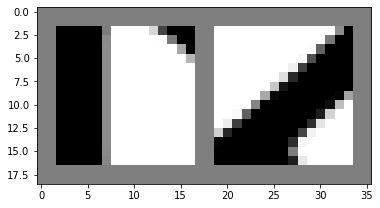


(true_class == predicted_class).item()=True
capK 0.9997518658638
capK 0.9997518658638


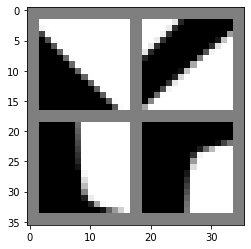


(true_class == predicted_class).item()=True
capK 0.999573290348053
capK 0.999573290348053


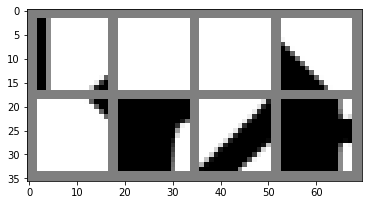


63 AJensonPro-Capt capL


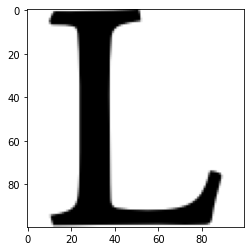


(true_class == predicted_class).item()=False
capL 0.2566741406917572
capE 0.7196195125579834


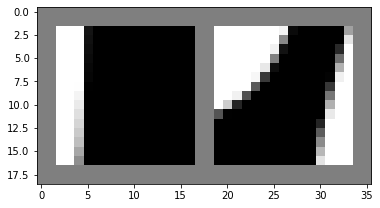


(true_class == predicted_class).item()=True
capL 0.9876307845115662
capL 0.9876307845115662


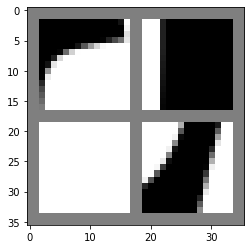


(true_class == predicted_class).item()=True
capL 0.9624202847480774
capL 0.9624202847480774


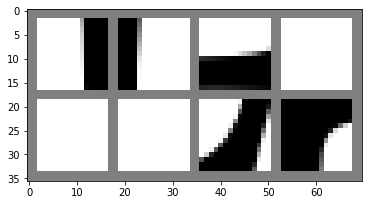


64 AJensonPro-Capt capM


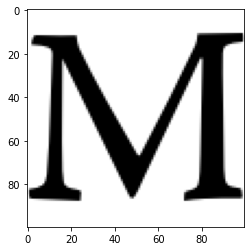


(true_class == predicted_class).item()=True
capM 0.999397873878479
capM 0.999397873878479


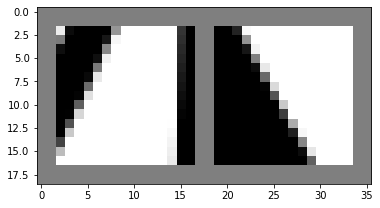


(true_class == predicted_class).item()=True
capM 0.993235170841217
capM 0.993235170841217


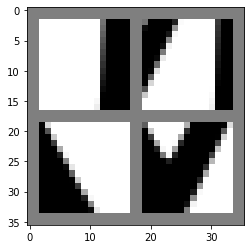


(true_class == predicted_class).item()=True
capM 0.9886423945426941
capM 0.9886423945426941


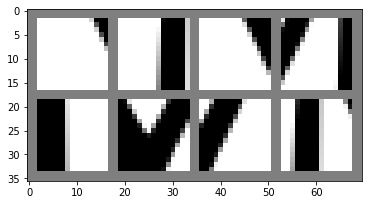


65 AJensonPro-Capt capN


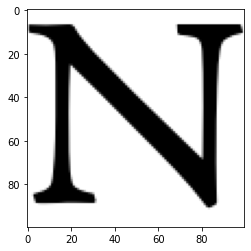


(true_class == predicted_class).item()=True
capN 0.9949631690979004
capN 0.9949631690979004


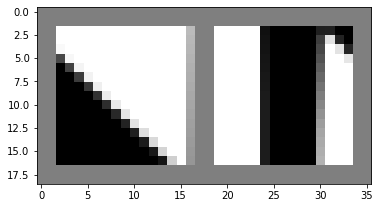


(true_class == predicted_class).item()=True
capN 0.9978825449943542
capN 0.9978825449943542


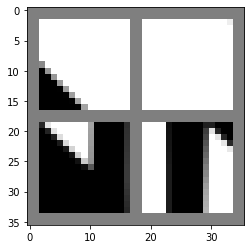


(true_class == predicted_class).item()=True
capN 0.9986127614974976
capN 0.9986127614974976


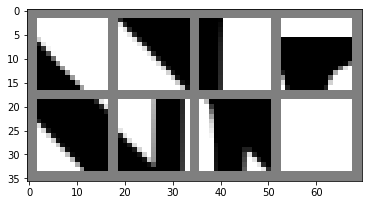


66 AJensonPro-Capt capO


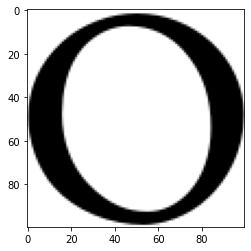


(true_class == predicted_class).item()=True
capO 0.32303282618522644
capO 0.32303282618522644


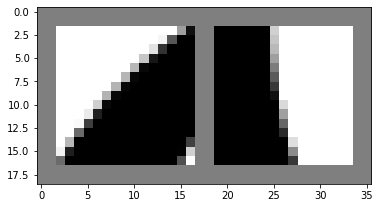


(true_class == predicted_class).item()=True
capO 0.5707710385322571
capO 0.5707710385322571


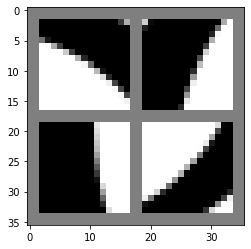


(true_class == predicted_class).item()=True
capO 0.6263958811759949
capO 0.6263958811759949


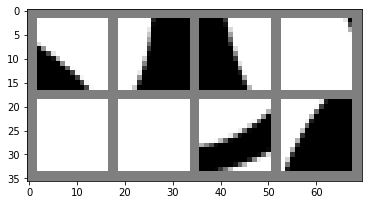


67 AJensonPro-Capt capP


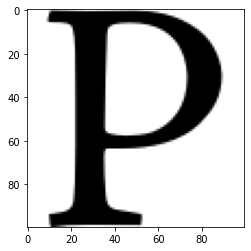


(true_class == predicted_class).item()=True
capP 0.9726482629776001
capP 0.9726482629776001


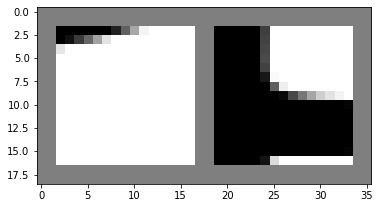


(true_class == predicted_class).item()=True
capP 0.9022337198257446
capP 0.9022337198257446


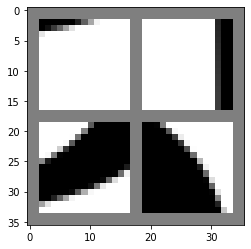


(true_class == predicted_class).item()=True
capP 0.9790101051330566
capP 0.9790101051330566


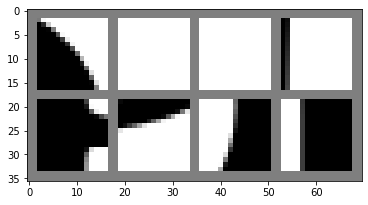


68 AJensonPro-Capt capQ


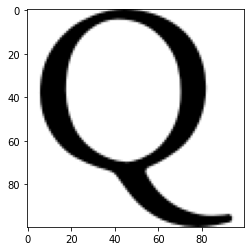


(true_class == predicted_class).item()=True
capQ 0.9934964179992676
capQ 0.9934964179992676


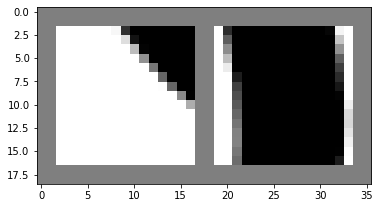


(true_class == predicted_class).item()=True
capQ 0.9994183778762817
capQ 0.9994183778762817


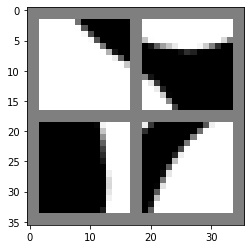


(true_class == predicted_class).item()=True
capQ 0.9989493489265442
capQ 0.9989493489265442


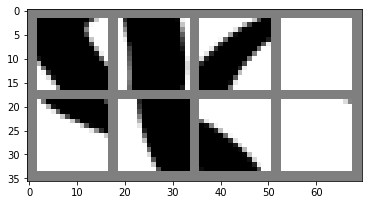


69 AJensonPro-Capt capR


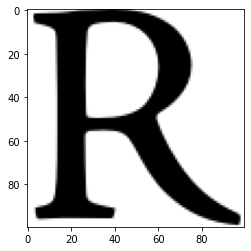


(true_class == predicted_class).item()=False
capR 0.19100722670555115
capB 0.8020634651184082


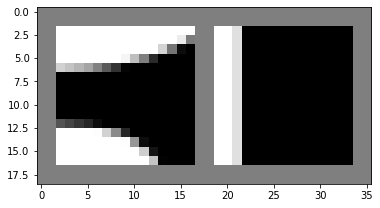


(true_class == predicted_class).item()=True
capR 0.9901999831199646
capR 0.9901999831199646


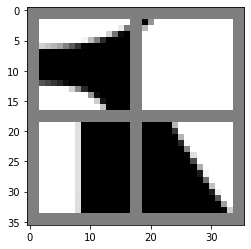


(true_class == predicted_class).item()=True
capR 0.9959114789962769
capR 0.9959114789962769


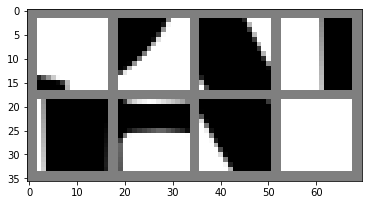


70 AJensonPro-Capt capS


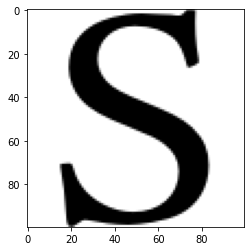


(true_class == predicted_class).item()=True
capS 0.5059699416160583
capS 0.5059699416160583


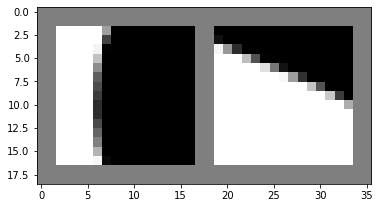


(true_class == predicted_class).item()=True
capS 0.6766666173934937
capS 0.6766666173934937


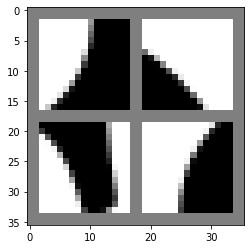


(true_class == predicted_class).item()=True
capS 0.5776030421257019
capS 0.5776030421257019


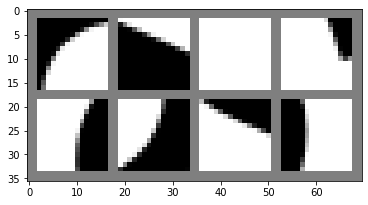


71 AJensonPro-Capt capT


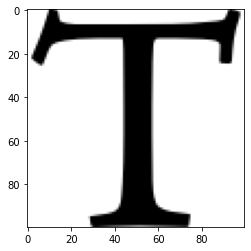


(true_class == predicted_class).item()=True
capT 0.8941012620925903
capT 0.8941012620925903


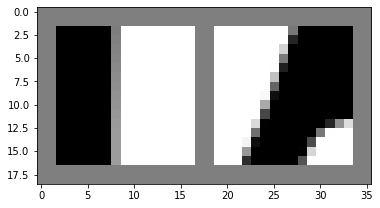


(true_class == predicted_class).item()=False
capT 0.24469926953315735
capE 0.5383766889572144


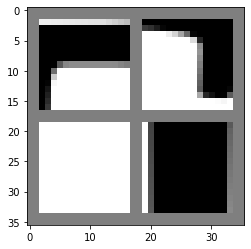


(true_class == predicted_class).item()=True
capT 0.9848031997680664
capT 0.9848031997680664


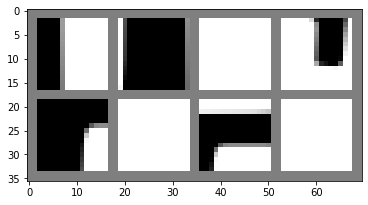


72 AJensonPro-Capt capU


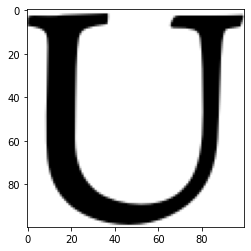


(true_class == predicted_class).item()=True
capU 0.9605538249015808
capU 0.9605538249015808


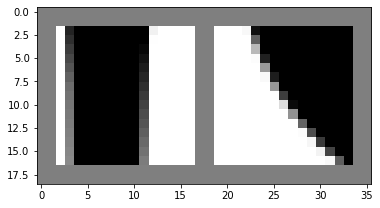


(true_class == predicted_class).item()=True
capU 0.999262273311615
capU 0.999262273311615


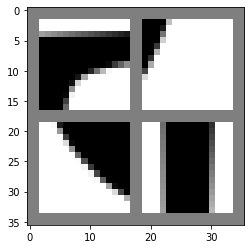


(true_class == predicted_class).item()=True
capU 0.9999504089355469
capU 0.9999504089355469


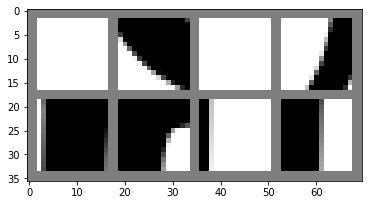


73 AJensonPro-Capt capV


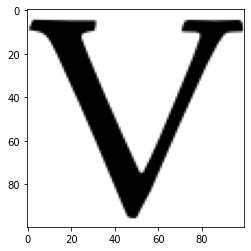


(true_class == predicted_class).item()=True
capV 0.4635019898414612
capV 0.4635019898414612


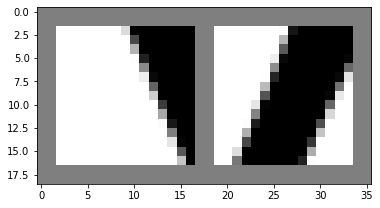


(true_class == predicted_class).item()=True
capV 0.5610464811325073
capV 0.5610464811325073


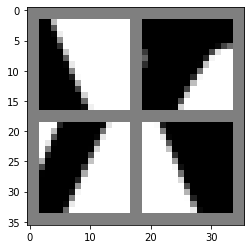


(true_class == predicted_class).item()=False
capV 0.4242022633552551
smallV 0.570741593837738


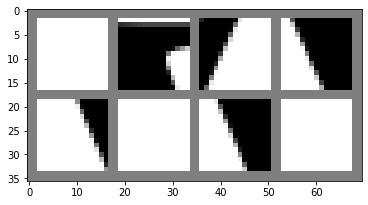


74 AJensonPro-Capt capW


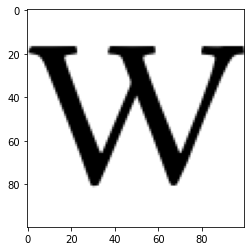


(true_class == predicted_class).item()=True
capW 0.8352380394935608
capW 0.8352380394935608


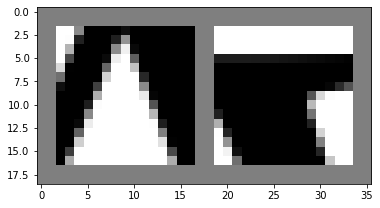


(true_class == predicted_class).item()=True
capW 0.8961179852485657
capW 0.8961179852485657


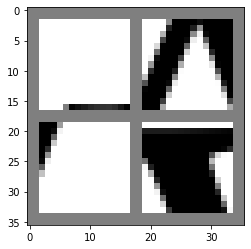


(true_class == predicted_class).item()=True
capW 0.7227279543876648
capW 0.7227279543876648


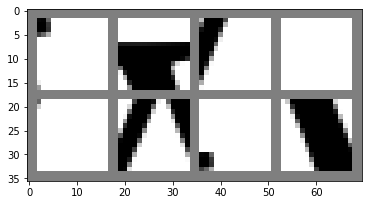


75 AJensonPro-Capt capX


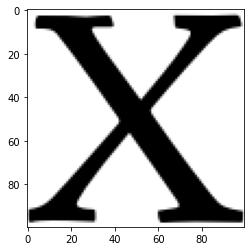


(true_class == predicted_class).item()=True
capX 0.512461245059967
capX 0.512461245059967


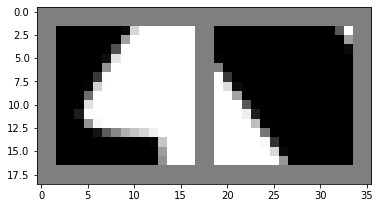


(true_class == predicted_class).item()=True
capX 0.6494094729423523
capX 0.6494094729423523


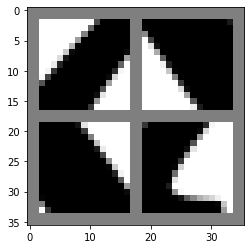


(true_class == predicted_class).item()=True
capX 0.7678112983703613
capX 0.7678112983703613


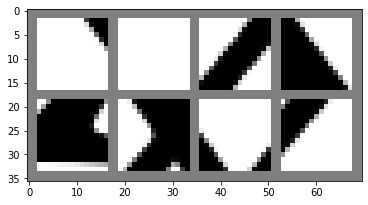


76 AJensonPro-Capt capY


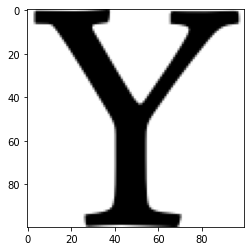


(true_class == predicted_class).item()=True
capY 0.9676303267478943
capY 0.9676303267478943


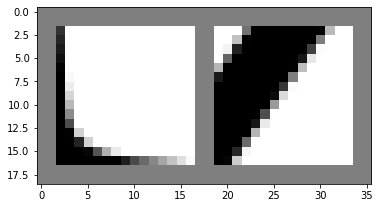


(true_class == predicted_class).item()=True
capY 0.9876977801322937
capY 0.9876977801322937


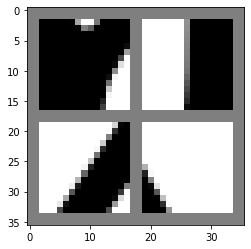


(true_class == predicted_class).item()=True
capY 0.9969287514686584
capY 0.9969287514686584


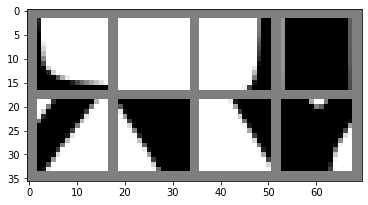


77 AJensonPro-Capt capZ


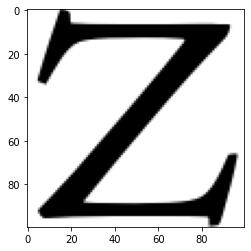


(true_class == predicted_class).item()=True
capZ 0.5683265924453735
capZ 0.5683265924453735


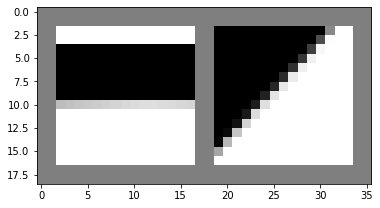


(true_class == predicted_class).item()=True
capZ 0.6709550023078918
capZ 0.6709550023078918


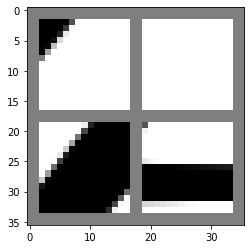


(true_class == predicted_class).item()=True
capZ 0.7158316373825073
capZ 0.7158316373825073


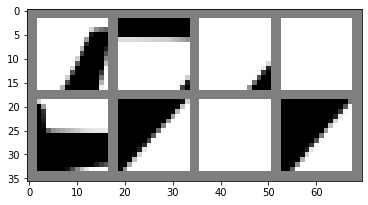


78 AJensonPro-Capt smallA


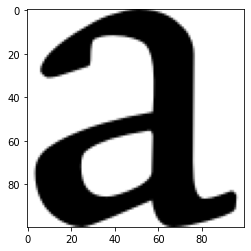


(true_class == predicted_class).item()=True
smallA 0.9985289573669434
smallA 0.9985289573669434


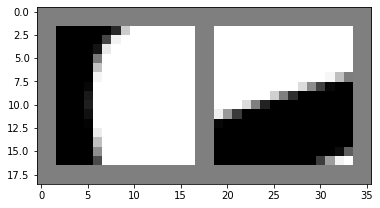


(true_class == predicted_class).item()=True
smallA 0.9999686479568481
smallA 0.9999686479568481


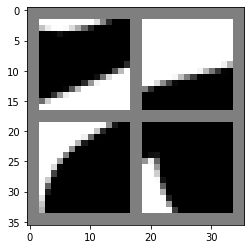


(true_class == predicted_class).item()=True
smallA 0.9999985694885254
smallA 0.9999985694885254


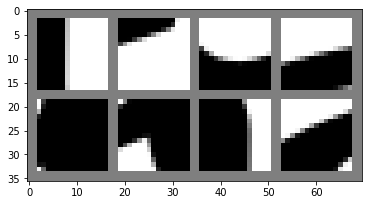


79 AJensonPro-Capt smallB


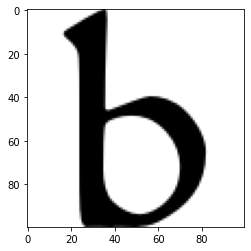


(true_class == predicted_class).item()=True
smallB 0.9421125650405884
smallB 0.9421125650405884


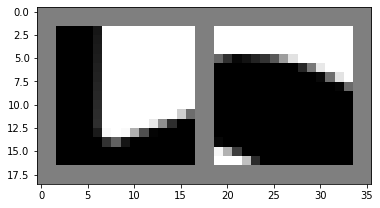


(true_class == predicted_class).item()=True
smallB 0.9736980199813843
smallB 0.9736980199813843


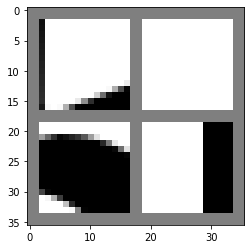


(true_class == predicted_class).item()=True
smallB 0.9999904632568359
smallB 0.9999904632568359


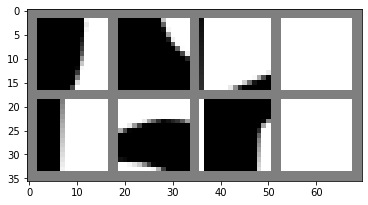


80 AJensonPro-Capt smallC


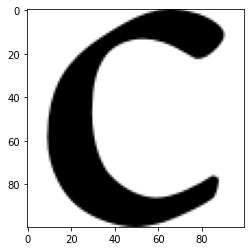


(true_class == predicted_class).item()=True
smallC 0.6466322541236877
smallC 0.6466322541236877


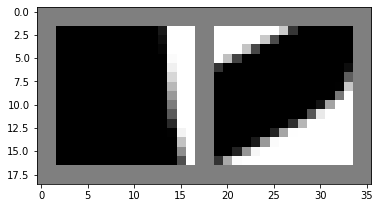


(true_class == predicted_class).item()=True
smallC 0.8118518590927124
smallC 0.8118518590927124


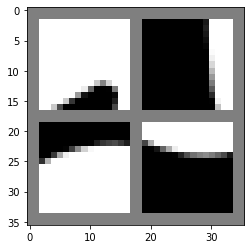


(true_class == predicted_class).item()=True
smallC 0.9968320727348328
smallC 0.9968320727348328


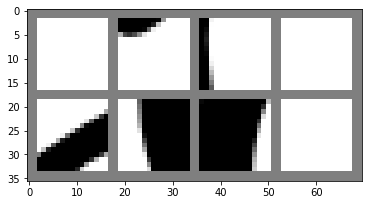


81 AJensonPro-Capt smallD


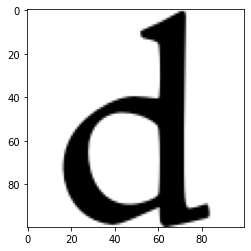


(true_class == predicted_class).item()=True
smallD 0.9986405968666077
smallD 0.9986405968666077


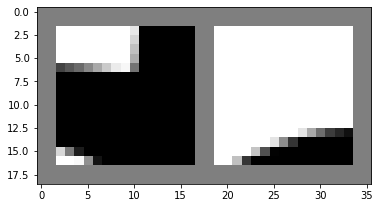


(true_class == predicted_class).item()=True
smallD 0.9996091723442078
smallD 0.9996091723442078


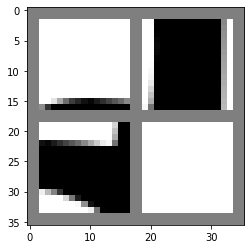


(true_class == predicted_class).item()=True
smallD 0.9998218417167664
smallD 0.9998218417167664


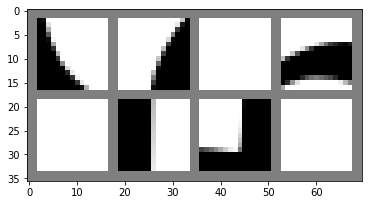


82 AJensonPro-Capt smallE


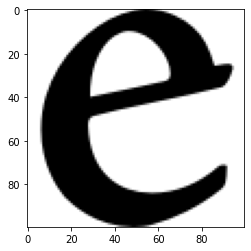


(true_class == predicted_class).item()=True
smallE 0.9976387023925781
smallE 0.9976387023925781


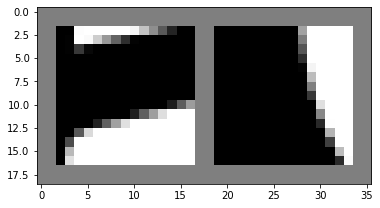


(true_class == predicted_class).item()=True
smallE 0.999984860420227
smallE 0.999984860420227


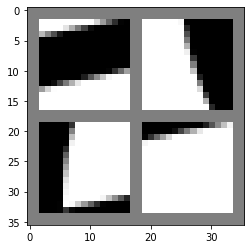


(true_class == predicted_class).item()=True
smallE 0.9999841451644897
smallE 0.9999841451644897


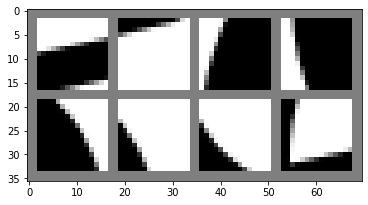


83 AJensonPro-Capt smallF


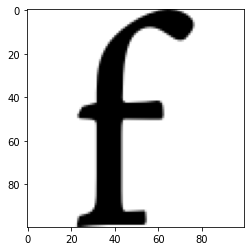


(true_class == predicted_class).item()=False
smallF 0.4022480547428131
smallD 0.4666025638580322


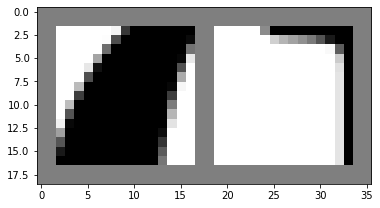


(true_class == predicted_class).item()=True
smallF 0.9940317273139954
smallF 0.9940317273139954


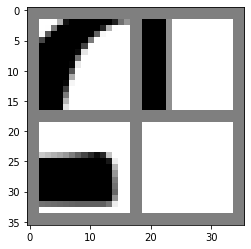


(true_class == predicted_class).item()=True
smallF 0.9999279975891113
smallF 0.9999279975891113


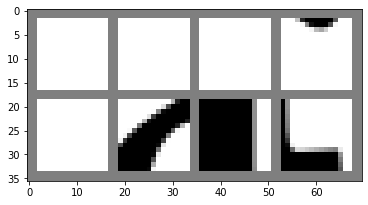


84 AJensonPro-Capt smallG


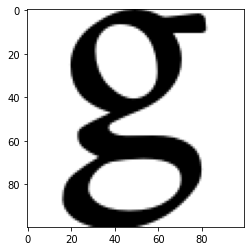


(true_class == predicted_class).item()=True
smallG 0.9982399940490723
smallG 0.9982399940490723


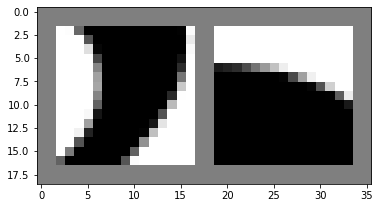


(true_class == predicted_class).item()=True
smallG 0.9989486336708069
smallG 0.9989486336708069


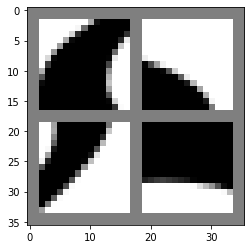


(true_class == predicted_class).item()=True
smallG 0.9999911785125732
smallG 0.9999911785125732


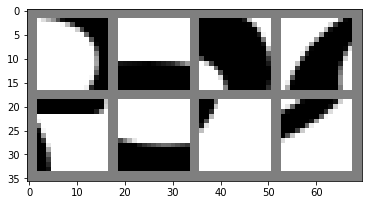


85 AJensonPro-Capt smallH


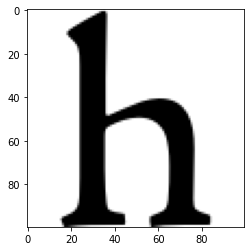


(true_class == predicted_class).item()=True
smallH 0.43735235929489136
smallH 0.43735235929489136


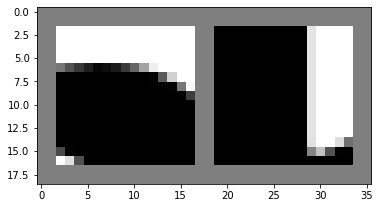


(true_class == predicted_class).item()=False
smallH 0.4129805564880371
smallB 0.576148509979248


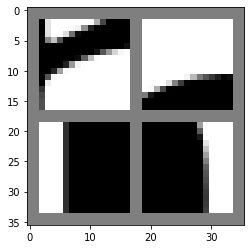


(true_class == predicted_class).item()=True
smallH 0.9925757646560669
smallH 0.9925757646560669


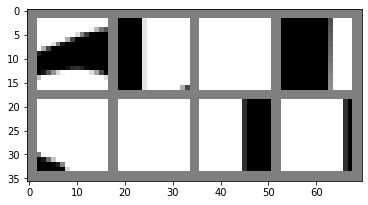


86 AJensonPro-Capt smallI


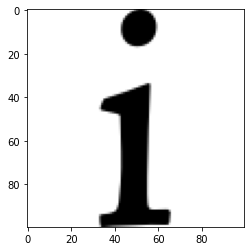


(true_class == predicted_class).item()=True
smallI 0.5341001152992249
smallI 0.5341001152992249


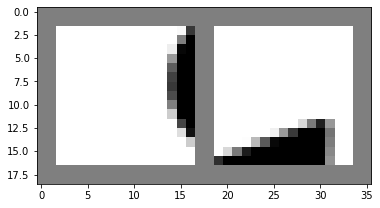


(true_class == predicted_class).item()=True
smallI 0.8295277953147888
smallI 0.8295277953147888


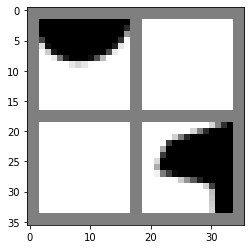


(true_class == predicted_class).item()=True
smallI 0.956504225730896
smallI 0.956504225730896


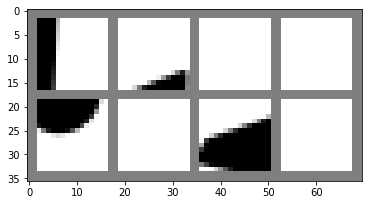


87 AJensonPro-Capt smallJ


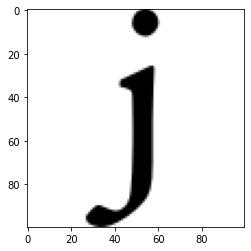


(true_class == predicted_class).item()=True
smallJ 0.7482876181602478
smallJ 0.7482876181602478


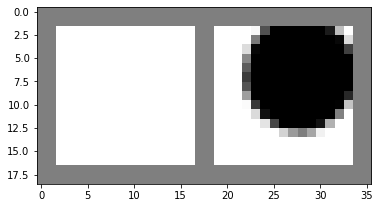


(true_class == predicted_class).item()=True
smallJ 0.9918000102043152
smallJ 0.9918000102043152


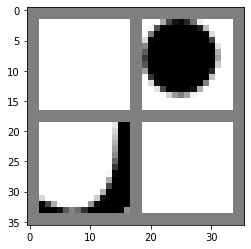


(true_class == predicted_class).item()=True
smallJ 0.9990572333335876
smallJ 0.9990572333335876


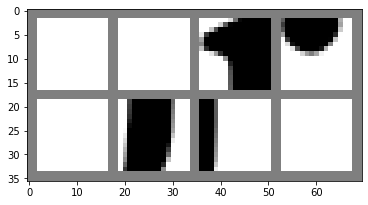


88 AJensonPro-Capt smallK


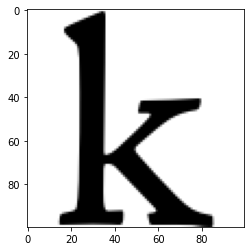


(true_class == predicted_class).item()=True
smallK 0.5328400731086731
smallK 0.5328400731086731


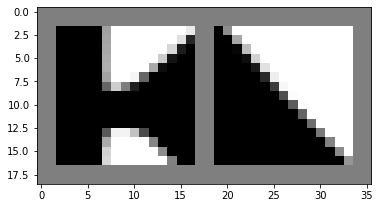


(true_class == predicted_class).item()=True
smallK 0.7879921793937683
smallK 0.7879921793937683


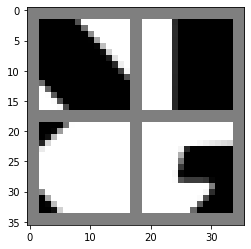


(true_class == predicted_class).item()=True
smallK 0.9686342477798462
smallK 0.9686342477798462


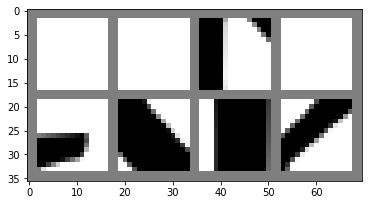


89 AJensonPro-Capt smallL


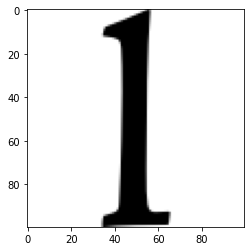


(true_class == predicted_class).item()=True
smallL 0.29773199558258057
smallL 0.29773199558258057


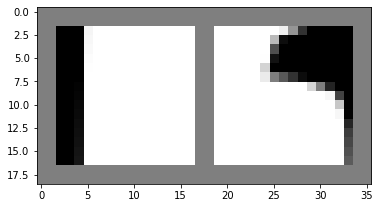


(true_class == predicted_class).item()=True
smallL 0.40889135003089905
smallL 0.40889135003089905


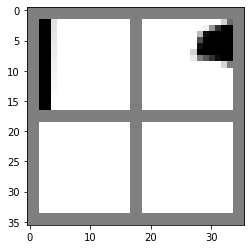


(true_class == predicted_class).item()=True
smallL 0.9143556952476501
smallL 0.9143556952476501


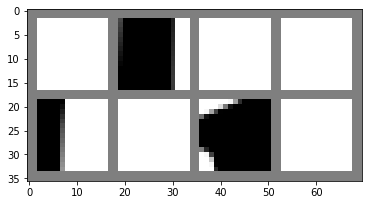


90 AJensonPro-Capt smallM


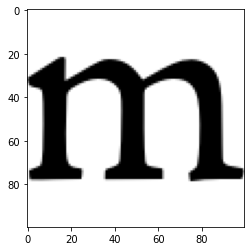


(true_class == predicted_class).item()=True
smallM 0.9832579493522644
smallM 0.9832579493522644


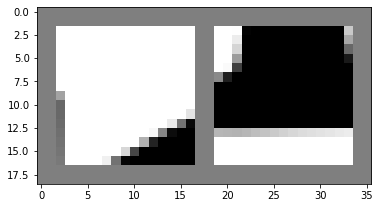


(true_class == predicted_class).item()=True
smallM 0.9983617663383484
smallM 0.9983617663383484


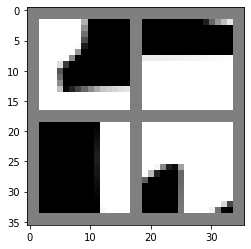


(true_class == predicted_class).item()=True
smallM 0.9999315738677979
smallM 0.9999315738677979


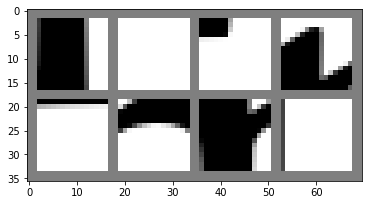


91 AJensonPro-Capt smallN


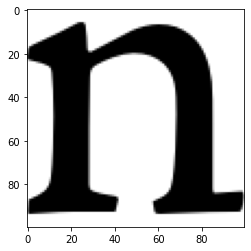


(true_class == predicted_class).item()=True
smallN 0.9626278877258301
smallN 0.9626278877258301


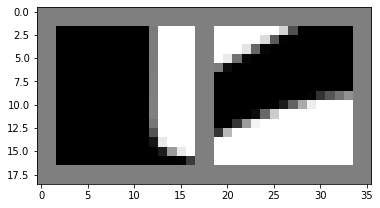


(true_class == predicted_class).item()=True
smallN 0.9573640823364258
smallN 0.9573640823364258


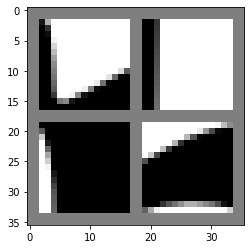


(true_class == predicted_class).item()=True
smallN 0.9999252557754517
smallN 0.9999252557754517


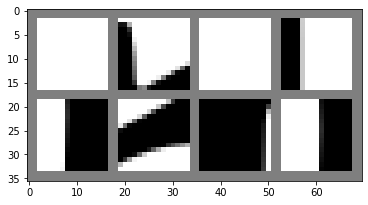


92 AJensonPro-Capt smallO


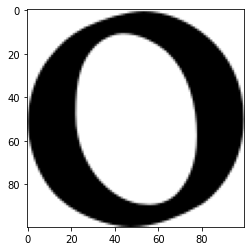


(true_class == predicted_class).item()=False
smallO 0.3843846917152405
capO 0.4666965901851654


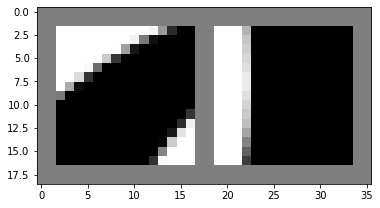


(true_class == predicted_class).item()=False
smallO 0.4314379394054413
capO 0.554267406463623


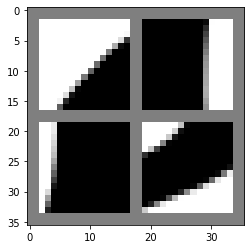


(true_class == predicted_class).item()=True
smallO 0.5719460844993591
smallO 0.5719460844993591


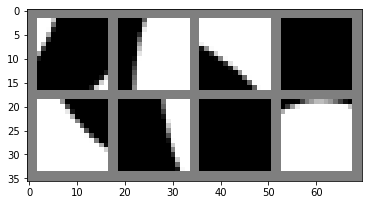


93 AJensonPro-Capt smallP


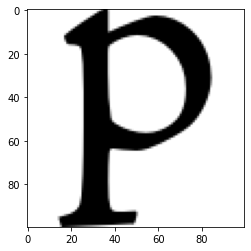


(true_class == predicted_class).item()=True
smallP 0.9491124749183655
smallP 0.9491124749183655


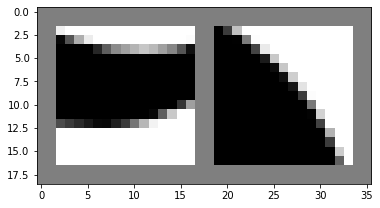


(true_class == predicted_class).item()=True
smallP 0.9118281006813049
smallP 0.9118281006813049


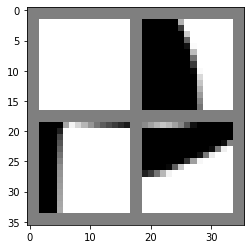


(true_class == predicted_class).item()=True
smallP 0.9992971420288086
smallP 0.9992971420288086


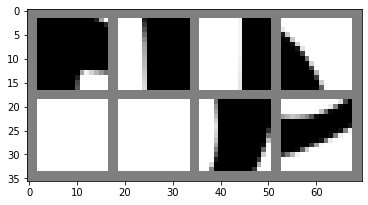


94 AJensonPro-Capt smallQ


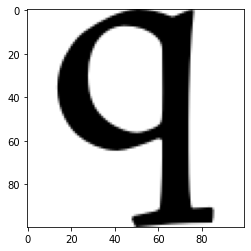


(true_class == predicted_class).item()=True
smallQ 0.8336336016654968
smallQ 0.8336336016654968


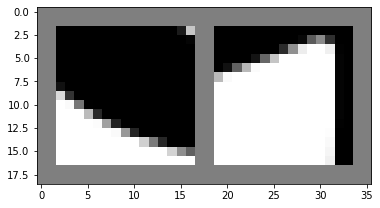


(true_class == predicted_class).item()=True
smallQ 0.7670114636421204
smallQ 0.7670114636421204


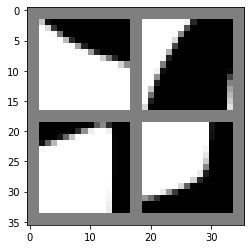


(true_class == predicted_class).item()=True
smallQ 0.9677258729934692
smallQ 0.9677258729934692


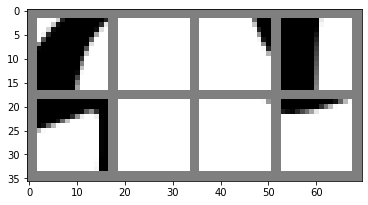


95 AJensonPro-Capt smallR


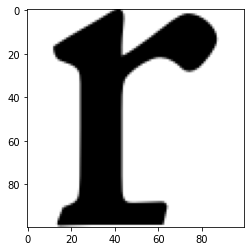


(true_class == predicted_class).item()=False
smallR 0.019176051020622253
smallN 0.9368836283683777


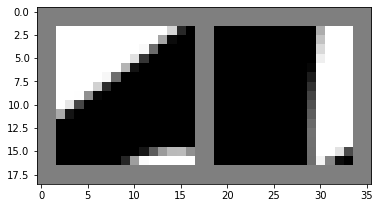


(true_class == predicted_class).item()=True
smallR 0.9971135854721069
smallR 0.9971135854721069


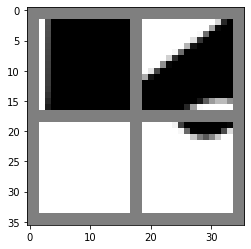


(true_class == predicted_class).item()=True
smallR 0.9962255954742432
smallR 0.9962255954742432


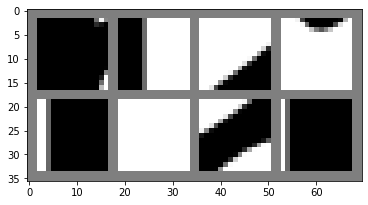


96 AJensonPro-Capt smallS


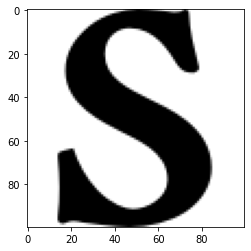


(true_class == predicted_class).item()=True
smallS 0.5262883305549622
smallS 0.5262883305549622


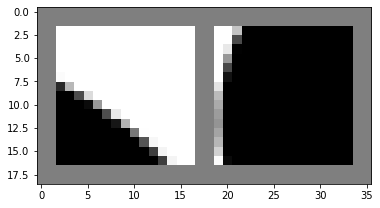


(true_class == predicted_class).item()=False
smallS 0.4753853678703308
capS 0.5238893032073975


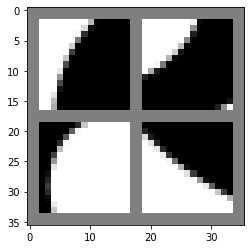


(true_class == predicted_class).item()=True
smallS 0.6245644092559814
smallS 0.6245644092559814


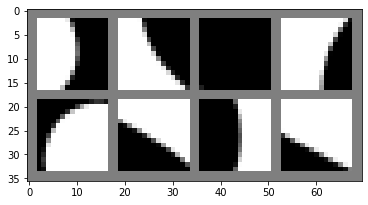


97 AJensonPro-Capt smallT


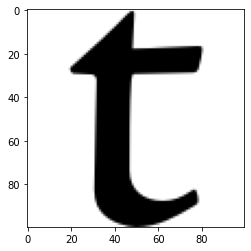


(true_class == predicted_class).item()=True
smallT 0.9536181688308716
smallT 0.9536181688308716


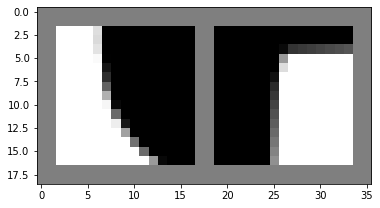


(true_class == predicted_class).item()=True
smallT 0.9916453957557678
smallT 0.9916453957557678


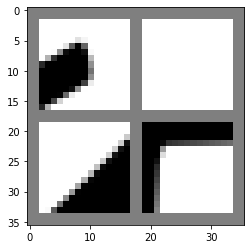


(true_class == predicted_class).item()=True
smallT 0.9999791383743286
smallT 0.9999791383743286


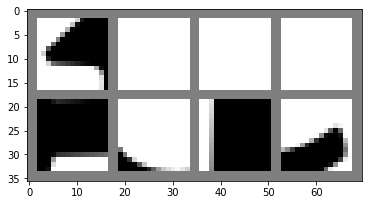


98 AJensonPro-Capt smallU


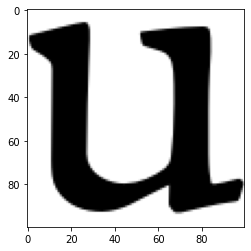


(true_class == predicted_class).item()=True
smallU 0.9034038782119751
smallU 0.9034038782119751


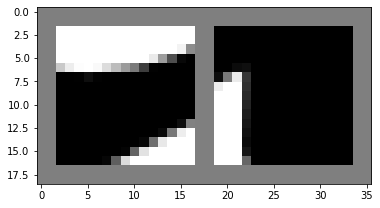


(true_class == predicted_class).item()=True
smallU 0.9432535767555237
smallU 0.9432535767555237


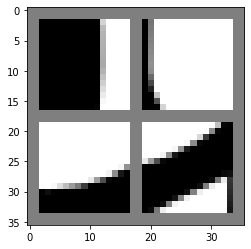


(true_class == predicted_class).item()=True
smallU 0.993055522441864
smallU 0.993055522441864


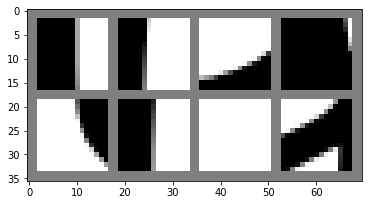


99 AJensonPro-Capt smallV


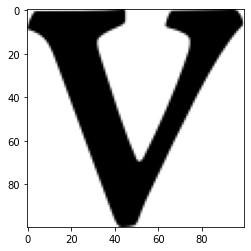


(true_class == predicted_class).item()=True
smallV 0.526714026927948
smallV 0.526714026927948


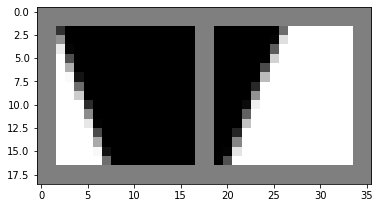


(true_class == predicted_class).item()=True
smallV 0.8601762056350708
smallV 0.8601762056350708


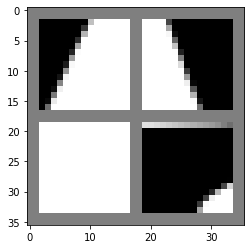


(true_class == predicted_class).item()=True
smallV 0.787298858165741
smallV 0.787298858165741


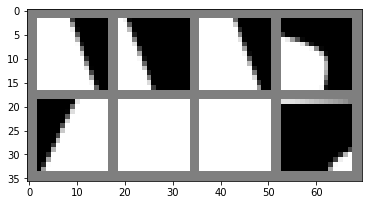


100 AJensonPro-Capt smallW


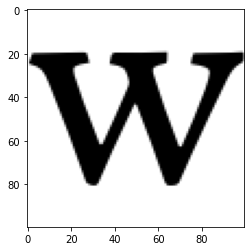


(true_class == predicted_class).item()=True
smallW 0.7861958146095276
smallW 0.7861958146095276


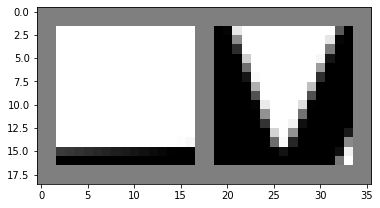


(true_class == predicted_class).item()=True
smallW 0.5622314810752869
smallW 0.5622314810752869


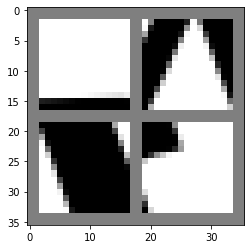


(true_class == predicted_class).item()=True
smallW 0.854938268661499
smallW 0.854938268661499


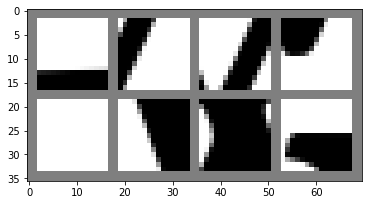


101 AJensonPro-Capt smallX


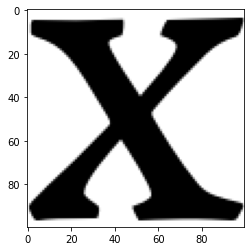


(true_class == predicted_class).item()=True
smallX 0.5406240820884705
smallX 0.5406240820884705


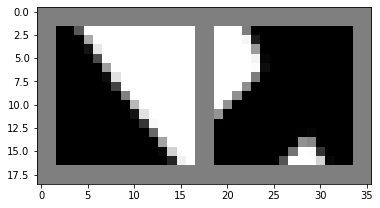


(true_class == predicted_class).item()=False
smallX 0.45036134123802185
capX 0.5477038025856018


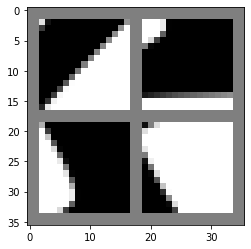


(true_class == predicted_class).item()=True
smallX 0.5666791200637817
smallX 0.5666791200637817


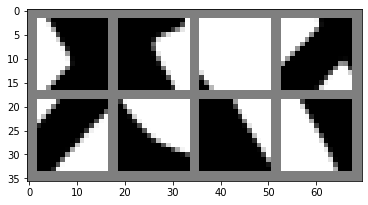


102 AJensonPro-Capt smallY


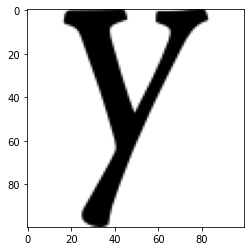


(true_class == predicted_class).item()=True
smallY 0.9770475625991821
smallY 0.9770475625991821


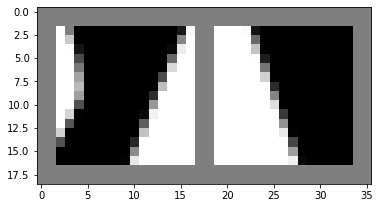


(true_class == predicted_class).item()=False
smallY 0.33055081963539124
smallV 0.36643150448799133


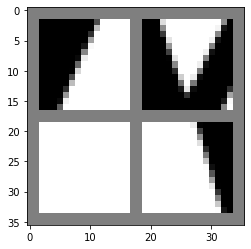


(true_class == predicted_class).item()=True
smallY 0.9993950128555298
smallY 0.9993950128555298


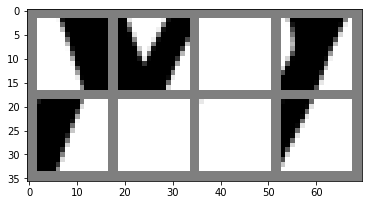


103 AJensonPro-Capt smallZ


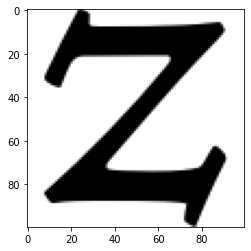


(true_class == predicted_class).item()=True
smallZ 0.5345328450202942
smallZ 0.5345328450202942


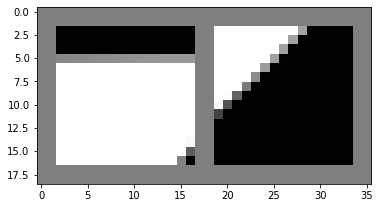


(true_class == predicted_class).item()=True
smallZ 0.8096636533737183
smallZ 0.8096636533737183


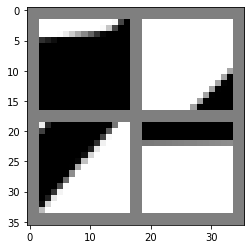


(true_class == predicted_class).item()=True
smallZ 0.7819404602050781
smallZ 0.7819404602050781


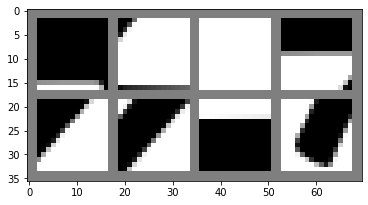


104 AJensonPro-Disp capA


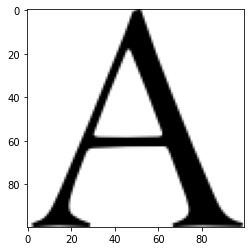


(true_class == predicted_class).item()=True
capA 0.9981302618980408
capA 0.9981302618980408


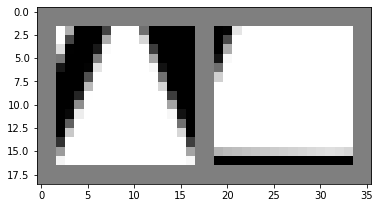


(true_class == predicted_class).item()=True
capA 0.9949620962142944
capA 0.9949620962142944


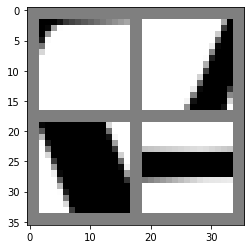


(true_class == predicted_class).item()=True
capA 0.9967045187950134
capA 0.9967045187950134


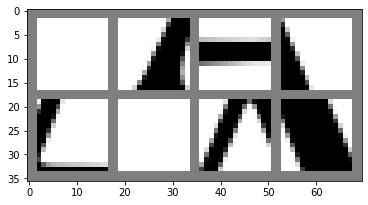


105 AJensonPro-Disp capB


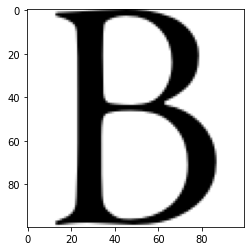


(true_class == predicted_class).item()=True
capB 0.9979454874992371
capB 0.9979454874992371


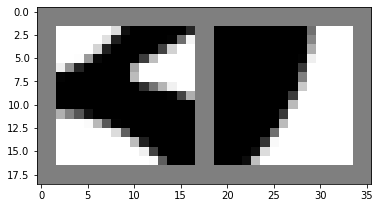


(true_class == predicted_class).item()=True
capB 0.9927389025688171
capB 0.9927389025688171


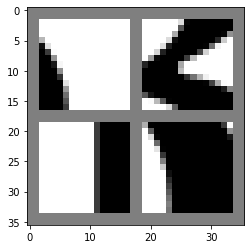


(true_class == predicted_class).item()=True
capB 0.9787063002586365
capB 0.9787063002586365


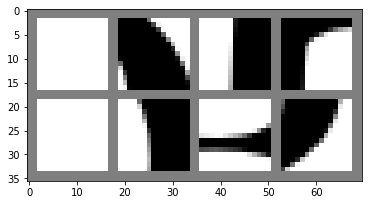


106 AJensonPro-Disp capC


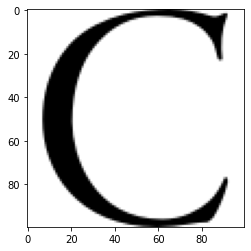


(true_class == predicted_class).item()=True
capC 0.587848961353302
capC 0.587848961353302


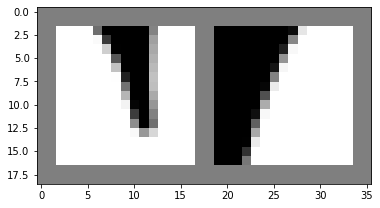


(true_class == predicted_class).item()=True
capC 0.8472056984901428
capC 0.8472056984901428


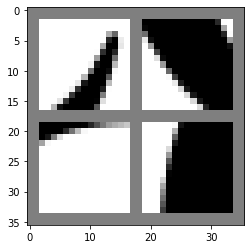


(true_class == predicted_class).item()=True
capC 0.9959465861320496
capC 0.9959465861320496


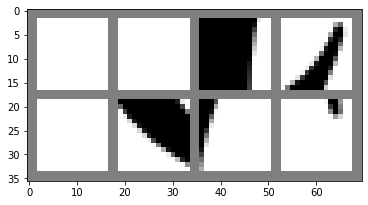


107 AJensonPro-Disp capD


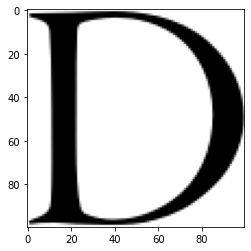


(true_class == predicted_class).item()=True
capD 0.7553884387016296
capD 0.7553884387016296


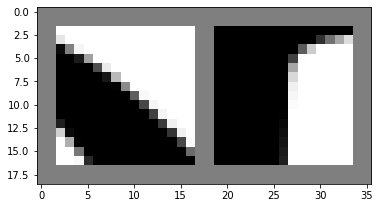


(true_class == predicted_class).item()=True
capD 0.9532696604728699
capD 0.9532696604728699


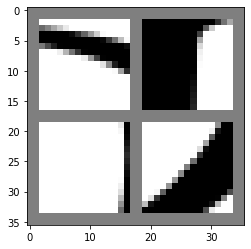


(true_class == predicted_class).item()=True
capD 0.9955075979232788
capD 0.9955075979232788


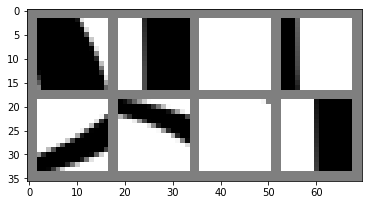


108 AJensonPro-Disp capE


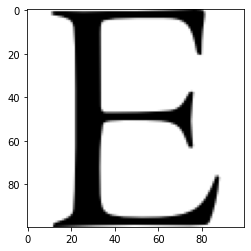


(true_class == predicted_class).item()=True
capE 0.6123865246772766
capE 0.6123865246772766


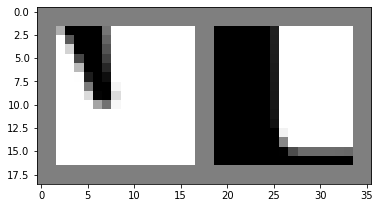


(true_class == predicted_class).item()=True
capE 0.8795175552368164
capE 0.8795175552368164


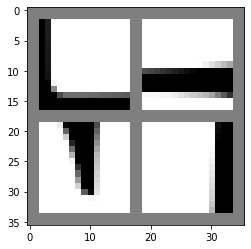


(true_class == predicted_class).item()=True
capE 0.9942767024040222
capE 0.9942767024040222


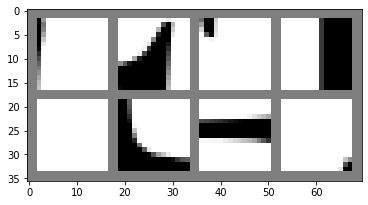


109 AJensonPro-Disp capF


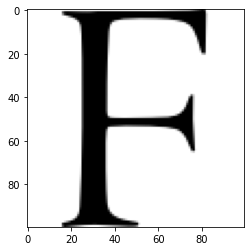


(true_class == predicted_class).item()=False
capF 0.31553637981414795
capE 0.6820755004882812


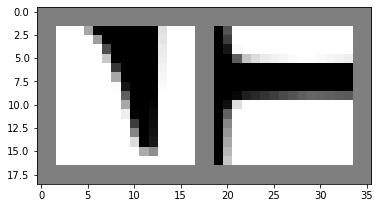


(true_class == predicted_class).item()=False
capF 0.2754170596599579
capE 0.7243343591690063


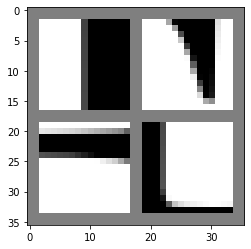


(true_class == predicted_class).item()=True
capF 0.5928940773010254
capF 0.5928940773010254


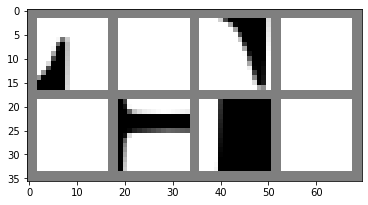


110 AJensonPro-Disp capG


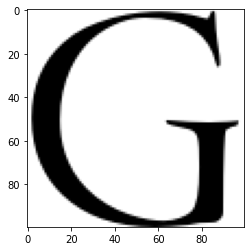


(true_class == predicted_class).item()=True
capG 0.9954943656921387
capG 0.9954943656921387


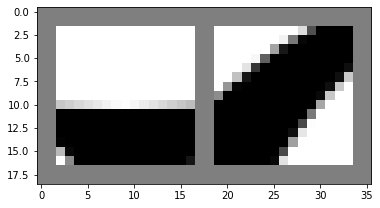


(true_class == predicted_class).item()=True
capG 0.9997984766960144
capG 0.9997984766960144


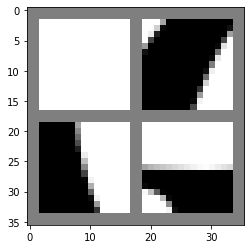


(true_class == predicted_class).item()=True
capG 0.9998409748077393
capG 0.9998409748077393


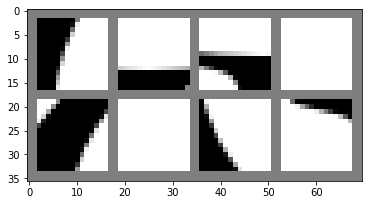


111 AJensonPro-Disp capH


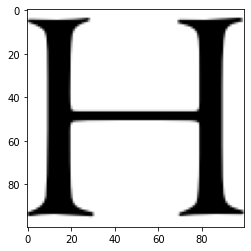


(true_class == predicted_class).item()=False
capH 0.36483311653137207
capE 0.41584229469299316


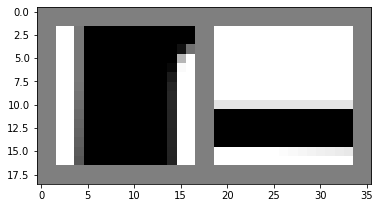


(true_class == predicted_class).item()=True
capH 0.9989476799964905
capH 0.9989476799964905


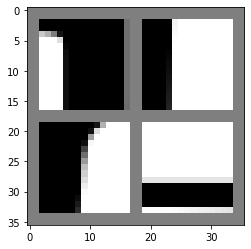


(true_class == predicted_class).item()=True
capH 0.9915220737457275
capH 0.9915220737457275


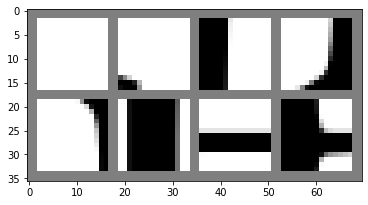


112 AJensonPro-Disp capI


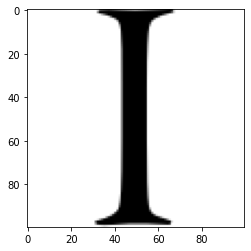


(true_class == predicted_class).item()=True
capI 0.18575847148895264
capI 0.18575847148895264


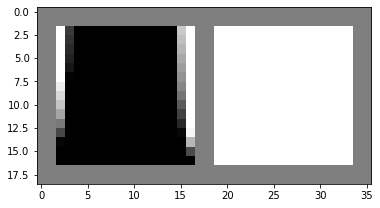


(true_class == predicted_class).item()=True
capI 0.3981691896915436
capI 0.3981691896915436


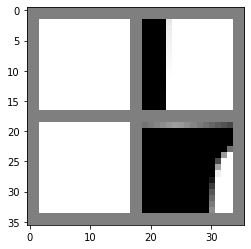


(true_class == predicted_class).item()=False
capI 0.4204062521457672
smallL 0.5360665321350098


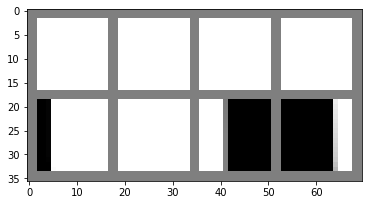


113 AJensonPro-Disp capJ


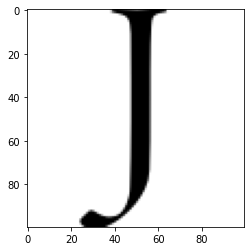


(true_class == predicted_class).item()=True
capJ 0.395683228969574
capJ 0.395683228969574


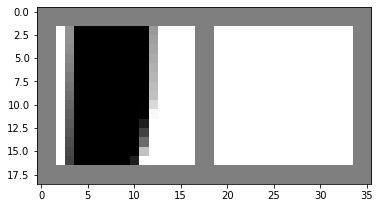


(true_class == predicted_class).item()=True
capJ 0.5313044190406799
capJ 0.5313044190406799


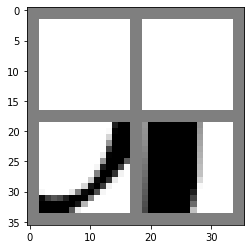


(true_class == predicted_class).item()=True
capJ 0.987709641456604
capJ 0.987709641456604


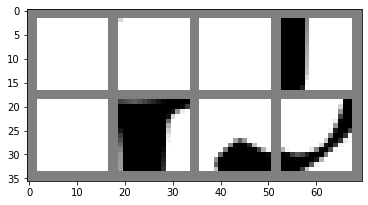


114 AJensonPro-Disp capK


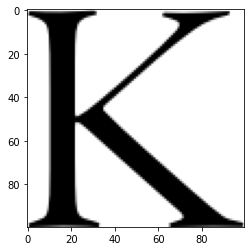


(true_class == predicted_class).item()=True
capK 0.8006171584129333
capK 0.8006171584129333


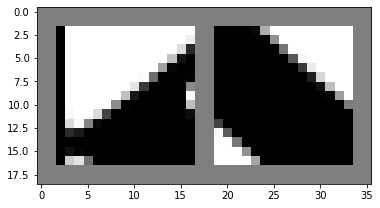


(true_class == predicted_class).item()=True
capK 0.997244119644165
capK 0.997244119644165


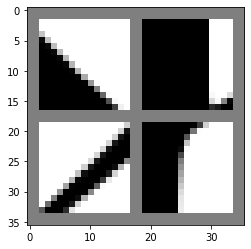


(true_class == predicted_class).item()=True
capK 0.9236626625061035
capK 0.9236626625061035


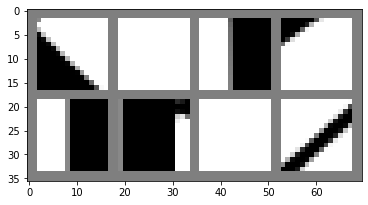


115 AJensonPro-Disp capL


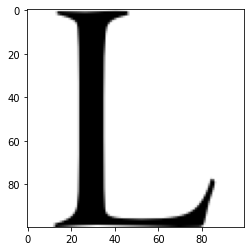


(true_class == predicted_class).item()=False
capL 0.2538098692893982
capE 0.7023153305053711


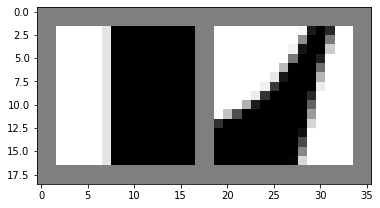


(true_class == predicted_class).item()=True
capL 0.9211459159851074
capL 0.9211459159851074


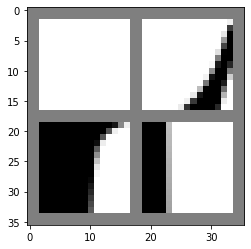


(true_class == predicted_class).item()=True
capL 0.9968422651290894
capL 0.9968422651290894


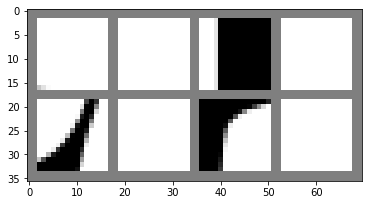


116 AJensonPro-Disp capM


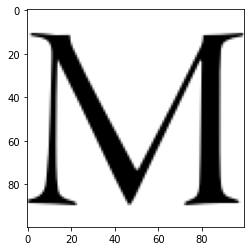


(true_class == predicted_class).item()=True
capM 0.9997082352638245
capM 0.9997082352638245


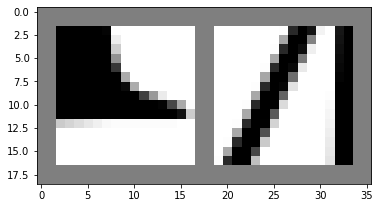


(true_class == predicted_class).item()=True
capM 0.9998760223388672
capM 0.9998760223388672


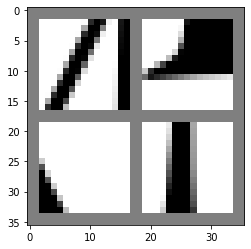


(true_class == predicted_class).item()=True
capM 0.9992089867591858
capM 0.9992089867591858


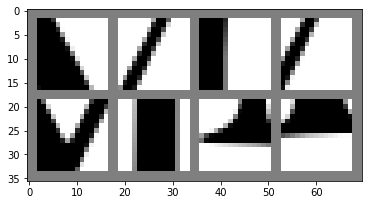


117 AJensonPro-Disp capN


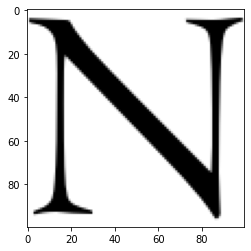


(true_class == predicted_class).item()=True
capN 0.9625399708747864
capN 0.9625399708747864


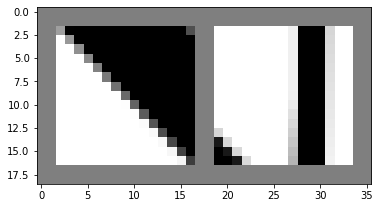


(true_class == predicted_class).item()=True
capN 0.9933318495750427
capN 0.9933318495750427


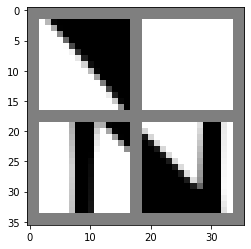


(true_class == predicted_class).item()=True
capN 0.9899721145629883
capN 0.9899721145629883


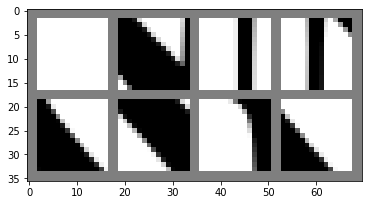


118 AJensonPro-Disp capO


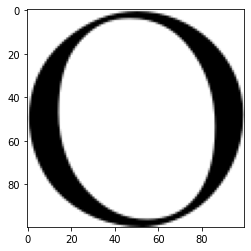


(true_class == predicted_class).item()=True
capO 0.34286239743232727
capO 0.34286239743232727


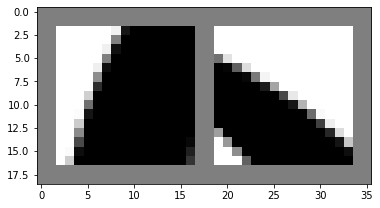


(true_class == predicted_class).item()=True
capO 0.6927393078804016
capO 0.6927393078804016


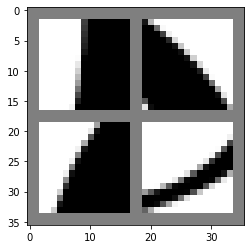


(true_class == predicted_class).item()=True
capO 0.7731813788414001
capO 0.7731813788414001


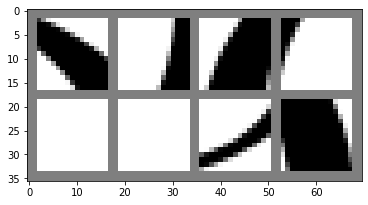


119 AJensonPro-Disp capP


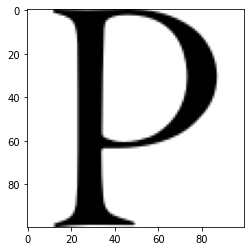


(true_class == predicted_class).item()=False
capP 0.31171977519989014
smallP 0.6875723004341125


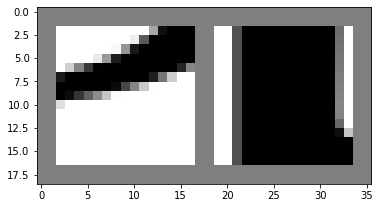


(true_class == predicted_class).item()=True
capP 0.5638759136199951
capP 0.5638759136199951


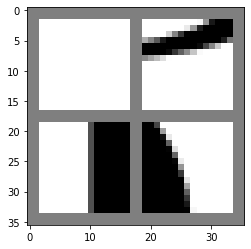


(true_class == predicted_class).item()=True
capP 0.6959887146949768
capP 0.6959887146949768


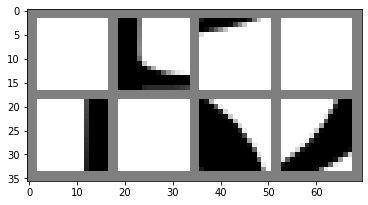


120 AJensonPro-Disp capQ


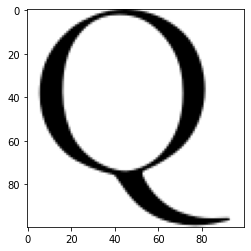


(true_class == predicted_class).item()=True
capQ 0.9224391579627991
capQ 0.9224391579627991


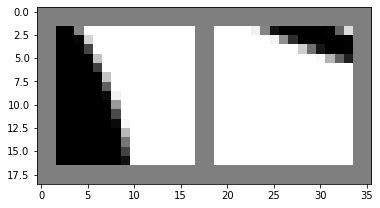


(true_class == predicted_class).item()=True
capQ 0.9877606630325317
capQ 0.9877606630325317


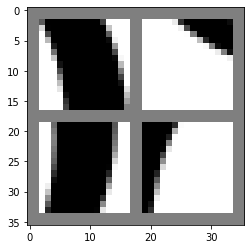


(true_class == predicted_class).item()=True
capQ 0.996220052242279
capQ 0.996220052242279


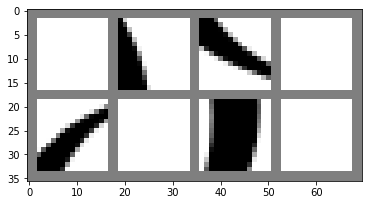


121 AJensonPro-Disp capR


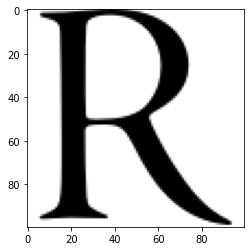


(true_class == predicted_class).item()=True
capR 0.8158091306686401
capR 0.8158091306686401


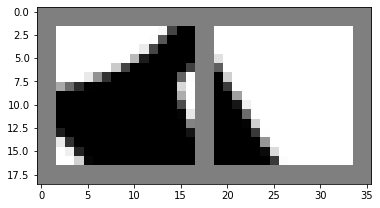


(true_class == predicted_class).item()=True
capR 0.9928131699562073
capR 0.9928131699562073


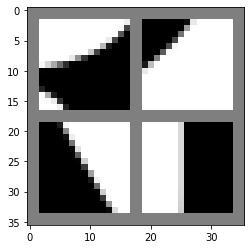


(true_class == predicted_class).item()=True
capR 0.9870540499687195
capR 0.9870540499687195


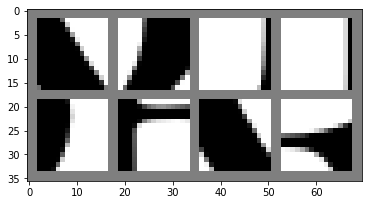


122 AJensonPro-Disp capS


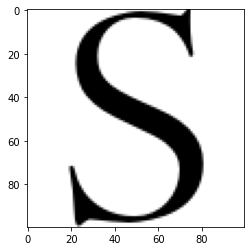


(true_class == predicted_class).item()=True
capS 0.5886625051498413
capS 0.5886625051498413


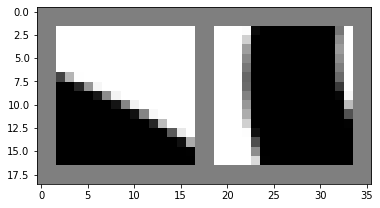


(true_class == predicted_class).item()=True
capS 0.575444221496582
capS 0.575444221496582


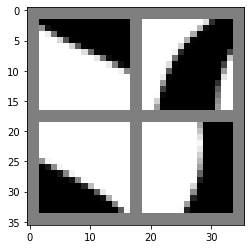


(true_class == predicted_class).item()=True
capS 0.8016331195831299
capS 0.8016331195831299


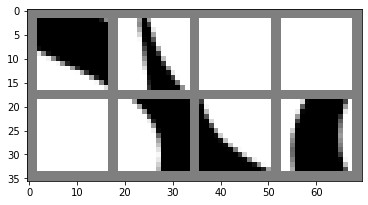


123 AJensonPro-Disp capT


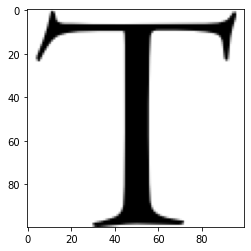


(true_class == predicted_class).item()=False
capT 0.08394364267587662
capF 0.5435824394226074


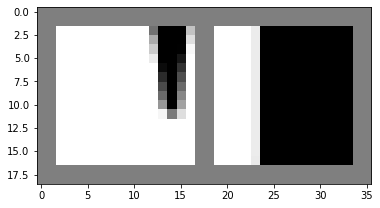


(true_class == predicted_class).item()=True
capT 0.9700304269790649
capT 0.9700304269790649


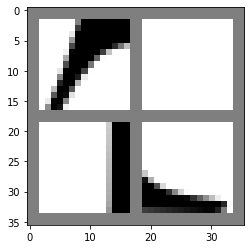


(true_class == predicted_class).item()=True
capT 0.9996463060379028
capT 0.9996463060379028


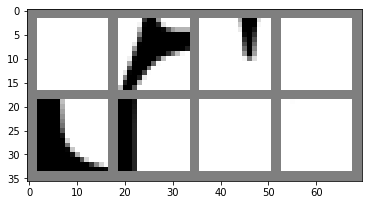


124 AJensonPro-Disp capU


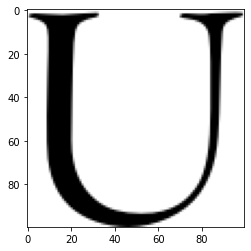


(true_class == predicted_class).item()=True
capU 0.9912590384483337
capU 0.9912590384483337


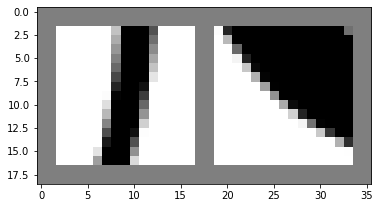


(true_class == predicted_class).item()=True
capU 0.9976032376289368
capU 0.9976032376289368


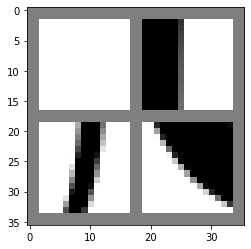


(true_class == predicted_class).item()=True
capU 0.9992836117744446
capU 0.9992836117744446


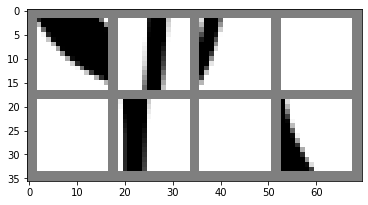


125 AJensonPro-Disp capV


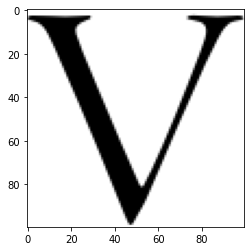


(true_class == predicted_class).item()=True
capV 0.35183945298194885
capV 0.35183945298194885


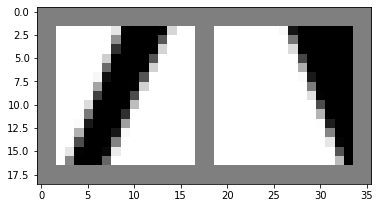


(true_class == predicted_class).item()=True
capV 0.5970057845115662
capV 0.5970057845115662


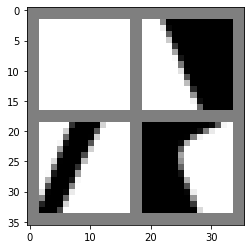


(true_class == predicted_class).item()=True
capV 0.6046075224876404
capV 0.6046075224876404


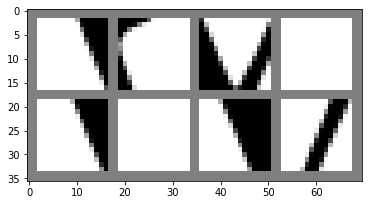


126 AJensonPro-Disp capW


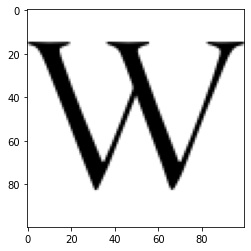


(true_class == predicted_class).item()=True
capW 0.9398287534713745
capW 0.9398287534713745


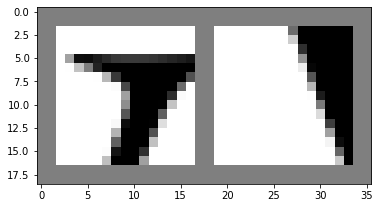


(true_class == predicted_class).item()=True
capW 0.9078380465507507
capW 0.9078380465507507


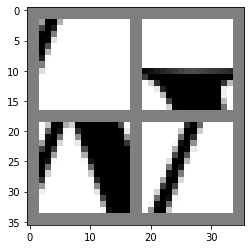


(true_class == predicted_class).item()=True
capW 0.8748563528060913
capW 0.8748563528060913


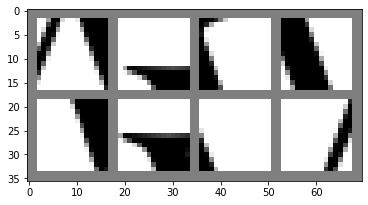


127 AJensonPro-Disp capX


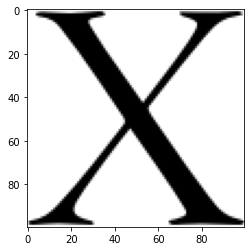


(true_class == predicted_class).item()=True
capX 0.9013859629631042
capX 0.9013859629631042


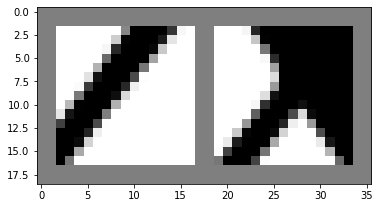


(true_class == predicted_class).item()=True
capX 0.968275785446167
capX 0.968275785446167


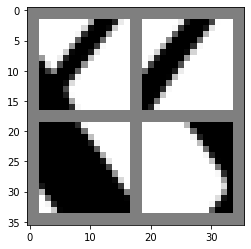


(true_class == predicted_class).item()=True
capX 0.9737865328788757
capX 0.9737865328788757


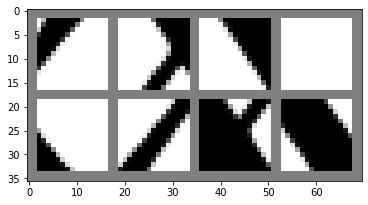


128 AJensonPro-Disp capY


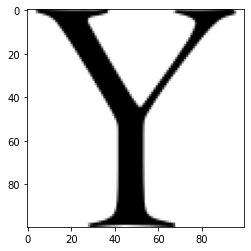


(true_class == predicted_class).item()=True
capY 0.9392789006233215
capY 0.9392789006233215


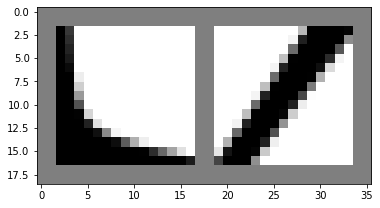


(true_class == predicted_class).item()=True
capY 0.9517301917076111
capY 0.9517301917076111


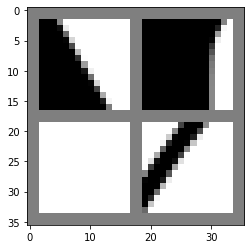


(true_class == predicted_class).item()=True
capY 0.9995504021644592
capY 0.9995504021644592


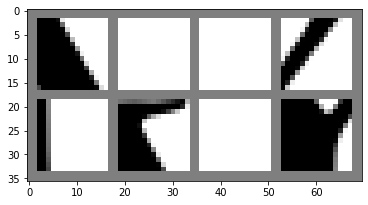


129 AJensonPro-Disp capZ


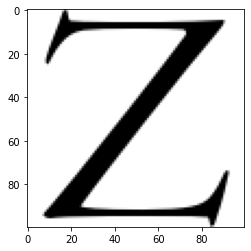


(true_class == predicted_class).item()=True
capZ 0.7483115792274475
capZ 0.7483115792274475


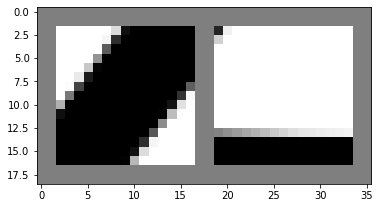


(true_class == predicted_class).item()=True
capZ 0.7256782650947571
capZ 0.7256782650947571


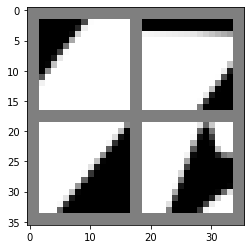


(true_class == predicted_class).item()=True
capZ 0.9079805612564087
capZ 0.9079805612564087


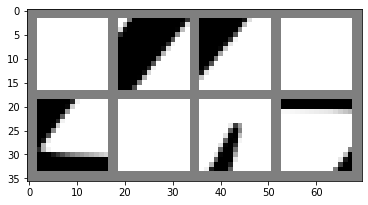


130 AJensonPro-Disp smallA


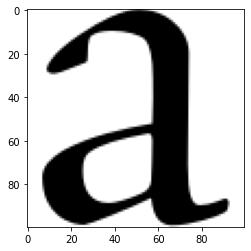


(true_class == predicted_class).item()=True
smallA 0.9859619736671448
smallA 0.9859619736671448


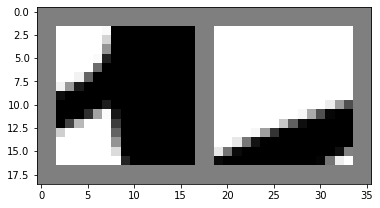


(true_class == predicted_class).item()=True
smallA 0.9999744892120361
smallA 0.9999744892120361


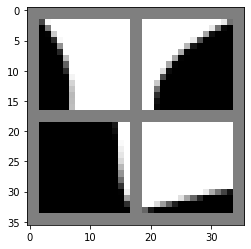


(true_class == predicted_class).item()=True
smallA 0.9997010231018066
smallA 0.9997010231018066


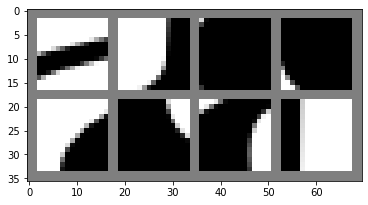


131 AJensonPro-Disp smallB


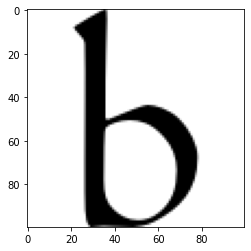


(true_class == predicted_class).item()=True
smallB 0.7004460692405701
smallB 0.7004460692405701


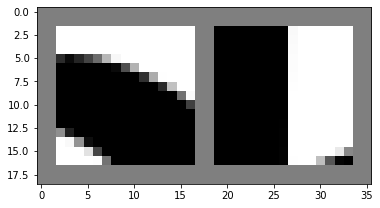


(true_class == predicted_class).item()=True
smallB 0.98558109998703
smallB 0.98558109998703


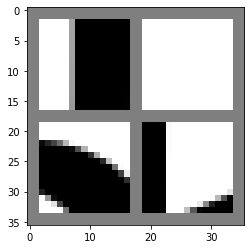


(true_class == predicted_class).item()=True
smallB 0.999441921710968
smallB 0.999441921710968


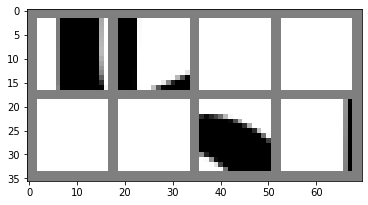


132 AJensonPro-Disp smallC


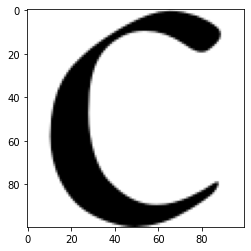


(true_class == predicted_class).item()=False
smallC 0.1834435611963272
capC 0.29158544540405273


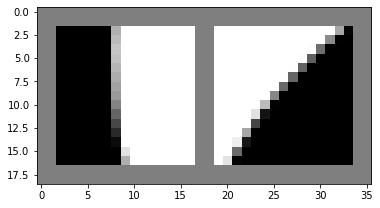


(true_class == predicted_class).item()=True
smallC 0.9741852879524231
smallC 0.9741852879524231


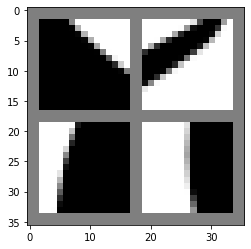


(true_class == predicted_class).item()=True
smallC 0.9081333875656128
smallC 0.9081333875656128


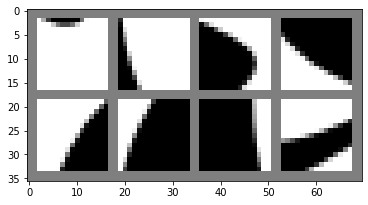


133 AJensonPro-Disp smallD


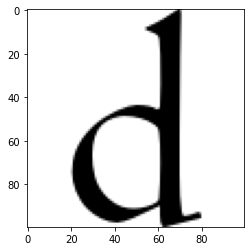


(true_class == predicted_class).item()=True
smallD 0.9992254972457886
smallD 0.9992254972457886


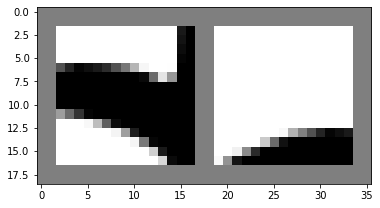


(true_class == predicted_class).item()=True
smallD 0.9999454021453857
smallD 0.9999454021453857


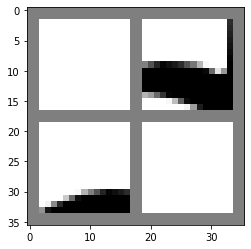


(true_class == predicted_class).item()=True
smallD 0.9999786615371704
smallD 0.9999786615371704


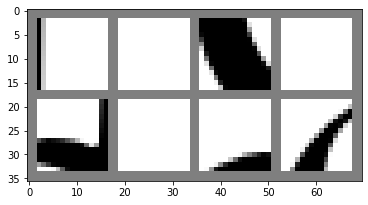


134 AJensonPro-Disp smallE


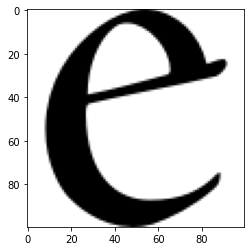


(true_class == predicted_class).item()=True
smallE 0.9987903237342834
smallE 0.9987903237342834


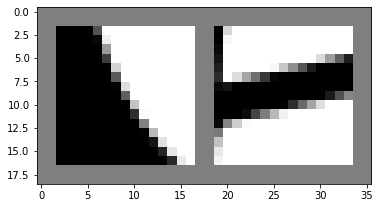


(true_class == predicted_class).item()=True
smallE 0.9999017715454102
smallE 0.9999017715454102


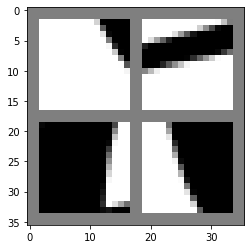


(true_class == predicted_class).item()=True
smallE 0.9999986886978149
smallE 0.9999986886978149


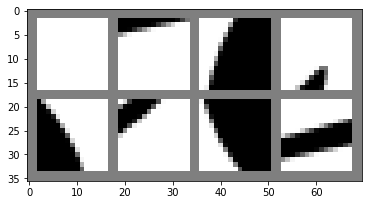


135 AJensonPro-Disp smallF


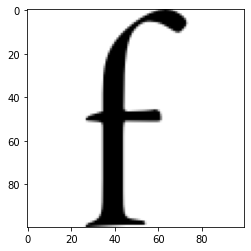


(true_class == predicted_class).item()=True
smallF 0.9870142936706543
smallF 0.9870142936706543


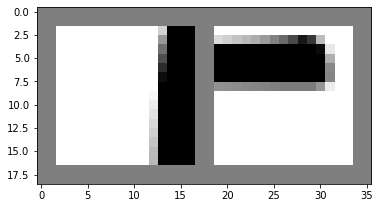


(true_class == predicted_class).item()=True
smallF 0.9995730519294739
smallF 0.9995730519294739


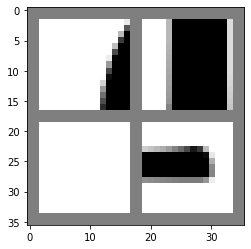


(true_class == predicted_class).item()=True
smallF 0.9999207258224487
smallF 0.9999207258224487


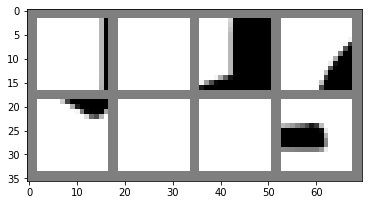


136 AJensonPro-Disp smallG


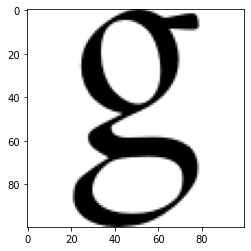


(true_class == predicted_class).item()=True
smallG 0.9985955357551575
smallG 0.9985955357551575


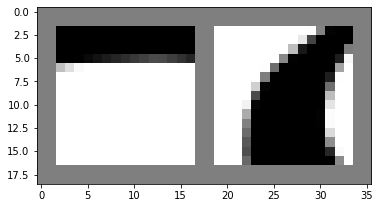


(true_class == predicted_class).item()=True
smallG 0.9996715784072876
smallG 0.9996715784072876


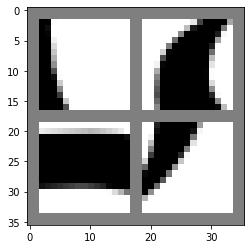


(true_class == predicted_class).item()=True
smallG 0.9999924898147583
smallG 0.9999924898147583


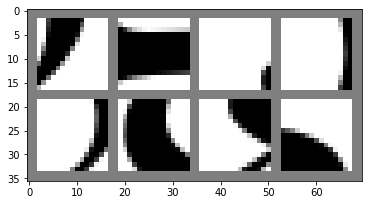


137 AJensonPro-Disp smallH


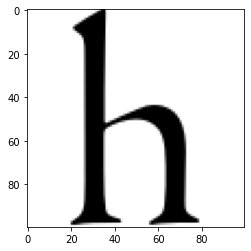


(true_class == predicted_class).item()=False
smallH 0.3981519043445587
smallM 0.48718106746673584


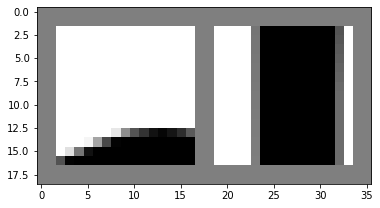


(true_class == predicted_class).item()=True
smallH 0.6540282368659973
smallH 0.6540282368659973


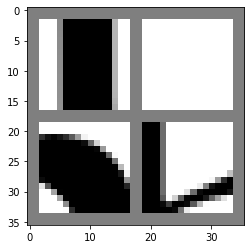


(true_class == predicted_class).item()=True
smallH 0.846575915813446
smallH 0.846575915813446


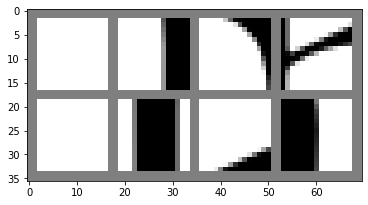


138 AJensonPro-Disp smallI


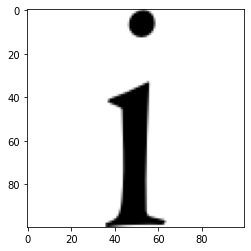


(true_class == predicted_class).item()=False
smallI 0.2476274073123932
smallJ 0.7271056771278381


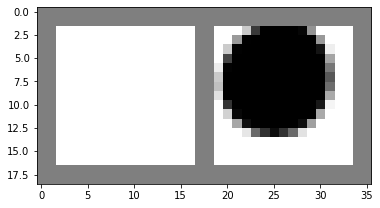


(true_class == predicted_class).item()=False
smallI 0.1988772302865982
smallJ 0.7974275946617126


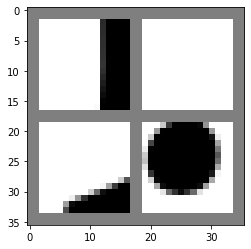


(true_class == predicted_class).item()=False
smallI 0.3583744168281555
smallJ 0.6412086486816406


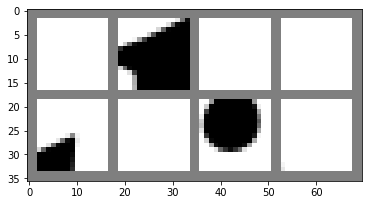


139 AJensonPro-Disp smallJ


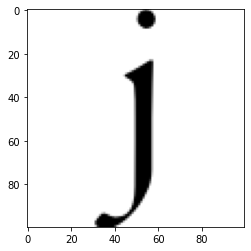


(true_class == predicted_class).item()=True
smallJ 0.8837357759475708
smallJ 0.8837357759475708


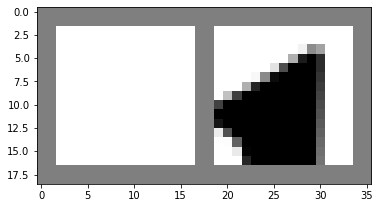


(true_class == predicted_class).item()=True
smallJ 0.925710916519165
smallJ 0.925710916519165


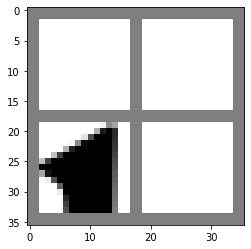


(true_class == predicted_class).item()=True
smallJ 0.9996868371963501
smallJ 0.9996868371963501


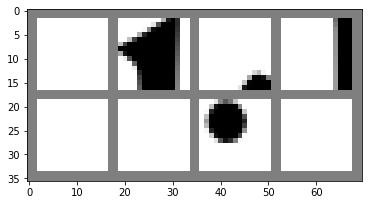


140 AJensonPro-Disp smallK


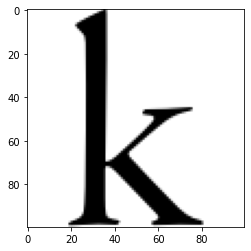


(true_class == predicted_class).item()=True
smallK 0.9256771802902222
smallK 0.9256771802902222


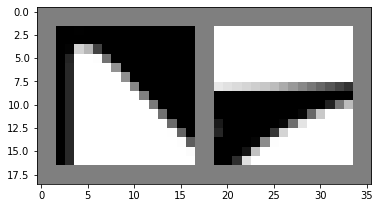


(true_class == predicted_class).item()=True
smallK 0.965364933013916
smallK 0.965364933013916


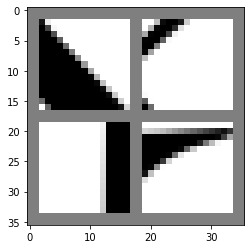


(true_class == predicted_class).item()=True
smallK 0.9986304044723511
smallK 0.9986304044723511


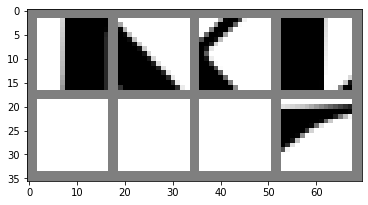


141 AJensonPro-Disp smallL


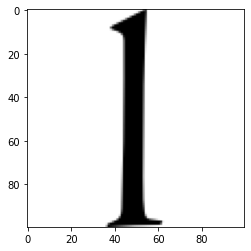


(true_class == predicted_class).item()=False
smallL 0.04579785093665123
smallD 0.2964767813682556


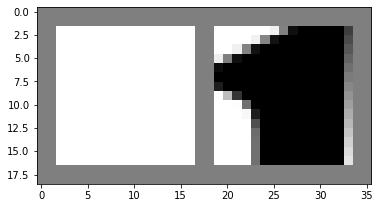


(true_class == predicted_class).item()=True
smallL 0.30718496441841125
smallL 0.30718496441841125


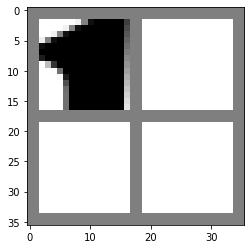


(true_class == predicted_class).item()=True
smallL 0.7338800430297852
smallL 0.7338800430297852


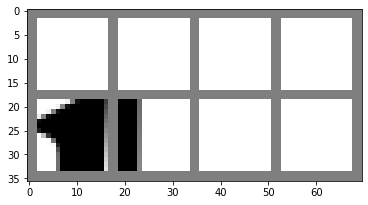


142 AJensonPro-Disp smallM


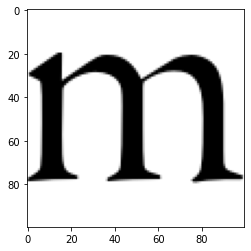


(true_class == predicted_class).item()=True
smallM 0.9961637258529663
smallM 0.9961637258529663


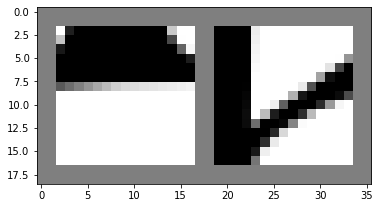


(true_class == predicted_class).item()=True
smallM 0.9998118281364441
smallM 0.9998118281364441


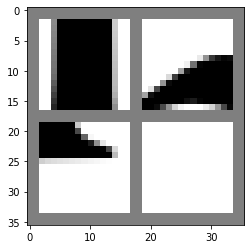


(true_class == predicted_class).item()=True
smallM 0.9998705387115479
smallM 0.9998705387115479


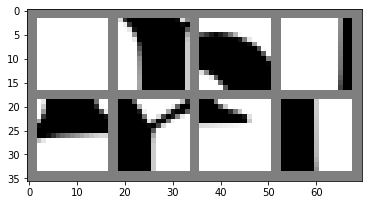


143 AJensonPro-Disp smallN


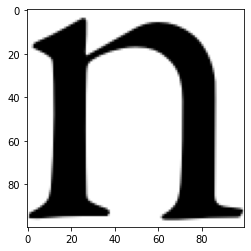


(true_class == predicted_class).item()=False
smallN 0.09307727962732315
smallB 0.5786824822425842


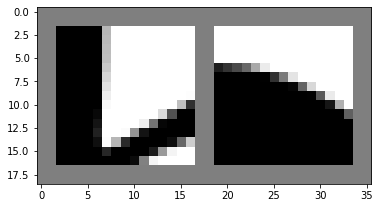


(true_class == predicted_class).item()=True
smallN 0.9984188079833984
smallN 0.9984188079833984


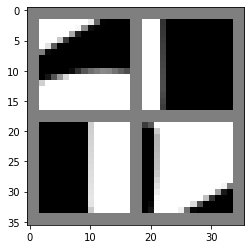


(true_class == predicted_class).item()=True
smallN 0.9997256398200989
smallN 0.9997256398200989


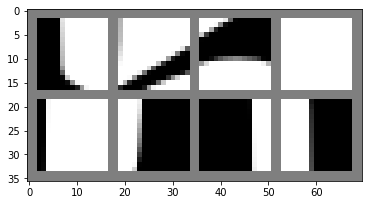


144 AJensonPro-Disp smallO


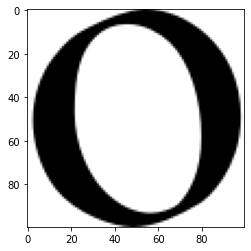


(true_class == predicted_class).item()=False
smallO 0.39676952362060547
capO 0.418284147977829


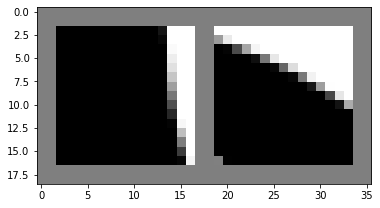


(true_class == predicted_class).item()=True
smallO 0.5239739418029785
smallO 0.5239739418029785


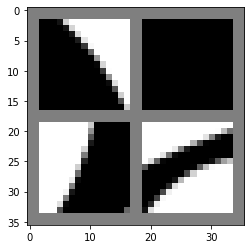


(true_class == predicted_class).item()=True
smallO 0.7358693480491638
smallO 0.7358693480491638


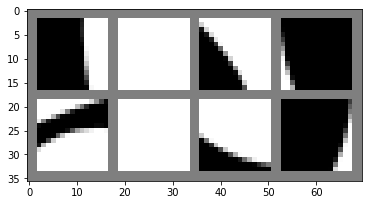


145 AJensonPro-Disp smallP


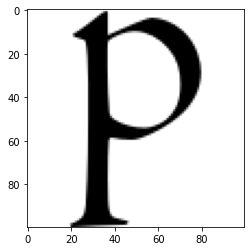


(true_class == predicted_class).item()=True
smallP 0.6951109170913696
smallP 0.6951109170913696


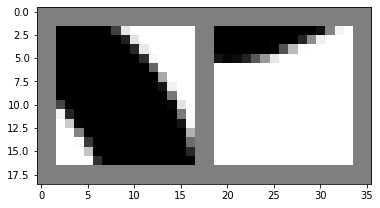


(true_class == predicted_class).item()=True
smallP 0.9183639287948608
smallP 0.9183639287948608


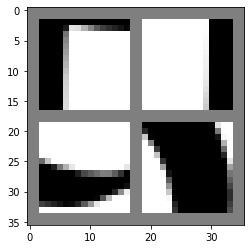


(true_class == predicted_class).item()=True
smallP 0.913953423500061
smallP 0.913953423500061


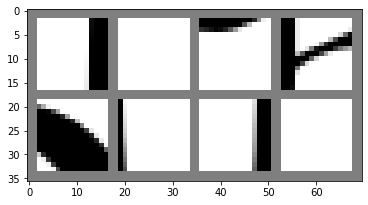


146 AJensonPro-Disp smallQ


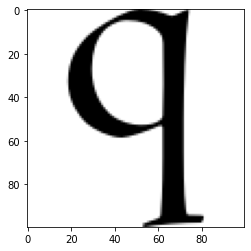


(true_class == predicted_class).item()=True
smallQ 0.9297192096710205
smallQ 0.9297192096710205


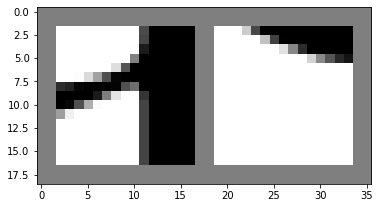


(true_class == predicted_class).item()=True
smallQ 0.8838827013969421
smallQ 0.8838827013969421


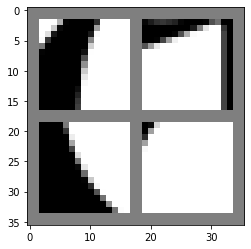


(true_class == predicted_class).item()=True
smallQ 0.9962618947029114
smallQ 0.9962618947029114


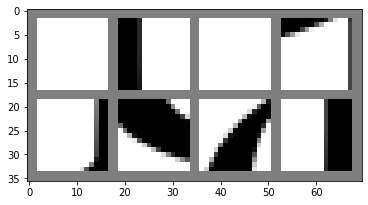


147 AJensonPro-Disp smallR


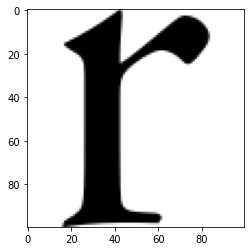


(true_class == predicted_class).item()=False
smallR 0.04455414041876793
smallH 0.3640626072883606


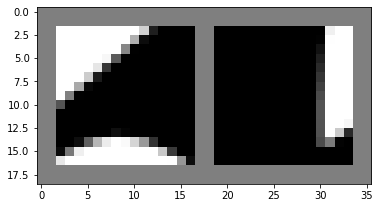


(true_class == predicted_class).item()=True
smallR 0.6559542417526245
smallR 0.6559542417526245


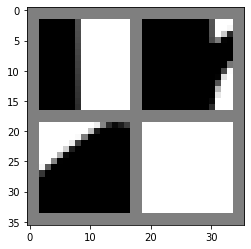


(true_class == predicted_class).item()=True
smallR 0.9949901700019836
smallR 0.9949901700019836


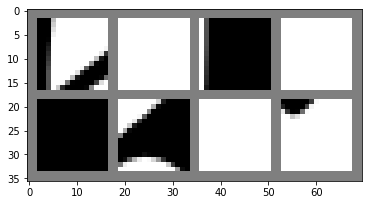


148 AJensonPro-Disp smallS


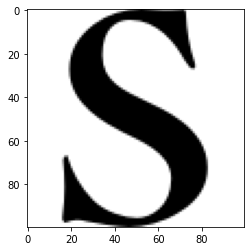


(true_class == predicted_class).item()=False
smallS 0.43269070982933044
capS 0.5522515177726746


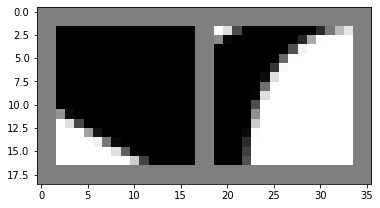


(true_class == predicted_class).item()=True
smallS 0.5671374201774597
smallS 0.5671374201774597


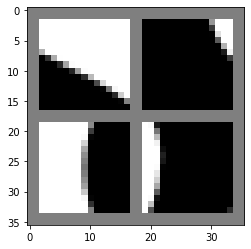


(true_class == predicted_class).item()=True
smallS 0.6142769455909729
smallS 0.6142769455909729


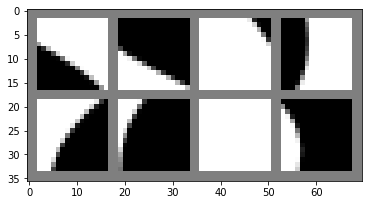


149 AJensonPro-Disp smallT


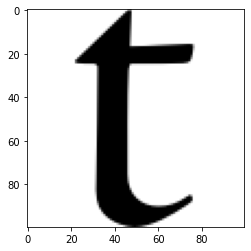


(true_class == predicted_class).item()=True
smallT 0.9397572875022888
smallT 0.9397572875022888


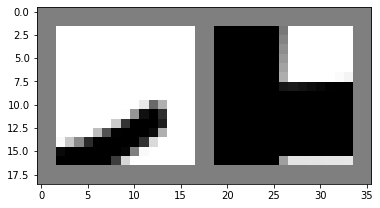


(true_class == predicted_class).item()=True
smallT 0.999908447265625
smallT 0.999908447265625


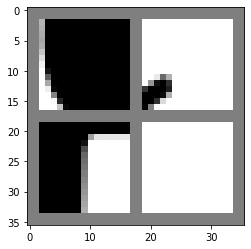


(true_class == predicted_class).item()=True
smallT 0.9999953508377075
smallT 0.9999953508377075


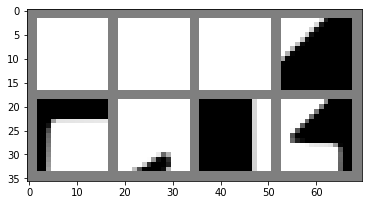


150 AJensonPro-Disp smallU


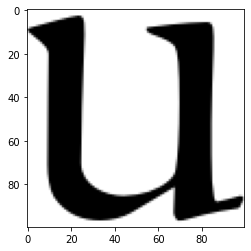


(true_class == predicted_class).item()=True
smallU 0.7640934586524963
smallU 0.7640934586524963


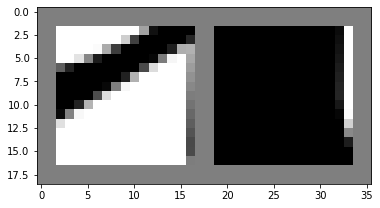


(true_class == predicted_class).item()=True
smallU 0.9743722081184387
smallU 0.9743722081184387


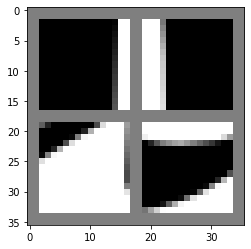


(true_class == predicted_class).item()=True
smallU 0.9967558979988098
smallU 0.9967558979988098


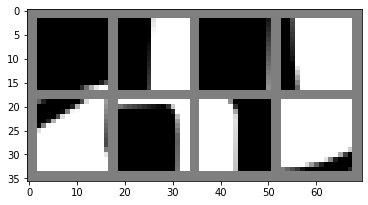


151 AJensonPro-Disp smallV


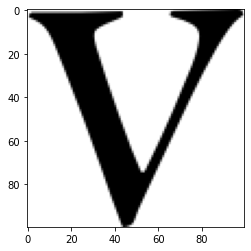


(true_class == predicted_class).item()=True
smallV 0.5488666296005249
smallV 0.5488666296005249


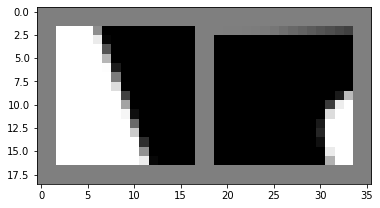


(true_class == predicted_class).item()=True
smallV 0.7561952471733093
smallV 0.7561952471733093


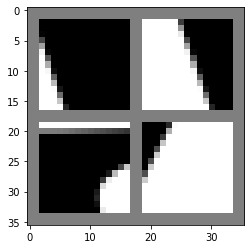


(true_class == predicted_class).item()=True
smallV 0.6952345371246338
smallV 0.6952345371246338


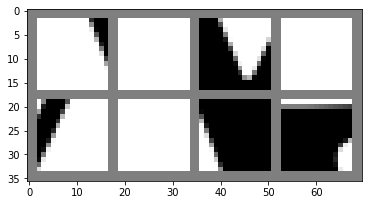


152 AJensonPro-Disp smallW


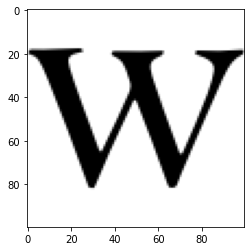


(true_class == predicted_class).item()=False
smallW 0.37937864661216736
capW 0.6092348098754883


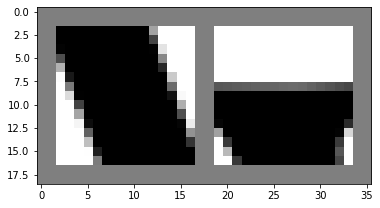


(true_class == predicted_class).item()=False
smallW 0.46310892701148987
capW 0.5366576313972473


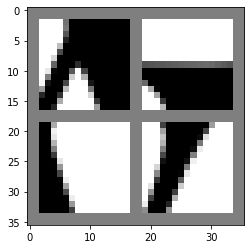


(true_class == predicted_class).item()=False
smallW 0.4693971872329712
capW 0.5297856330871582


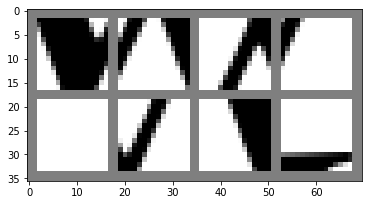


153 AJensonPro-Disp smallX


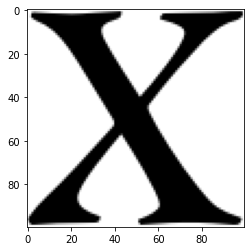


(true_class == predicted_class).item()=True
smallX 0.5163097381591797
smallX 0.5163097381591797


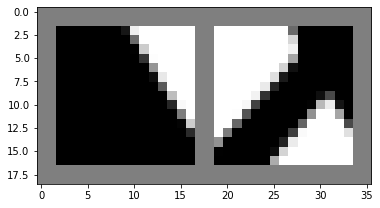


(true_class == predicted_class).item()=False
smallX 0.3283222019672394
capX 0.670526921749115


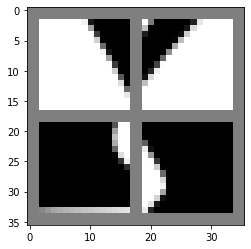


(true_class == predicted_class).item()=True
smallX 0.637424886226654
smallX 0.637424886226654


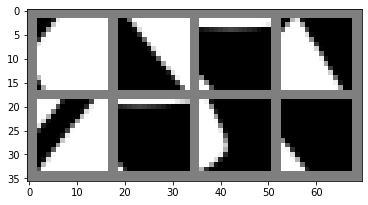


154 AJensonPro-Disp smallY


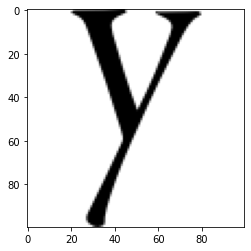


(true_class == predicted_class).item()=True
smallY 0.9587767124176025
smallY 0.9587767124176025


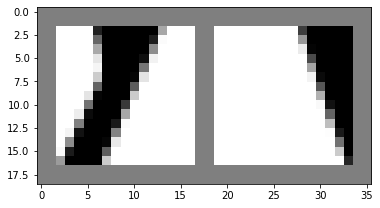


(true_class == predicted_class).item()=True
smallY 0.9936456680297852
smallY 0.9936456680297852


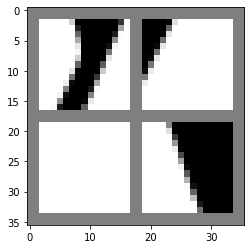


(true_class == predicted_class).item()=True
smallY 0.9999122619628906
smallY 0.9999122619628906


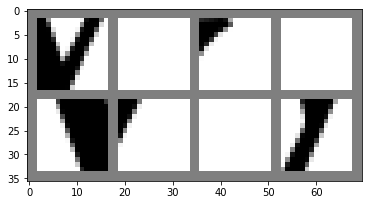


155 AJensonPro-Disp smallZ


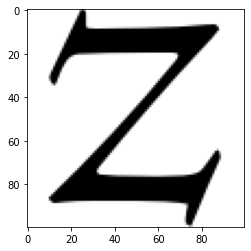


(true_class == predicted_class).item()=False
smallZ 0.4969475567340851
capZ 0.5018329620361328


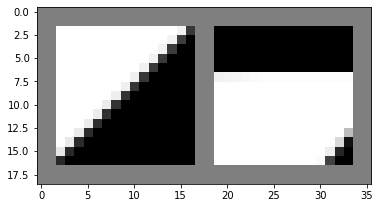


(true_class == predicted_class).item()=True
smallZ 0.8271806240081787
smallZ 0.8271806240081787


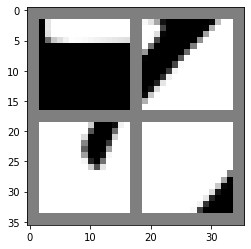


(true_class == predicted_class).item()=True
smallZ 0.899163544178009
smallZ 0.899163544178009


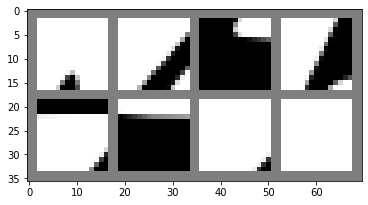


156 AJensonPro-ItDisp capA


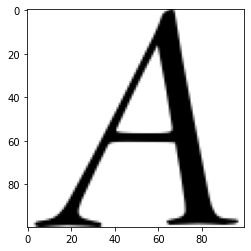


(true_class == predicted_class).item()=True
capA 0.9996404647827148
capA 0.9996404647827148


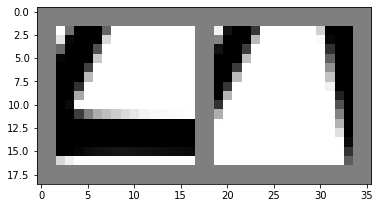


(true_class == predicted_class).item()=True
capA 0.9977508187294006
capA 0.9977508187294006


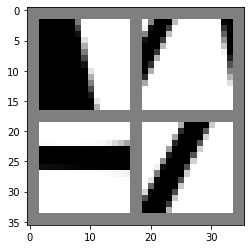


(true_class == predicted_class).item()=True
capA 0.9998238682746887
capA 0.9998238682746887


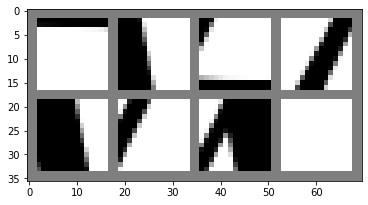


157 AJensonPro-ItDisp capB


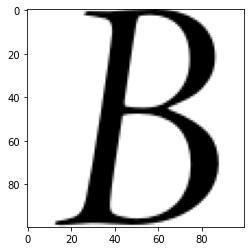


(true_class == predicted_class).item()=True
capB 0.8962665796279907
capB 0.8962665796279907


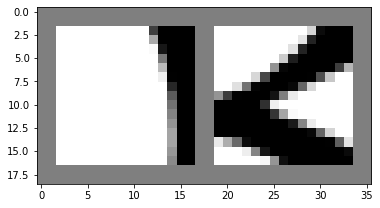


(true_class == predicted_class).item()=True
capB 0.9945084452629089
capB 0.9945084452629089


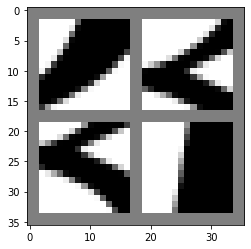


(true_class == predicted_class).item()=True
capB 0.9658253192901611
capB 0.9658253192901611


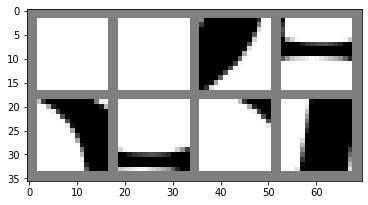


158 AJensonPro-ItDisp capC


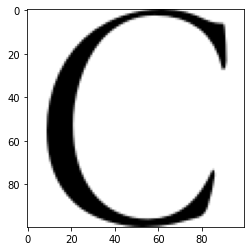


(true_class == predicted_class).item()=True
capC 0.5822481513023376
capC 0.5822481513023376


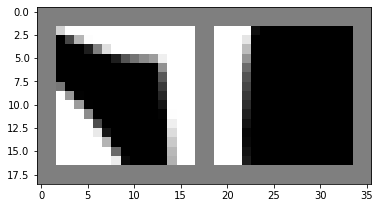


(true_class == predicted_class).item()=True
capC 0.8056923151016235
capC 0.8056923151016235


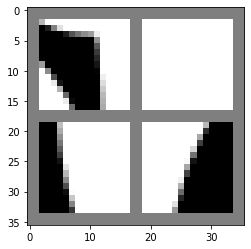


(true_class == predicted_class).item()=True
capC 0.9954082369804382
capC 0.9954082369804382


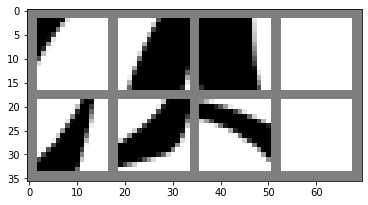


159 AJensonPro-ItDisp capD


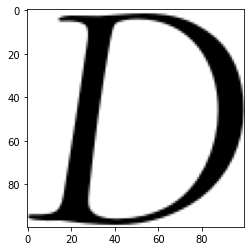


(true_class == predicted_class).item()=False
capD 0.33440151810646057
capO 0.3772261440753937


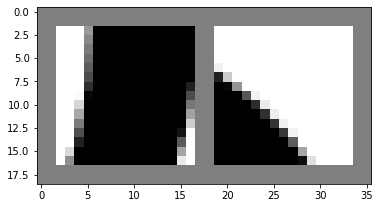


(true_class == predicted_class).item()=True
capD 0.9271696209907532
capD 0.9271696209907532


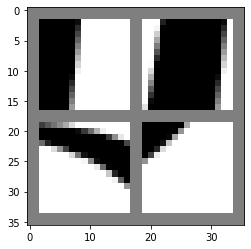


(true_class == predicted_class).item()=True
capD 0.9952594637870789
capD 0.9952594637870789


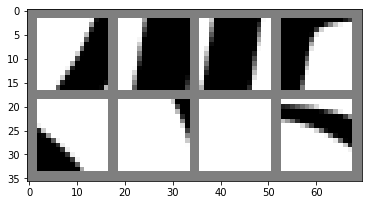


160 AJensonPro-ItDisp capE


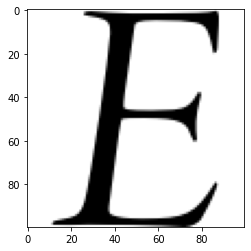


(true_class == predicted_class).item()=True
capE 0.7468492984771729
capE 0.7468492984771729


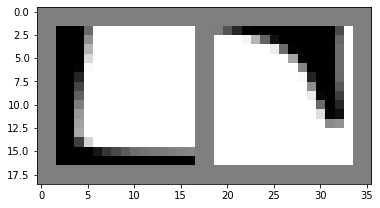


(true_class == predicted_class).item()=True
capE 0.8943736553192139
capE 0.8943736553192139


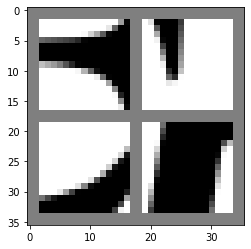


(true_class == predicted_class).item()=True
capE 0.9864941835403442
capE 0.9864941835403442


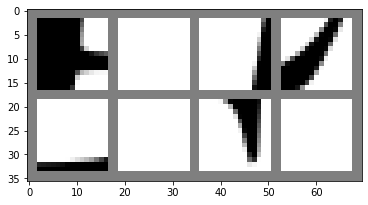


161 AJensonPro-ItDisp capF


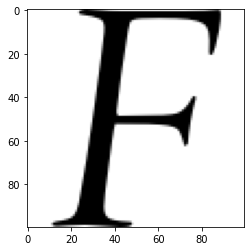


(true_class == predicted_class).item()=False
capF 0.3619420528411865
capE 0.6340249180793762


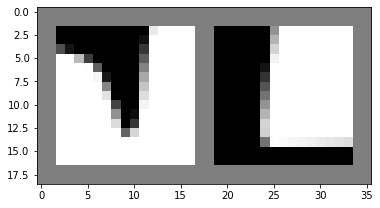


(true_class == predicted_class).item()=False
capF 0.49534738063812256
capE 0.504635751247406


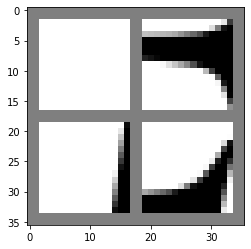


(true_class == predicted_class).item()=False
capF 0.09280087798833847
capE 0.907150149345398


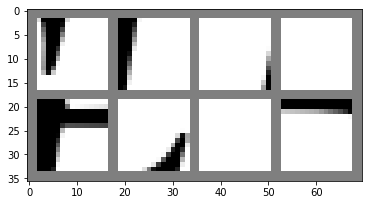


162 AJensonPro-ItDisp capG


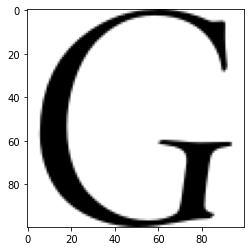


(true_class == predicted_class).item()=True
capG 0.9845102429389954
capG 0.9845102429389954


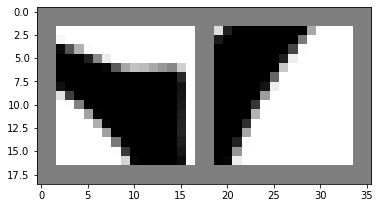


(true_class == predicted_class).item()=True
capG 0.9877045154571533
capG 0.9877045154571533


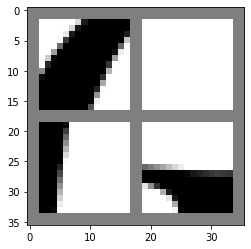


(true_class == predicted_class).item()=True
capG 0.999329686164856
capG 0.999329686164856


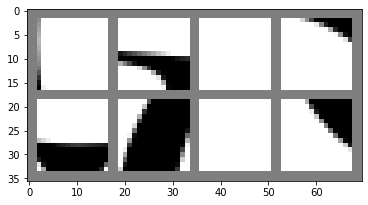


163 AJensonPro-ItDisp capH


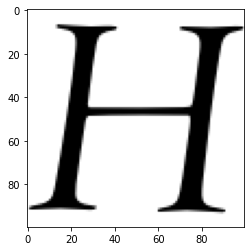


(true_class == predicted_class).item()=True
capH 0.8829996585845947
capH 0.8829996585845947


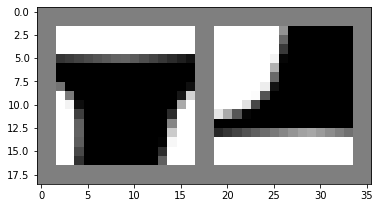


(true_class == predicted_class).item()=True
capH 0.9981004595756531
capH 0.9981004595756531


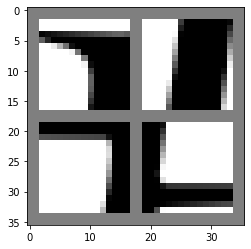


(true_class == predicted_class).item()=True
capH 0.9996341466903687
capH 0.9996341466903687


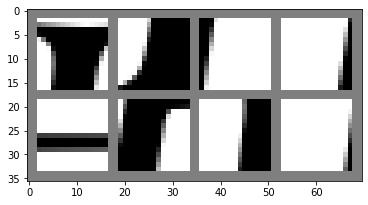


164 AJensonPro-ItDisp capI


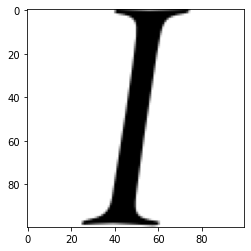


(true_class == predicted_class).item()=False
capI 0.06808061897754669
capU 0.4595569372177124


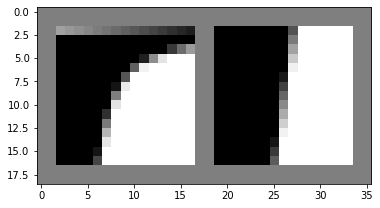


(true_class == predicted_class).item()=True
capI 0.3067464828491211
capI 0.3067464828491211


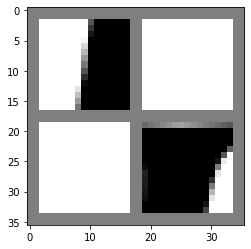


(true_class == predicted_class).item()=False
capI 0.364913672208786
smallL 0.5792323350906372


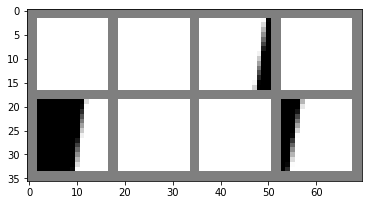


165 AJensonPro-ItDisp capJ


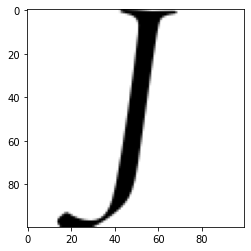


(true_class == predicted_class).item()=False
capJ 0.1672595888376236
smallP 0.32291701436042786


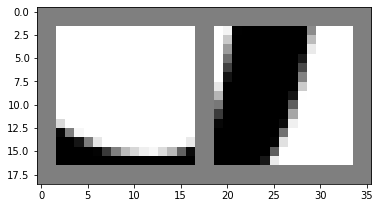


(true_class == predicted_class).item()=True
capJ 0.9742841720581055
capJ 0.9742841720581055


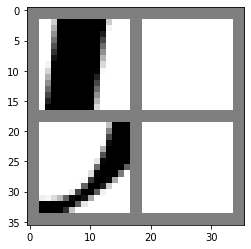


(true_class == predicted_class).item()=True
capJ 0.9715920090675354
capJ 0.9715920090675354


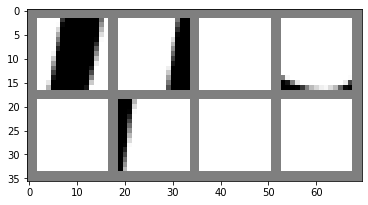


166 AJensonPro-ItDisp capK


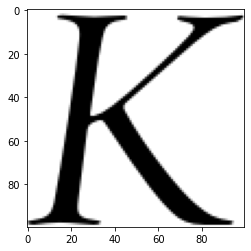


(true_class == predicted_class).item()=True
capK 0.6351168155670166
capK 0.6351168155670166


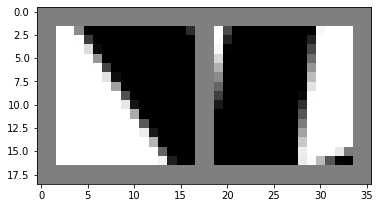


(true_class == predicted_class).item()=True
capK 0.9954614043235779
capK 0.9954614043235779


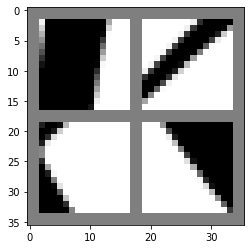


(true_class == predicted_class).item()=True
capK 0.9895144701004028
capK 0.9895144701004028


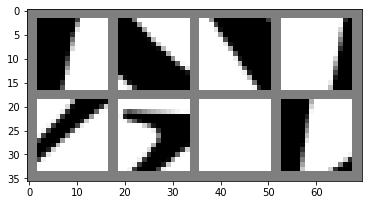


167 AJensonPro-ItDisp capL


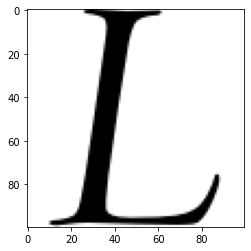


(true_class == predicted_class).item()=False
capL 0.23642541468143463
capE 0.6242538690567017


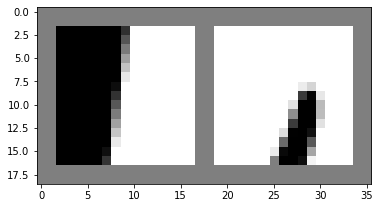


(true_class == predicted_class).item()=True
capL 0.9597106575965881
capL 0.9597106575965881


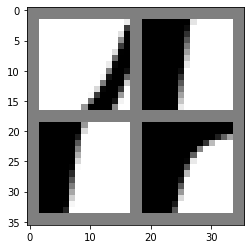


(true_class == predicted_class).item()=True
capL 0.9851747155189514
capL 0.9851747155189514


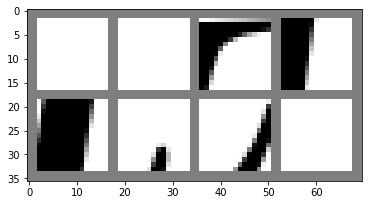


168 AJensonPro-ItDisp capM


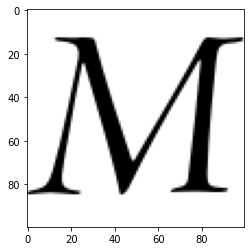


(true_class == predicted_class).item()=True
capM 0.9969397783279419
capM 0.9969397783279419


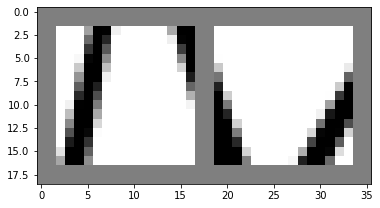


(true_class == predicted_class).item()=True
capM 0.9999284744262695
capM 0.9999284744262695


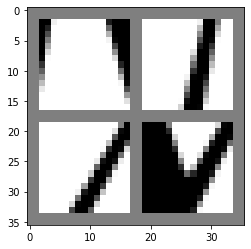


(true_class == predicted_class).item()=True
capM 0.9992626309394836
capM 0.9992626309394836


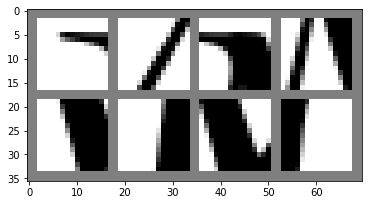


169 AJensonPro-ItDisp capN


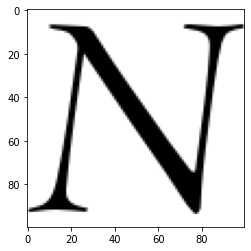


(true_class == predicted_class).item()=True
capN 0.9998183846473694
capN 0.9998183846473694


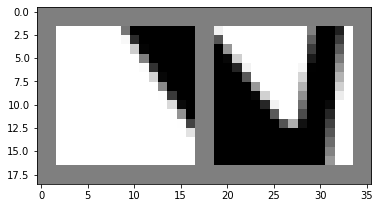


(true_class == predicted_class).item()=True
capN 0.9999861717224121
capN 0.9999861717224121


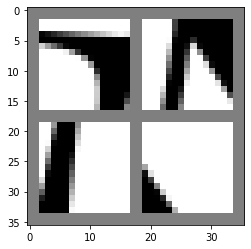


(true_class == predicted_class).item()=True
capN 0.9998286962509155
capN 0.9998286962509155


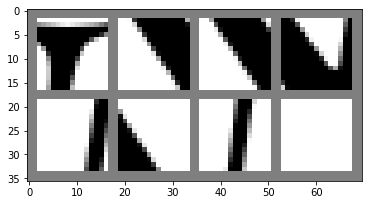


170 AJensonPro-ItDisp capO


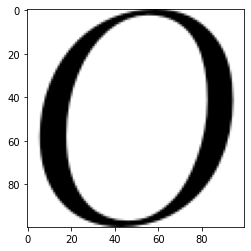


(true_class == predicted_class).item()=True
capO 0.5003733038902283
capO 0.5003733038902283


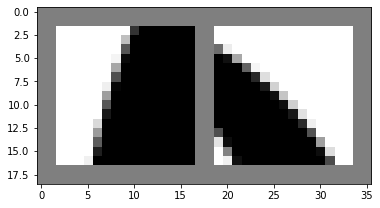


(true_class == predicted_class).item()=True
capO 0.839419424533844
capO 0.839419424533844


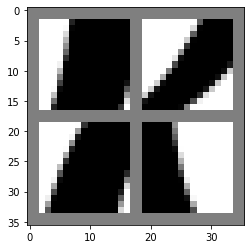


(true_class == predicted_class).item()=True
capO 0.8925608992576599
capO 0.8925608992576599


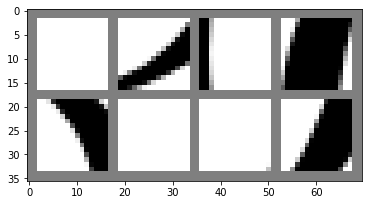


171 AJensonPro-ItDisp capP


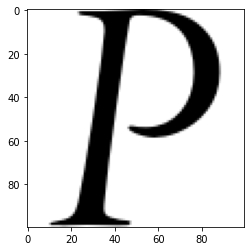


(true_class == predicted_class).item()=True
capP 0.6125501990318298
capP 0.6125501990318298


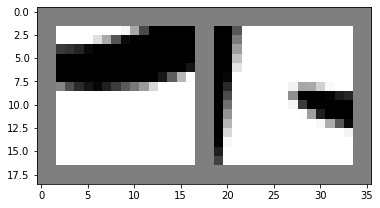


(true_class == predicted_class).item()=False
capP 0.38317227363586426
smallP 0.6165816187858582


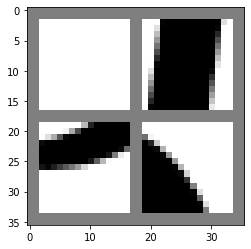


(true_class == predicted_class).item()=True
capP 0.6406766176223755
capP 0.6406766176223755


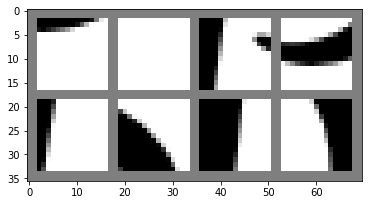


172 AJensonPro-ItDisp capQ


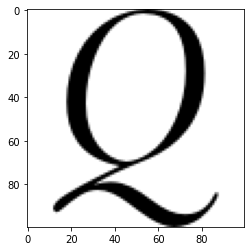


(true_class == predicted_class).item()=True
capQ 0.9792321920394897
capQ 0.9792321920394897


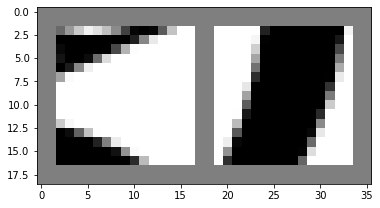


(true_class == predicted_class).item()=True
capQ 0.9996612071990967
capQ 0.9996612071990967


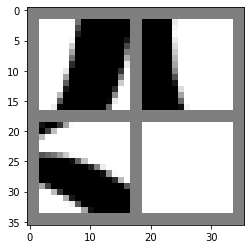


(true_class == predicted_class).item()=True
capQ 0.9999560117721558
capQ 0.9999560117721558


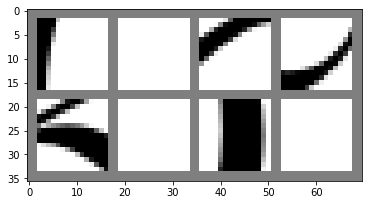


173 AJensonPro-ItDisp capR


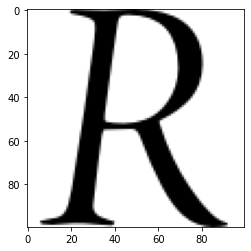


(true_class == predicted_class).item()=True
capR 0.9402279257774353
capR 0.9402279257774353


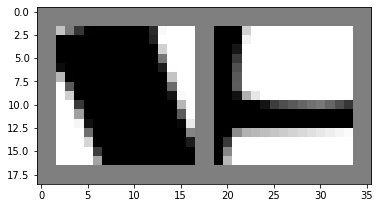


(true_class == predicted_class).item()=True
capR 0.9997720122337341
capR 0.9997720122337341


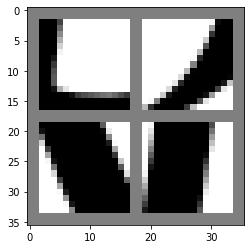


(true_class == predicted_class).item()=True
capR 0.9994656443595886
capR 0.9994656443595886


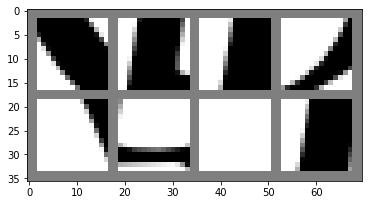


174 AJensonPro-ItDisp capS


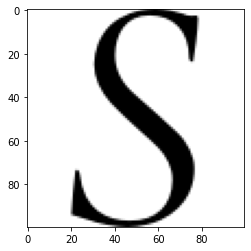


(true_class == predicted_class).item()=True
capS 0.9257575869560242
capS 0.9257575869560242


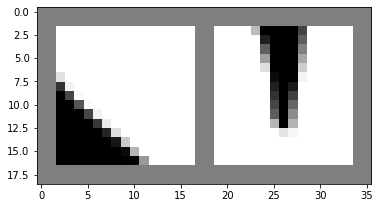


(true_class == predicted_class).item()=True
capS 0.8156919479370117
capS 0.8156919479370117


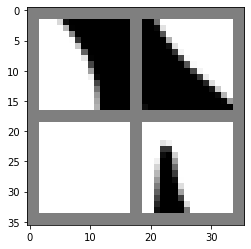


(true_class == predicted_class).item()=True
capS 0.9160897135734558
capS 0.9160897135734558


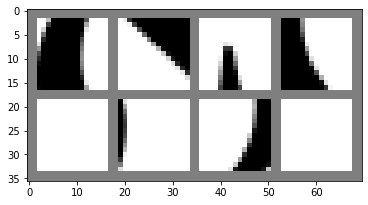


175 AJensonPro-ItDisp capT


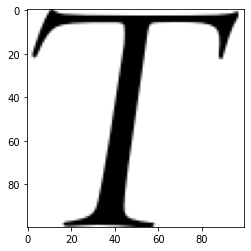


(true_class == predicted_class).item()=True
capT 0.7174236178398132
capT 0.7174236178398132


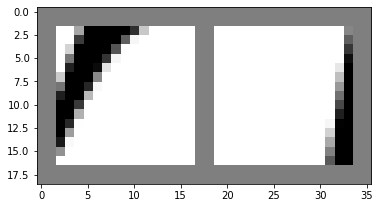


(true_class == predicted_class).item()=True
capT 0.9444488883018494
capT 0.9444488883018494


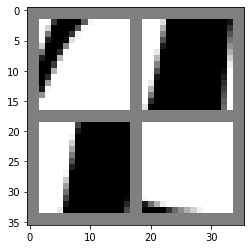


(true_class == predicted_class).item()=True
capT 0.9355327486991882
capT 0.9355327486991882


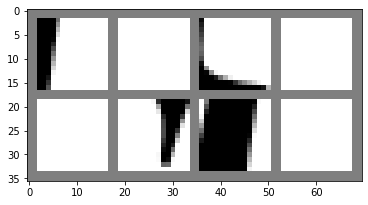


176 AJensonPro-ItDisp capU


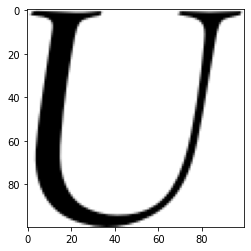


(true_class == predicted_class).item()=True
capU 0.996439516544342
capU 0.996439516544342


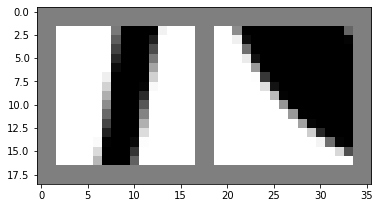


(true_class == predicted_class).item()=True
capU 0.9890713691711426
capU 0.9890713691711426


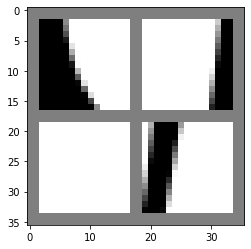


(true_class == predicted_class).item()=True
capU 0.9999583959579468
capU 0.9999583959579468


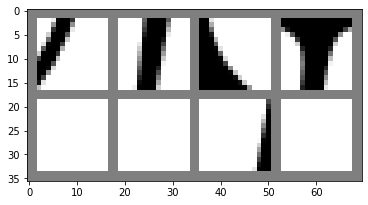


177 AJensonPro-ItDisp capV


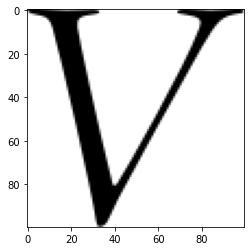


(true_class == predicted_class).item()=True
capV 0.5762366056442261
capV 0.5762366056442261


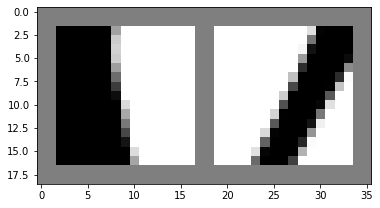


(true_class == predicted_class).item()=True
capV 0.9118430614471436
capV 0.9118430614471436


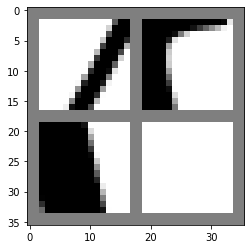


(true_class == predicted_class).item()=True
capV 0.9895337224006653
capV 0.9895337224006653


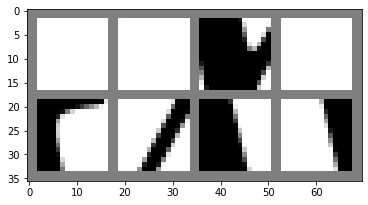


178 AJensonPro-ItDisp capW


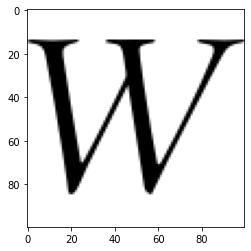


(true_class == predicted_class).item()=True
capW 0.9752545356750488
capW 0.9752545356750488


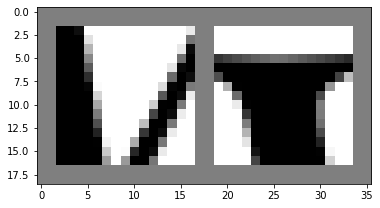


(true_class == predicted_class).item()=True
capW 0.9708685278892517
capW 0.9708685278892517


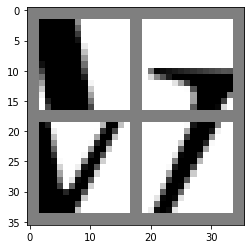


(true_class == predicted_class).item()=True
capW 0.9772635102272034
capW 0.9772635102272034


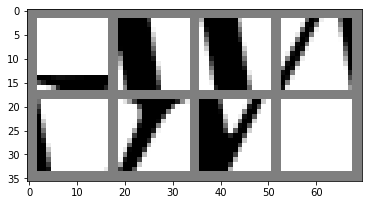


179 AJensonPro-ItDisp capX


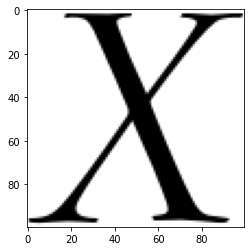


(true_class == predicted_class).item()=True
capX 0.9759610891342163
capX 0.9759610891342163


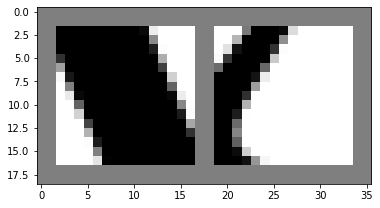


(true_class == predicted_class).item()=True
capX 0.994885265827179
capX 0.994885265827179


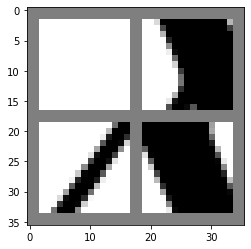


(true_class == predicted_class).item()=True
capX 0.9895195960998535
capX 0.9895195960998535


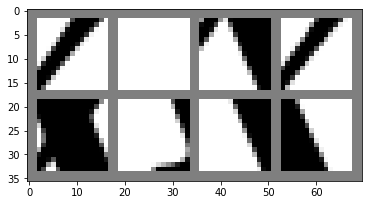


180 AJensonPro-ItDisp capY


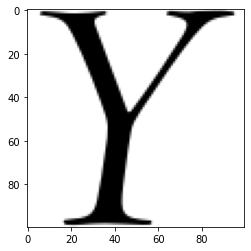


(true_class == predicted_class).item()=True
capY 0.6275256872177124
capY 0.6275256872177124


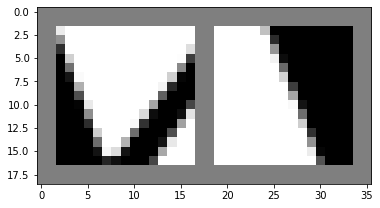


(true_class == predicted_class).item()=True
capY 0.9993932247161865
capY 0.9993932247161865


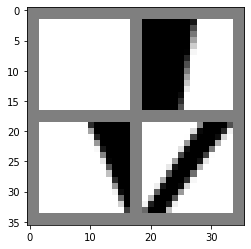


(true_class == predicted_class).item()=True
capY 0.9999380111694336
capY 0.9999380111694336


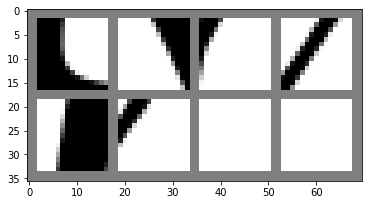


181 AJensonPro-ItDisp capZ


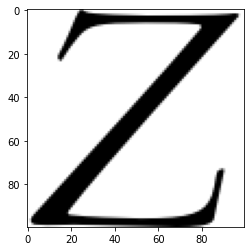


(true_class == predicted_class).item()=True
capZ 0.915095865726471
capZ 0.915095865726471


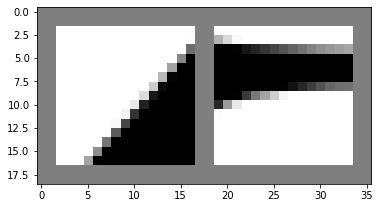


(true_class == predicted_class).item()=True
capZ 0.7077162861824036
capZ 0.7077162861824036


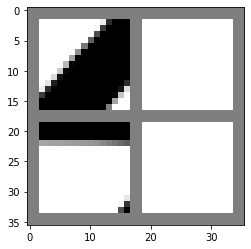


(true_class == predicted_class).item()=True
capZ 0.7153138518333435
capZ 0.7153138518333435


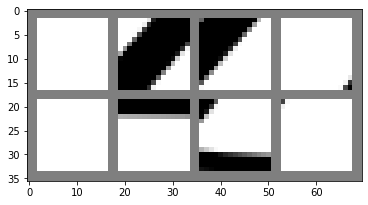


182 AJensonPro-ItDisp smallA


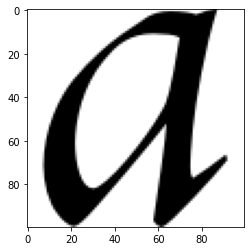


(true_class == predicted_class).item()=True
smallA 0.9933804273605347
smallA 0.9933804273605347


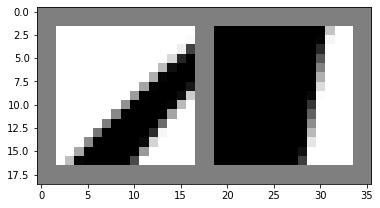


(true_class == predicted_class).item()=True
smallA 0.9951323866844177
smallA 0.9951323866844177


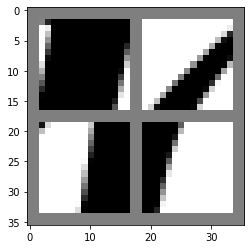


(true_class == predicted_class).item()=True
smallA 0.9986724853515625
smallA 0.9986724853515625


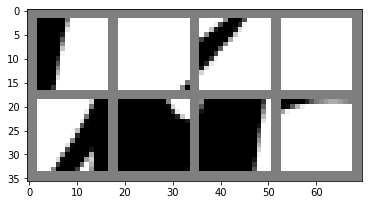


183 AJensonPro-ItDisp smallB


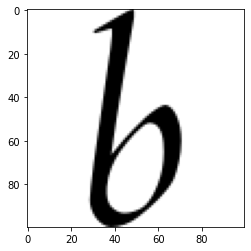


(true_class == predicted_class).item()=True
smallB 0.8960974812507629
smallB 0.8960974812507629


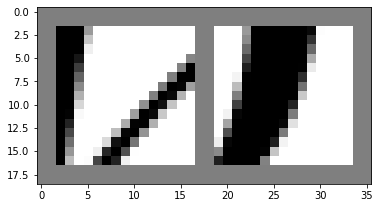


(true_class == predicted_class).item()=True
smallB 0.9388795495033264
smallB 0.9388795495033264


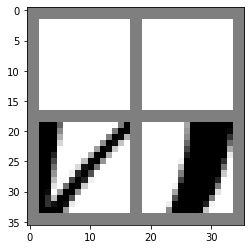


(true_class == predicted_class).item()=True
smallB 0.7903545498847961
smallB 0.7903545498847961


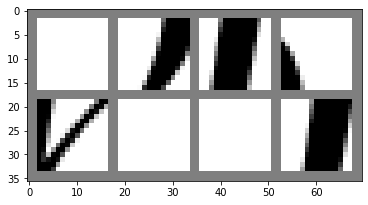


184 AJensonPro-ItDisp smallC


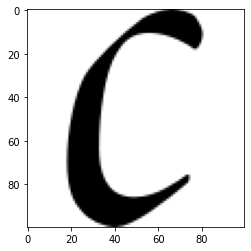


(true_class == predicted_class).item()=True
smallC 0.7334307432174683
smallC 0.7334307432174683


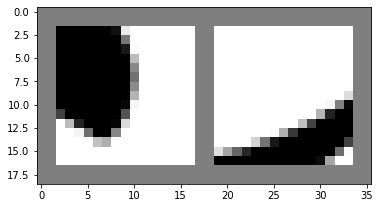


(true_class == predicted_class).item()=False
smallC 0.3189905881881714
capC 0.6748086810112


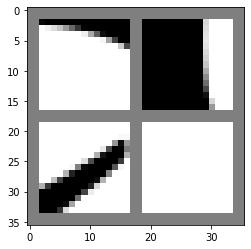


(true_class == predicted_class).item()=True
smallC 0.9454370737075806
smallC 0.9454370737075806


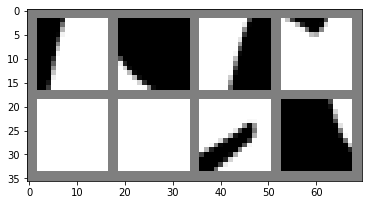


185 AJensonPro-ItDisp smallD


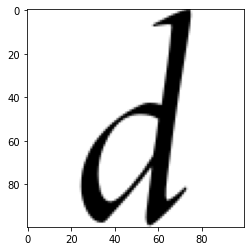


(true_class == predicted_class).item()=True
smallD 0.9765199422836304
smallD 0.9765199422836304


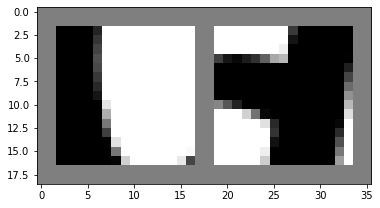


(true_class == predicted_class).item()=True
smallD 0.9985467791557312
smallD 0.9985467791557312


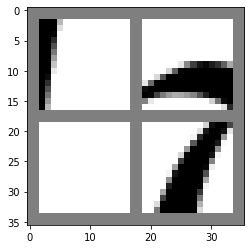


(true_class == predicted_class).item()=True
smallD 0.9995834231376648
smallD 0.9995834231376648


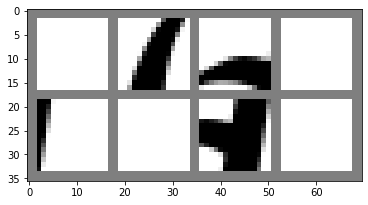


186 AJensonPro-ItDisp smallE


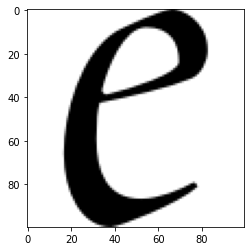


(true_class == predicted_class).item()=True
smallE 0.997014045715332
smallE 0.997014045715332


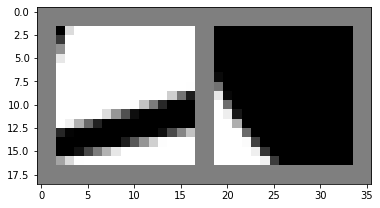


(true_class == predicted_class).item()=True
smallE 0.9999371767044067
smallE 0.9999371767044067


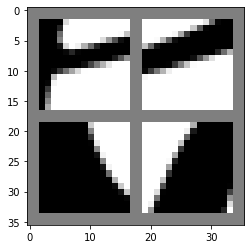


(true_class == predicted_class).item()=True
smallE 0.9999574422836304
smallE 0.9999574422836304


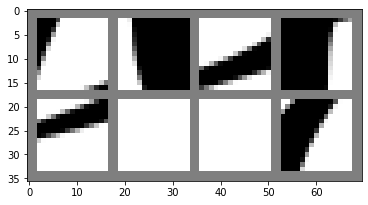


187 AJensonPro-ItDisp smallF


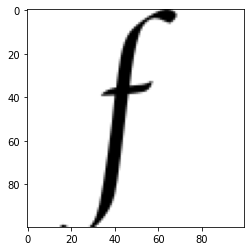


(true_class == predicted_class).item()=False
smallF 0.2657887935638428
smallD 0.38944247364997864


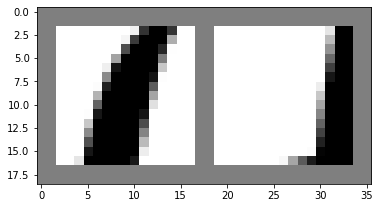


(true_class == predicted_class).item()=True
smallF 0.9991514682769775
smallF 0.9991514682769775


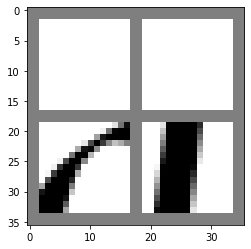


(true_class == predicted_class).item()=True
smallF 0.9999808073043823
smallF 0.9999808073043823


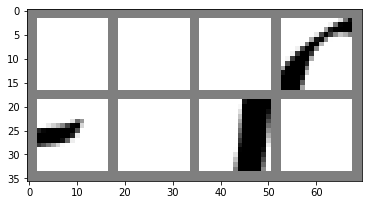


188 AJensonPro-ItDisp smallG


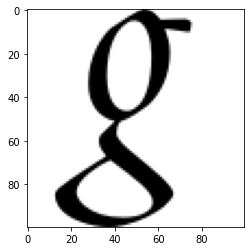


(true_class == predicted_class).item()=True
smallG 0.9917425513267517
smallG 0.9917425513267517


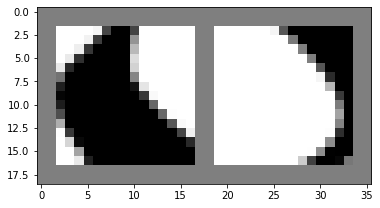


(true_class == predicted_class).item()=True
smallG 0.995245635509491
smallG 0.995245635509491


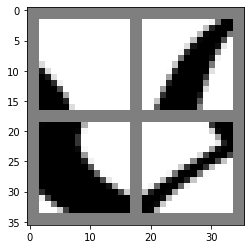


(true_class == predicted_class).item()=True
smallG 0.9999047517776489
smallG 0.9999047517776489


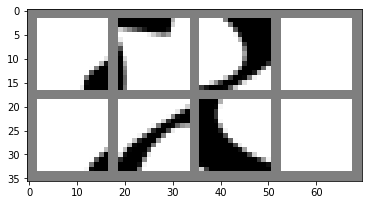


189 AJensonPro-ItDisp smallH


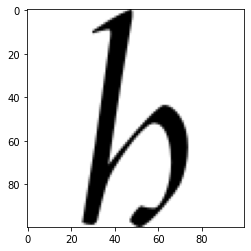


(true_class == predicted_class).item()=False
smallH 0.25556957721710205
smallB 0.7141916155815125


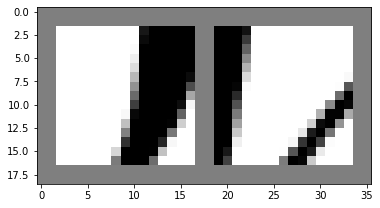


(true_class == predicted_class).item()=True
smallH 0.5463311672210693
smallH 0.5463311672210693


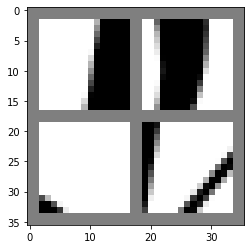


(true_class == predicted_class).item()=True
smallH 0.9297813177108765
smallH 0.9297813177108765


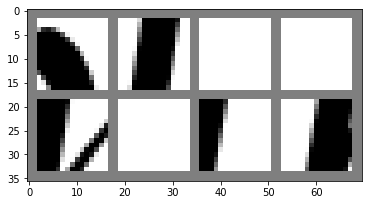


190 AJensonPro-ItDisp smallI


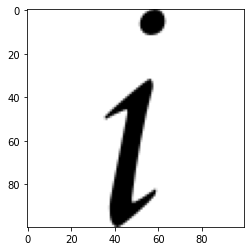


(true_class == predicted_class).item()=True
smallI 0.6323656439781189
smallI 0.6323656439781189


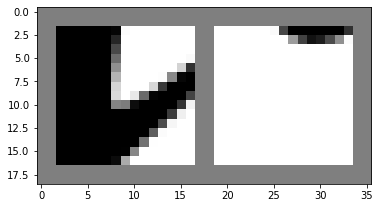


(true_class == predicted_class).item()=True
smallI 0.9853213429450989
smallI 0.9853213429450989


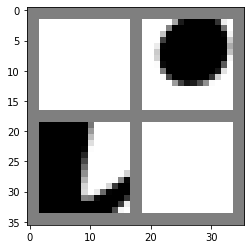


(true_class == predicted_class).item()=True
smallI 0.7299111485481262
smallI 0.7299111485481262


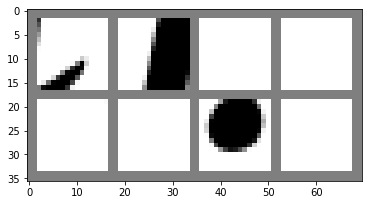


191 AJensonPro-ItDisp smallJ


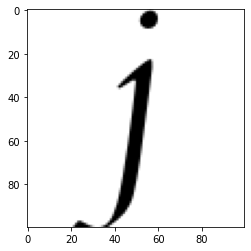


(true_class == predicted_class).item()=True
smallJ 0.7280149459838867
smallJ 0.7280149459838867


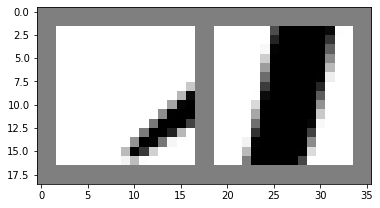


(true_class == predicted_class).item()=True
smallJ 0.9316230416297913
smallJ 0.9316230416297913


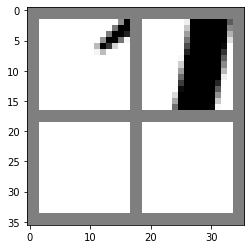


(true_class == predicted_class).item()=True
smallJ 0.7739295363426208
smallJ 0.7739295363426208


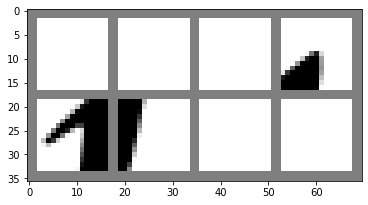


192 AJensonPro-ItDisp smallK


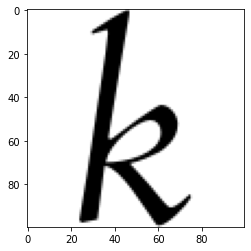


(true_class == predicted_class).item()=False
smallK 0.2881418466567993
capK 0.7113660573959351


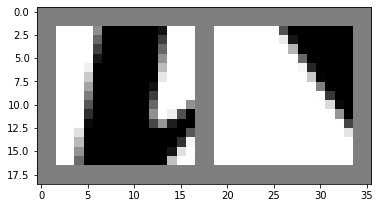


(true_class == predicted_class).item()=True
smallK 0.9976352453231812
smallK 0.9976352453231812


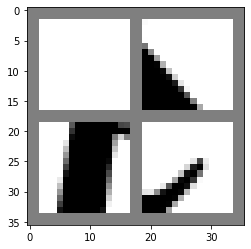


(true_class == predicted_class).item()=True
smallK 0.9781178832054138
smallK 0.9781178832054138


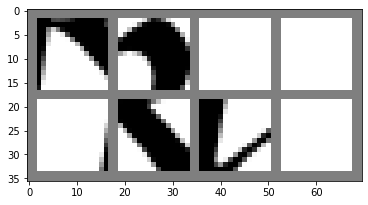


193 AJensonPro-ItDisp smallL


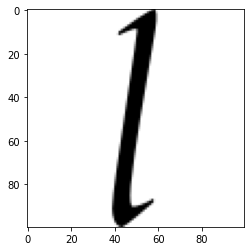


(true_class == predicted_class).item()=True
smallL 0.4129936993122101
smallL 0.4129936993122101


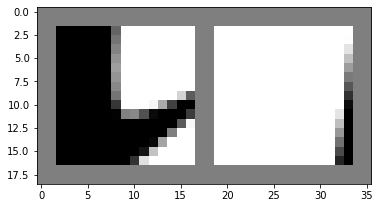


(true_class == predicted_class).item()=True
smallL 0.7067373991012573
smallL 0.7067373991012573


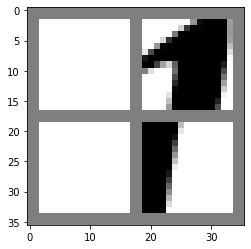


(true_class == predicted_class).item()=True
smallL 0.9452162384986877
smallL 0.9452162384986877


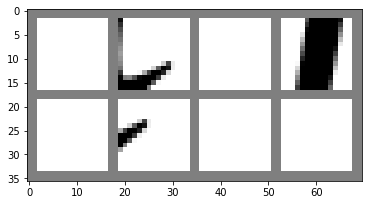


194 AJensonPro-ItDisp smallM


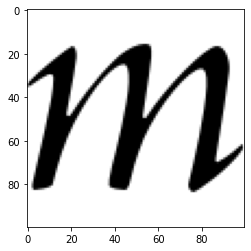


(true_class == predicted_class).item()=True
smallM 0.9565192461013794
smallM 0.9565192461013794


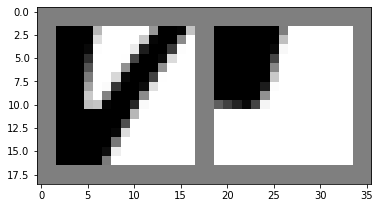


(true_class == predicted_class).item()=True
smallM 0.997452437877655
smallM 0.997452437877655


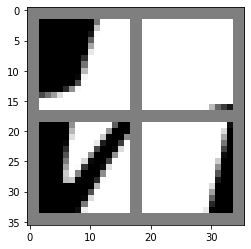


(true_class == predicted_class).item()=True
smallM 0.9998886585235596
smallM 0.9998886585235596


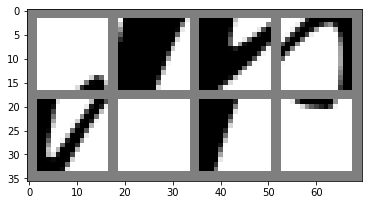


195 AJensonPro-ItDisp smallN


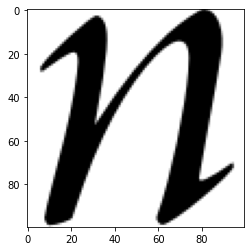


(true_class == predicted_class).item()=True
smallN 0.6683809161186218
smallN 0.6683809161186218


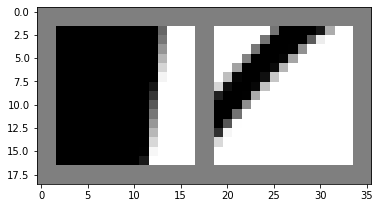


(true_class == predicted_class).item()=True
smallN 0.8553711771965027
smallN 0.8553711771965027


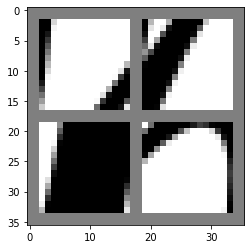


(true_class == predicted_class).item()=True
smallN 0.9929823875427246
smallN 0.9929823875427246


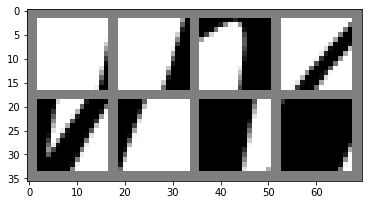


196 AJensonPro-ItDisp smallO


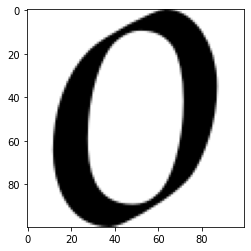


(true_class == predicted_class).item()=False
smallO 0.2600610852241516
capO 0.4722961485385895


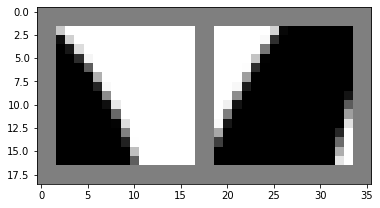


(true_class == predicted_class).item()=False
smallO 0.29956021904945374
capQ 0.5221887826919556


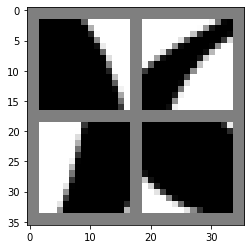


(true_class == predicted_class).item()=True
smallO 0.556168794631958
smallO 0.556168794631958


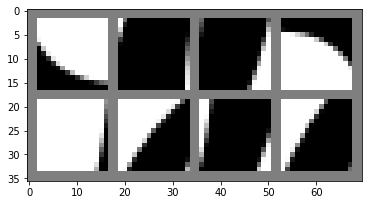


197 AJensonPro-ItDisp smallP


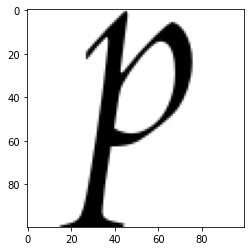


(true_class == predicted_class).item()=True
smallP 0.6768597364425659
smallP 0.6768597364425659


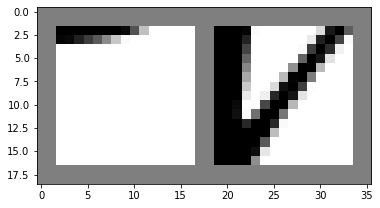


(true_class == predicted_class).item()=True
smallP 0.9977384805679321
smallP 0.9977384805679321


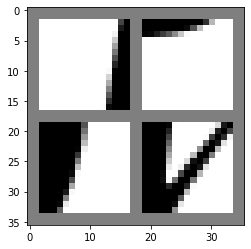


(true_class == predicted_class).item()=True
smallP 0.9750806093215942
smallP 0.9750806093215942


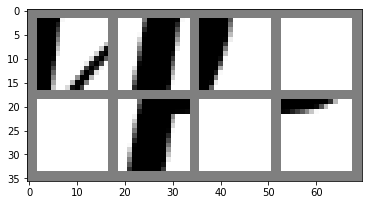


198 AJensonPro-ItDisp smallQ


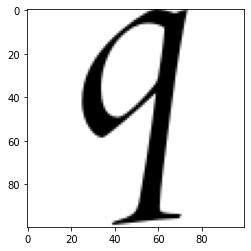


(true_class == predicted_class).item()=True
smallQ 0.7835225462913513
smallQ 0.7835225462913513


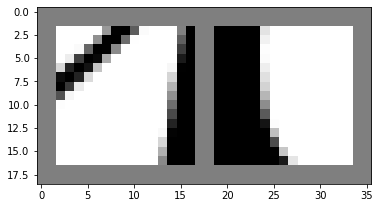


(true_class == predicted_class).item()=True
smallQ 0.8973178267478943
smallQ 0.8973178267478943


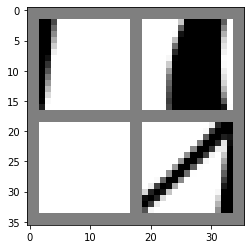


(true_class == predicted_class).item()=True
smallQ 0.9197893738746643
smallQ 0.9197893738746643


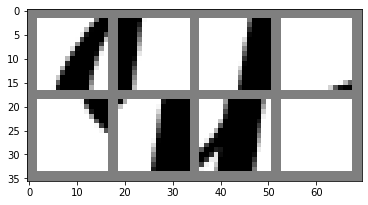


199 AJensonPro-ItDisp smallR


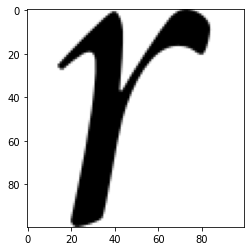


(true_class == predicted_class).item()=True
smallR 0.7049989700317383
smallR 0.7049989700317383


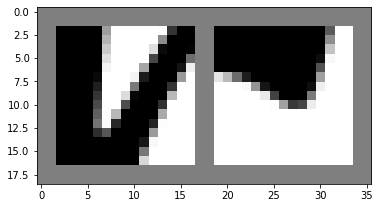


(true_class == predicted_class).item()=True
smallR 0.9865537285804749
smallR 0.9865537285804749


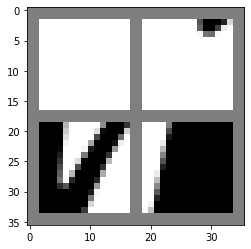


(true_class == predicted_class).item()=True
smallR 0.9989097118377686
smallR 0.9989097118377686


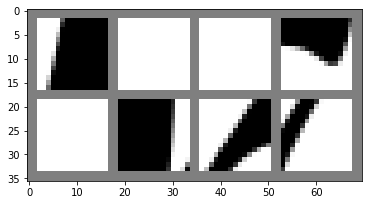


200 AJensonPro-ItDisp smallS


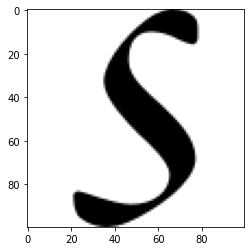


(true_class == predicted_class).item()=True
smallS 0.561682403087616
smallS 0.561682403087616


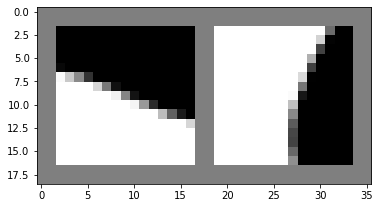


(true_class == predicted_class).item()=True
smallS 0.6225631833076477
smallS 0.6225631833076477


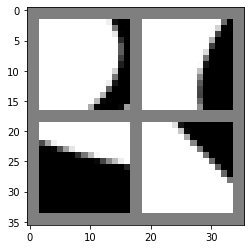


(true_class == predicted_class).item()=True
smallS 0.5386013388633728
smallS 0.5386013388633728


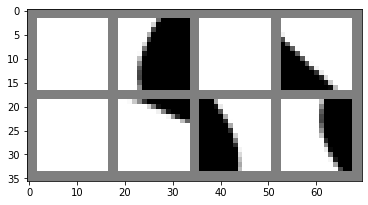


201 AJensonPro-ItDisp smallT


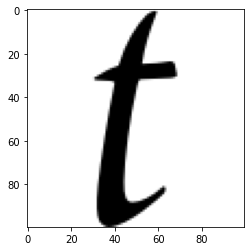


(true_class == predicted_class).item()=True
smallT 0.9954174757003784
smallT 0.9954174757003784


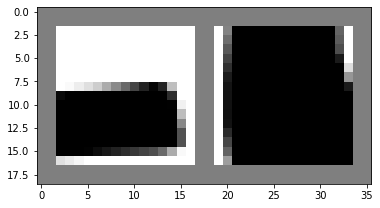


(true_class == predicted_class).item()=True
smallT 0.9849788546562195
smallT 0.9849788546562195


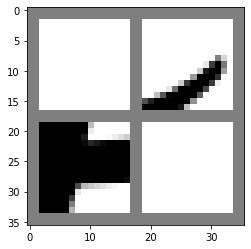


(true_class == predicted_class).item()=True
smallT 0.9999921321868896
smallT 0.9999921321868896


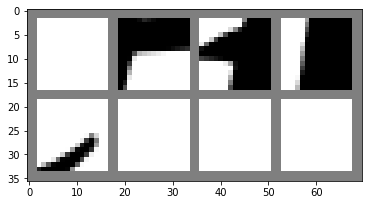


202 AJensonPro-ItDisp smallU


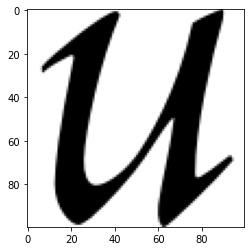


(true_class == predicted_class).item()=True
smallU 0.9429445266723633
smallU 0.9429445266723633


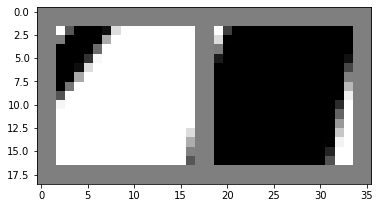


(true_class == predicted_class).item()=True
smallU 0.7899004817008972
smallU 0.7899004817008972


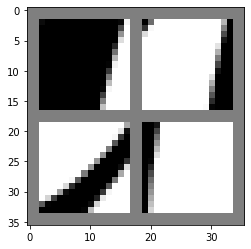


(true_class == predicted_class).item()=True
smallU 0.9940631985664368
smallU 0.9940631985664368


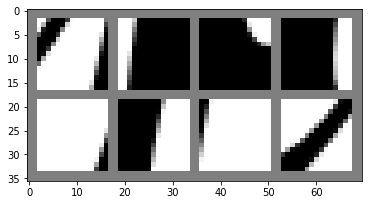


203 AJensonPro-ItDisp smallV


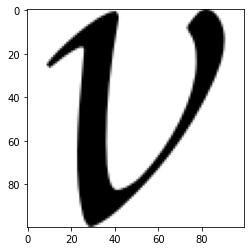


(true_class == predicted_class).item()=False
smallV 0.21024301648139954
smallW 0.34508222341537476


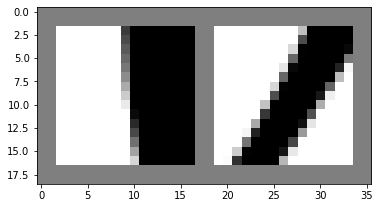


(true_class == predicted_class).item()=True
smallV 0.942399263381958
smallV 0.942399263381958


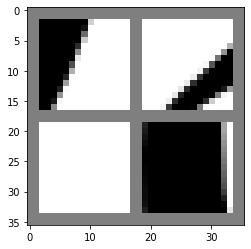


(true_class == predicted_class).item()=True
smallV 0.997831404209137
smallV 0.997831404209137


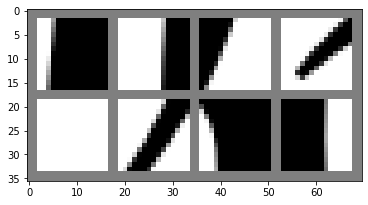


204 AJensonPro-ItDisp smallW


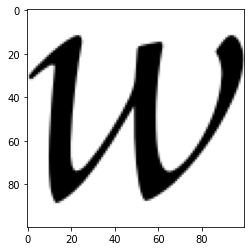


(true_class == predicted_class).item()=False
smallW 0.30561065673828125
capV 0.4249829649925232


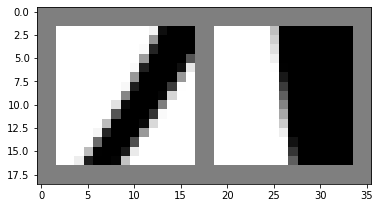


(true_class == predicted_class).item()=True
smallW 0.9192112684249878
smallW 0.9192112684249878


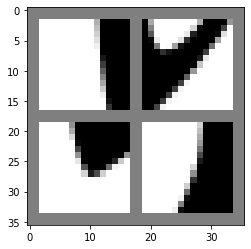


(true_class == predicted_class).item()=True
smallW 0.992889404296875
smallW 0.992889404296875


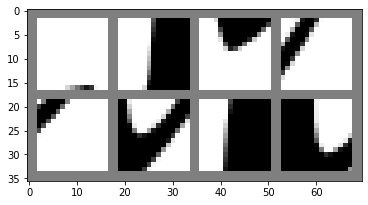


205 AJensonPro-ItDisp smallX


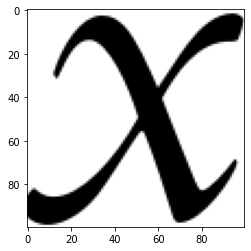


(true_class == predicted_class).item()=False
smallX 0.43297719955444336
capX 0.5647599101066589


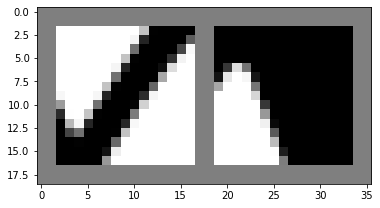


(true_class == predicted_class).item()=True
smallX 0.9642032980918884
smallX 0.9642032980918884


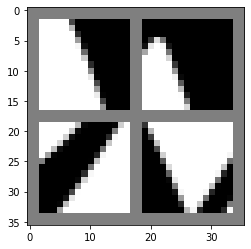


(true_class == predicted_class).item()=True
smallX 0.9983102083206177
smallX 0.9983102083206177


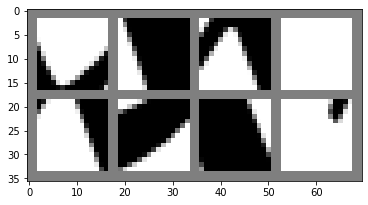


206 AJensonPro-ItDisp smallY


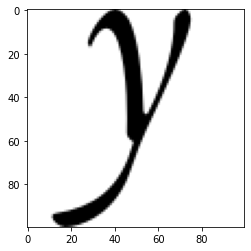


(true_class == predicted_class).item()=True
smallY 0.5548149347305298
smallY 0.5548149347305298


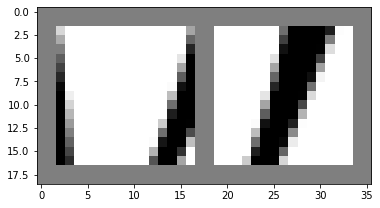


(true_class == predicted_class).item()=True
smallY 0.8502660989761353
smallY 0.8502660989761353


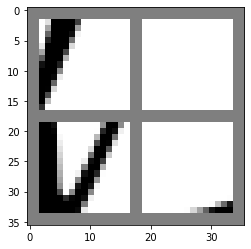


(true_class == predicted_class).item()=True
smallY 0.9999785423278809
smallY 0.9999785423278809


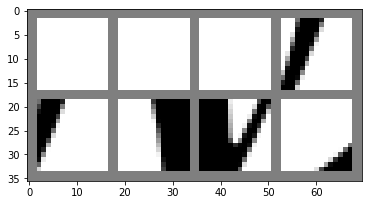


207 AJensonPro-ItDisp smallZ


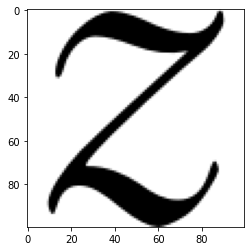


(true_class == predicted_class).item()=True
smallZ 0.976470947265625
smallZ 0.976470947265625


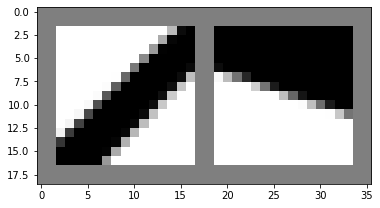


(true_class == predicted_class).item()=True
smallZ 0.9995444416999817
smallZ 0.9995444416999817


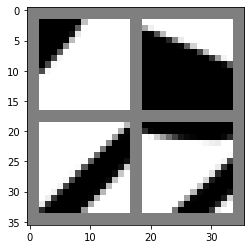


(true_class == predicted_class).item()=True
smallZ 0.999825656414032
smallZ 0.999825656414032


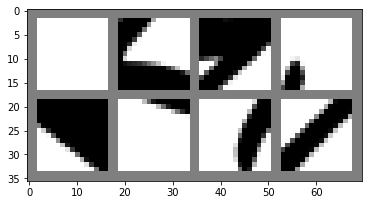

In [19]:
print(len(dataset) / 52)
with torch.no_grad():
    for i, (image, t) in zip(range(52 * 4), dataset):
        font = t['font']
        class_ = t['alphabet']
        print(i, dataset.unique_font[font], dataset.unique_alphabet[class_])
        plt.imshow(to_pil_image(image), 'gray')
        plt.show()
        print()
        x = image[None].expand([2**16, -1, -1, -1])
        for patch_n, nrow in zip(*zip([2, 2], [4, 2], [8, 4])):
            patch = make_patch2d(x, config.hparams.patch_size, patch_n)
            y = model(patch)
            max_index = y[:, class_].argmax()

            true_class = class_
            true_prob = y[max_index].softmax(0)[class_].item()
            predicted_class = y[max_index].argmax(0)
            predicted_prob = y[max_index].softmax(0)[predicted_class].item()
            
            print(f'(true_class == predicted_class).item()={(true_class == predicted_class).item()}')
            print(dataset.unique_alphabet[true_class], true_prob)
            print(dataset.unique_alphabet[predicted_class], predicted_prob)
            plt.imshow(to_pil_image(make_grid(patch[max_index], nrow=nrow, pad_value=0.5)))
            plt.show()
            print()